In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%load_ext google.cloud.bigquery
from google.cloud import bigquery

client=bigquery.Client()
project_id = "som-nero-phi-jonc101"

/Users/sandychen/Desktop/Healthrex_workspace/scripts/Blood_Culture_Stewardship/blood_culture_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/sandychen/Desktop/Healthrex_workspace/scripts/Blood_Culture_Stewardship/blood_culture_env/lib/python3.9/site-packages/google/cloud/bigquery/__init__.py:237: FutureWarning: %load_ext google.cloud.bigquery is deprecated. Install bigquery-magics package and use `%load_ext bigquery_magics`, instead.
  warnings.warn(


In [2]:
query ="""

# select all blood culture orders
with base as (
SELECT DISTINCT 
        # op.*,
        # lr.*,
        op.anon_id, 
        op.pat_enc_csn_id_coded,
        op.order_proc_id_coded, 
        op.order_time_jittered_utc as blood_culture_order_datetime_utc,
        op.order_time_jittered as blood_culture_order_datetime,
        EXTRACT(YEAR FROM op.order_time_jittered_utc) as order_year ,  
        op.ordering_mode,
        op.department_id,
        op.description,
        op.order_status,
        op.lab_status,
        op.abnormal_yn,
        # lr.result_flag,
        # lr.ord_value,   
        # lr.ord_num_value,
        # lr.extended_value_comment,
        # lr.extended_comp_comment
    
    FROM 
        `som-nero-phi-jonc101.shc_core_2024.order_proc` op
     INNER JOIN
        `som-nero-phi-jonc101.shc_core_2024.lab_result` lr
    ON
        op.order_proc_id_coded = lr.order_id_coded
    WHERE
        op.order_type LIKE "Microbiology%"
        AND UPPER(op.description) LIKE '%BLOOD CULT%'
        AND UPPER(op.description) NOT LIKE '%CRYPTO%'
        AND UPPER(op.description) NOT LIKE '%AFB%'
        AND UPPER(op.description) NOT LIKE '%FUNGAL%'
        AND UPPER(op.description) NOT LIKE '%PARASITE%'
        AND UPPER(op.description) NOT LIKE '%ANTIGEN%'
        AND UPPER(op.description) NOT LIKE '%LATERAL FLOW%'
        AND UPPER(op.description) NOT LIKE '%BLOOD CULTURE ID PANEL%'
        AND UPPER(op.description) NOT LIKE '%LAB ONLY AUTOPSY BLOOD CULTURE%'

        AND not op.order_status like any ('Discontinued','Canceled')
)
select * from base order by anon_id, order_proc_id_coded
"""

all_valid_Bcx_with_results = client.query(query).to_dataframe()




In [3]:
all_valid_Bcx_with_results

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,blood_culture_order_datetime,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn
0,JC1000129,131349118693,856213220,2023-01-24 16:41:00+00:00,2023-01-24 08:41:00,2023,Outpatient,1301000158,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,None
1,JC1000129,131349118693,856213221,2023-01-24 16:41:00+00:00,2023-01-24 08:41:00,2023,Outpatient,1301000158,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,None
2,JC1000129,131354606122,876959985,2023-04-23 22:44:00+00:00,2023-04-23 15:44:00,2023,Inpatient,110100019,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,Y
3,JC1000129,131354606122,876959986,2023-04-23 22:44:00+00:00,2023-04-23 15:44:00,2023,Inpatient,110100019,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,Y
4,JC1000158,131015459393,389591449,2011-10-14 01:42:00+00:00,2011-10-13 18:42:00,2011,Inpatient,<NA>,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None
...,...,...,...,...,...,...,...,...,...,...,...,...
660047,JC999856,23290259,338721407,2008-12-23 04:15:00+00:00,2008-12-22 20:15:00,2008,Inpatient,<NA>,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None
660048,JC999856,23290259,338721408,2008-12-23 04:15:00+00:00,2008-12-22 20:15:00,2008,Inpatient,<NA>,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,None
660049,JC999859,131038386282,443087974,2014-08-04 20:48:00+00:00,2014-08-04 13:48:00,2014,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None
660050,JC999992,131190117262,497665844,2016-06-12 00:16:00+00:00,2016-06-11 17:16:00,2016,Outpatient,1108401001,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,None


In [3]:
print(f"total valid bcx orders = len(all_valid_Bcx_with_results) = {len(all_valid_Bcx_with_results)} orders")
print(f"Those bcx orders from valid encounters {len(all_valid_Bcx_with_results.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded']))} encounters")
print(f"Those encounters from valid patients {len(all_valid_Bcx_with_results.drop_duplicates(subset=['anon_id']))} patients")

total valid bcx orders = len(all_valid_Bcx_with_results) = 660052 orders
Those bcx orders from valid encounters 256500 encounters
Those encounters from valid patients 140881 patients


In [4]:
query ="""

# select all blood culture orders
with base as (
SELECT DISTINCT 
        # op.*,
        # lr.*,
        op.anon_id, 
        op.pat_enc_csn_id_coded,
        op.order_proc_id_coded, 
        op.order_time_jittered_utc as blood_culture_order_datetime_utc,
        op.order_time_jittered as blood_culture_order_datetime,
        EXTRACT(YEAR FROM op.order_time_jittered_utc) as order_year ,  
        op.ordering_mode,
        op.department_id,
        op.description,
        op.order_status,
        op.lab_status,
        op.abnormal_yn
        # lr.result_flag,
        # lr.ord_value,   
        # lr.ord_num_value,
        # lr.extended_value_comment,
        # lr.extended_comp_comment
    
    FROM 
        `som-nero-phi-jonc101.shc_core_2024.order_proc` op
     INNER JOIN
        `som-nero-phi-jonc101.shc_core_2024.lab_result` lr
    ON
        op.order_proc_id_coded = lr.order_id_coded
    WHERE
        op.order_type LIKE "Microbiology%"
        AND UPPER(op.description) LIKE '%BLOOD CULT%'
        AND UPPER(op.description) NOT LIKE '%CRYPTO%'
        AND UPPER(op.description) NOT LIKE '%AFB%'
        AND UPPER(op.description) NOT LIKE '%FUNGAL%'
        AND UPPER(op.description) NOT LIKE '%PARASITE%'
        AND UPPER(op.description) NOT LIKE '%ANTIGEN%'
        AND UPPER(op.description) NOT LIKE '%LATERAL FLOW%'
        AND UPPER(op.description) NOT LIKE '%BLOOD CULTURE ID PANEL%'
        AND UPPER(op.description) NOT LIKE '%LAB ONLY AUTOPSY BLOOD CULTURE%'
        AND not op.order_status like any ('Discontinued','Canceled')
),

# filter for ED orders

ED_orders as(
select 
distinct
b.*,
department_name
from base b inner join `som-nero-phi-jonc101.shc_core_2024.dep_map` m using(department_id)
where lower(department_name) like '%emergency%'
)

# make sure all the orders are from this ED encounter
SELECT 
  b.*,
  ad.effective_time_jittered_utc as ed_arrival_datetime_utc,
FROM 
  ED_orders b
INNER JOIN 
  `som-nero-phi-jonc101.shc_core_2024.adt` ad
USING 
  (anon_id,pat_enc_csn_id_coded,department_id)
Where event_type='Admission'
and b.blood_culture_order_datetime_utc>=ad.effective_time_jittered_utc --- confirmed that each admission encounter has only one admission time 
order by b.anon_id,b.pat_enc_csn_id_coded,b.order_proc_id_coded,b.blood_culture_order_datetime_utc,b.order_year,ad.effective_time_jittered_utc

"""
ED_orders_cohort_strict = client.query(query).to_dataframe()

In [6]:
print(f"total valid ED bcx orders = len(all_valid_Bcx_with_results) = {len(ED_orders_cohort_strict)} orders")
print(f"the ED percentage is {100 * round(len(ED_orders_cohort_strict)/len(all_valid_Bcx_with_results),4)}")
print("--------------------------------")
print(f"Those bcx orders from valid encounters n = {len(ED_orders_cohort_strict.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded']))} encounters")
print(f"the ED encounter percentage is {100* round(len(ED_orders_cohort_strict.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded']))/len(all_valid_Bcx_with_results.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded'])),4)}")
print("--------------------------------")
print(f"Those encounters from valid patients n = {len(ED_orders_cohort_strict.drop_duplicates(subset=['anon_id']))} patients")
print(f"the ED patient percentage is {100* round(len(ED_orders_cohort_strict.drop_duplicates(subset=['anon_id']))/len(all_valid_Bcx_with_results.drop_duplicates(subset=['anon_id'])),4)}")
print("--------------------------------")

total valid ED bcx orders = len(all_valid_Bcx_with_results) = 215471 orders
the ED percentage is 32.64
--------------------------------
Those bcx orders from valid encounters n = 117617 encounters
the ED encounter percentage is 45.85
--------------------------------
Those encounters from valid patients n = 73183 patients
the ED patient percentage is 51.949999999999996
--------------------------------


In [10]:
ED_orders_cohort_strict["description"].unique()

array(['BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE)',
       'BLOOD CULTURE (2 AEROBIC BOTTLES)',
       'BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES)',
       'BLOOD CULT - FIRST SET, VIA PHLEBOTOMY',
       'BLOOD CULT - 2ND SET VIA CATHETER',
       'BLOOD CULT CENTRAL LINE CATHETER BY NURSE'], dtype=object)

In [7]:
# Upload refactor_base_cohort to BigQuery as a temporary table
table_id_cohort_with_ED_cohort_new = f"{project_id}.blood_culture_stewardship_sandy_2024.ED_orders_cohort_strict"

# Upload the DataFrame to BigQuery
ED_orders_cohort_strict.to_gbq(
    destination_table=table_id_cohort_with_ED_cohort_new,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded ED_orders_cohort_strict to {table_id_cohort_with_ED_cohort_new}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_4204/1558599018.py:5: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  ED_orders_cohort_strict.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]

Uploaded ED_orders_cohort_strict to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.ED_orders_cohort_strict


In [12]:
# Very raw Organism Check

query = f"""
WITH culture_result AS (
  SELECT DISTINCT
    c.*,
    lr.result_flag,
    lr.ord_value,   
    lr.ord_num_value,
    lr.extended_value_comment,
    lr.extended_comp_comment,
    coalesce(lr.extended_value_comment,lr.extended_comp_comment) as comment,
  FROM blood_culture_stewardship_sandy_2024.ED_orders_cohort_strict c
  JOIN `som-nero-phi-jonc101.shc_core_2024.lab_result` lr
    ON c.anon_id = lr.anon_id
   AND c.order_proc_id_coded = lr.order_id_coded
   AND c.pat_enc_csn_id_coded = lr.pat_enc_csn_id_coded
), 

sensitivity_orders AS (
  SELECT DISTINCT
    anon_id,
    order_proc_id_coded,
    organism
  FROM `som-nero-phi-jonc101.shc_core_2024.culture_sensitivity`
  where UPPER(organism) not like '%CANDIDA%'
)


select distinct organism, count(organism) cnt
FROM culture_result cr
    INNER JOIN sensitivity_orders so
      USING (anon_id, order_proc_id_coded) 
      group by organism order by cnt desc  
"""
organism_distribution_df = client.query(query).to_dataframe()                          



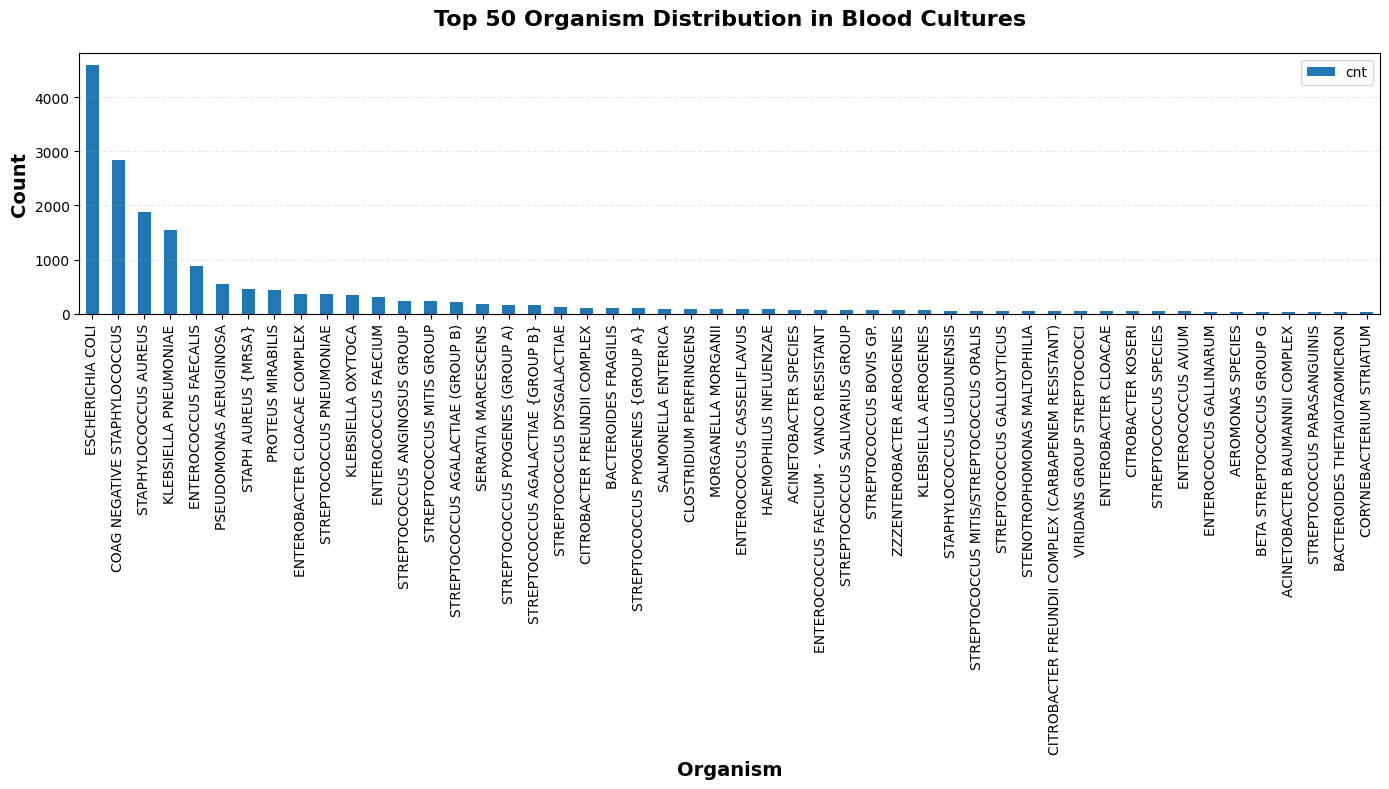

In [13]:
import matplotlib.pyplot as plt

# Create the plot
ax = organism_distribution_df.head(50).plot(kind="bar", x="organism", y="cnt", figsize=(14, 8))

# Add title and labels with better font sizes
ax.set_title('Top 50 Organism Distribution in Blood Cultures', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Organism', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# label check


# V3 Labeling

In [14]:
contaminant_lst = [
    "COAG NEGATIVE STAPHYLOCOCCUS",
    "CORYNEBACTERIUM STRIATUM",
    "BACILLUS SPECIES",
    "CORYNEBACTERIUM SPECIES",
    "LACTOBACILLUS SPECIES",
    "ANAEROBIC GRAM POSITIVE RODS",
    "CORYNEBACTERIUM JEIKEIUM",
    "CORYNEBACTERIUM UREALYTICUM",
    "LACTICASEIBACILLUS RHAMNOSUS (FORMALLY KNOWN AS LACTOBACILLUS RHAMNOSUS)",
    "GRAM POSITIVE RODS",
    "NON SPORE-FORMING ANAEROBIC GRAM POSITIVE RODS",
    "CORYNEBACTERIUM AMYCOLATUM",
    "CORYNEBACTERIUM KROPPENSTEDTII",
    "PAENIBACILLUS SPECIES"
]


In [8]:
# V3(most updated version) labeling
query = f"""
#standardSQL
WITH base_cohort AS (
  SELECT *
  FROM {table_id_cohort_with_ED_cohort_new}
),

-- distinct sets (one row per blood culture set)
base_sets AS (
  SELECT DISTINCT
    anon_id,
    pat_enc_csn_id_coded,
    order_proc_id_coded
  FROM base_cohort
),

-- number of sets per encounter
encounter_set_counts AS (
  SELECT
    anon_id,
    pat_enc_csn_id_coded,
    COUNT(DISTINCT order_proc_id_coded) AS total_sets_in_encounter
  FROM base_cohort
  GROUP BY 1, 2
),

-- culture free-text rows
culture_for_text AS (
  SELECT DISTINCT
    c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
    lr.ord_value,
    COALESCE(lr.extended_value_comment, lr.extended_comp_comment) AS comment
  FROM base_cohort c
  JOIN `som-nero-phi-jonc101.shc_core_2024.lab_result` lr
    ON c.anon_id = lr.anon_id
   AND c.order_proc_id_coded = lr.order_id_coded
   AND c.pat_enc_csn_id_coded = lr.pat_enc_csn_id_coded
),

-- free-text flags (with updated contamination regex)
row_flags AS (
  SELECT
    anon_id,
    pat_enc_csn_id_coded,
    order_proc_id_coded,
    ord_value,
    comment,

    LOWER(ord_value) LIKE '%no%grow%'    AS is_no_growth,
    LOWER(ord_value) LIKE '%not%detect%' AS is_not_detected,
    LOWER(ord_value) LIKE '%negative%'   AS is_negative_text,

    -- contamination cue:
    -- COAG\s*NEG\s*STAPH | GRAM\+\s*RODS | GRAM\s*POS\s*RODS | CONTAMIN | SINGLE | NO FURTHER
    REGEXP_CONTAINS(
      UPPER(COALESCE(comment, '')),
      r'COAG\s*NEG\s*STAPH|GRAM\+\s*RODS|GRAM\s*POS\s*RODS|CONTAMIN|SINGLE|NO FURTHER'
    ) AS is_comment_contam_strong
  FROM culture_for_text
),

-- aggregate text signals to set-level + aggregate comment
set_text_flags AS (
  SELECT
    anon_id,
    pat_enc_csn_id_coded,
    order_proc_id_coded,

    -- negative text (no grow / not detect / negative)
    MAX(
      CASE WHEN is_no_growth OR is_not_detected OR is_negative_text
           THEN 1 ELSE 0 END
    ) AS has_negative_text,

    -- contamination comment check
    MAX(
      CASE WHEN is_comment_contam_strong THEN 1 ELSE 0 END
    ) AS contam_comment_check,

    -- keep combined comment in output (distinct to avoid crazy duplication)
    STRING_AGG(DISTINCT comment, '; ') AS comment,

    -- aggregate ord_value text for the set
    STRING_AGG(DISTINCT ord_value, '; ') AS ord_value_agg

  FROM row_flags
  GROUP BY 1, 2, 3
),

-- raw organisms from sensitivity table
organism_raw AS (
  SELECT
    anon_id,
    order_proc_id_coded,
    UPPER(organism) AS organism
  FROM `som-nero-phi-jonc101.shc_core_2024.culture_sensitivity`
  WHERE organism IS NOT NULL 
  AND UPPER(organism) NOT LIKE '%CANDIDA%'  -- remove CANDIDA
),

-- organisms aggregated per set, with contaminant list logic
organism_per_set AS (
  SELECT
    c.anon_id,
    c.pat_enc_csn_id_coded,
    o.order_proc_id_coded,

    -- DISTINCT organism list for the set (sorted for stable grouping)
    STRING_AGG(DISTINCT o.organism, '; ' ORDER BY o.organism) AS organisms,

    -- COUNT DISTINCT total organisms
    COUNT(DISTINCT o.organism) AS n_organisms,

    -- COUNT DISTINCT contaminant organisms
    COUNT(DISTINCT CASE WHEN o.organism IN (
        "COAG NEGATIVE STAPHYLOCOCCUS",
        "CORYNEBACTERIUM STRIATUM",
        "BACILLUS SPECIES",
        "CORYNEBACTERIUM SPECIES",
        "LACTOBACILLUS SPECIES",
        "ANAEROBIC GRAM POSITIVE RODS",
        "CORYNEBACTERIUM JEIKEIUM",
        "CORYNEBACTERIUM UREALYTICUM",
        "LACTICASEIBACILLUS RHAMNOSUS (FORMALLY KNOWN AS LACTOBACILLUS RHAMNOSUS)",
        "GRAM POSITIVE RODS",
        "NON SPORE-FORMING ANAEROBIC GRAM POSITIVE RODS",
        "CORYNEBACTERIUM AMYCOLATUM",
        "CORYNEBACTERIUM KROPPENSTEDTII",
        "PAENIBACILLUS SPECIES"
      ) THEN o.organism END
    ) AS n_potential_contam_orgs,

    -- COUNT DISTINCT organisms NOT in contaminant list
    COUNT(DISTINCT CASE WHEN o.organism NOT IN (
        "COAG NEGATIVE STAPHYLOCOCCUS",
        "CORYNEBACTERIUM STRIATUM",
        "BACILLUS SPECIES",
        "CORYNEBACTERIUM SPECIES",
        "LACTOBACILLUS SPECIES",
        "ANAEROBIC GRAM POSITIVE RODS",
        "CORYNEBACTERIUM JEIKEIUM",
        "CORYNEBACTERIUM UREALYTICUM",
        "LACTICASEIBACILLUS RHAMNOSUS (FORMALLY KNOWN AS LACTOBACILLUS RHAMNOSUS)",
        "GRAM POSITIVE RODS",
        "NON SPORE-FORMING ANAEROBIC GRAM POSITIVE RODS",
        "CORYNEBACTERIUM AMYCOLATUM",
        "CORYNEBACTERIUM KROPPENSTEDTII",
        "PAENIBACILLUS SPECIES"
      ) THEN o.organism END
    ) AS n_non_potential_orgs,

    -- COUNT DISTINCT CoNS organism
    COUNT(DISTINCT CASE WHEN o.organism = "COAG NEGATIVE STAPHYLOCOCCUS"
                        THEN o.organism END
    ) AS n_cons_organism

  FROM organism_raw o
  JOIN base_cohort c
    ON c.anon_id = o.anon_id
   AND c.order_proc_id_coded = o.order_proc_id_coded
  GROUP BY 1, 2, 3
),

-- combine organism + text + set counts
set_combined AS (
  SELECT
    bs.anon_id,
    bs.pat_enc_csn_id_coded,
    bs.order_proc_id_coded,
    esc.total_sets_in_encounter,

    stf.has_negative_text,
    stf.contam_comment_check,
    stf.comment,
    stf.ord_value_agg,

    ops.organisms,
    ops.n_organisms,
    ops.n_potential_contam_orgs,
    ops.n_non_potential_orgs,
    ops.n_cons_organism,

    (ops.n_organisms IS NOT NULL AND ops.n_organisms > 0) AS has_sensitivity
  FROM base_sets bs
  LEFT JOIN encounter_set_counts esc USING (anon_id, pat_enc_csn_id_coded)
  LEFT JOIN set_text_flags stf USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
  LEFT JOIN organism_per_set ops USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
),

-- how many CoNS sets per encounter (kept for reference/EDA)
encounter_cons AS (
  SELECT
    anon_id,
    pat_enc_csn_id_coded,
    COUNTIF(n_cons_organism > 0) AS cons_sets_in_encounter
  FROM set_combined
  GROUP BY 1, 2
),

-- base labels (before multi-set potential-contaminant override)
set_labels_base AS (
  SELECT
    sc.*,
    ec.cons_sets_in_encounter,

    -- TRUE positive if ANY non-contaminant organism
    CASE
      WHEN has_sensitivity AND n_non_potential_orgs > 0
      THEN 1 ELSE 0
    END AS positive_by_organism,

    -- potential contaminant if ONLY contaminant organisms (regardless of comment)
    CASE
      WHEN has_sensitivity AND n_non_potential_orgs = 0
      THEN 1 ELSE 0
    END AS potential_contaminant_by_organism,

    -- contaminant if ONLY contaminant organisms AND comment suggests contamination
    CASE
      WHEN has_sensitivity
           AND n_non_potential_orgs = 0
           AND IFNULL(contam_comment_check, 0) = 1
      THEN 1 ELSE 0
    END AS contaminant_by_organism,

    -- negative-by-text signal (still tracked, but final negative uses default no-sensitivity rule)
    CASE
      WHEN (NOT has_sensitivity OR has_sensitivity IS NULL)
           AND has_negative_text = 1
      THEN 1 ELSE 0
    END AS negative_by_text

  FROM set_combined sc
  LEFT JOIN encounter_cons ec USING (anon_id, pat_enc_csn_id_coded)
),

-- per-encounter, per-organism-group counts of potential-contaminant sets
-- with NO contamination comment in the text
encounter_potential_contam_groups AS (
  SELECT
    anon_id,
    pat_enc_csn_id_coded,
    organisms,
    COUNTIF(
      potential_contaminant_by_organism = 1
      AND IFNULL(contam_comment_check, 0) = 0
    ) AS potential_contam_sets_same_org
  FROM set_labels_base
  GROUP BY 1, 2, 3
),

-- augment base labels with that count
set_labels_augmented AS (
  SELECT
    slb.*,
    epc.potential_contam_sets_same_org
  FROM set_labels_base slb
  LEFT JOIN encounter_potential_contam_groups epc
    USING (anon_id, pat_enc_csn_id_coded, organisms)
),

-- final multi-set adjusted positive/contamination flags + promotion flag
set_labels_final AS (
  SELECT
    *,
    -- final positive:
    -- (1) any non-contaminant organism
    -- (2) sets with ONLY potential-contaminant organisms,
    --     no contamination text, and >= 2 such sets
    --     with the same organism group in the encounter
    CASE
      WHEN positive_by_organism = 1 THEN 1
      WHEN potential_contaminant_by_organism = 1
           AND IFNULL(contam_comment_check, 0) = 0
           AND potential_contam_sets_same_org >= 2
        THEN 1
      ELSE 0
    END AS set_positive_final,

    -- final contamination:
    -- contamination-by-organism, but only if not promoted to positive
    CASE
      WHEN positive_by_organism = 1 THEN 0
      WHEN contaminant_by_organism = 1
           AND NOT (
             potential_contaminant_by_organism = 1
             AND IFNULL(contam_comment_check, 0) = 0
             AND potential_contam_sets_same_org >= 2
           )
        THEN 1
      ELSE 0
    END AS set_contamination_final,

    -- NEW: flag sets that became positive *via promotion* from potential contaminant
    CASE
      WHEN positive_by_organism = 0
           AND potential_contaminant_by_organism = 1
           AND IFNULL(contam_comment_check, 0) = 0
           AND potential_contam_sets_same_org >= 2
        THEN 1
      ELSE 0
    END AS set_promoted_from_potential_contam
  FROM set_labels_augmented
),

set_labels_with_category AS (
  SELECT
    *,
    -- final set label, enforcing default negative for no-sensitivity sets
    CASE
      WHEN set_positive_final = 1 THEN 'positive'
      WHEN set_contamination_final = 1 THEN 'contamination'
      WHEN (NOT has_sensitivity OR has_sensitivity IS NULL) OR negative_by_text = 1 THEN 'negative'
      ELSE 'contamination' -- remaining ambiguous potential-contaminants default to contamination
    END AS set_label
  FROM set_labels_final
),

-- encounter-level label + encounter-level promotion flag
encounter_labels AS (
  SELECT
    anon_id,
    pat_enc_csn_id_coded,
    MAX(CASE WHEN set_label = 'positive' THEN 1 ELSE 0 END) AS encounter_has_positive,
    MAX(CASE WHEN set_label = 'contamination' THEN 1 ELSE 0 END) AS encounter_has_contamination,
    MAX(CASE WHEN set_label = 'negative' THEN 1 ELSE 0 END) AS encounter_has_negative,
    MAX(set_promoted_from_potential_contam) AS encounter_promoted_from_potential_contam,
    CASE
      WHEN MAX(CASE WHEN set_label = 'positive' THEN 1 ELSE 0 END) = 1 THEN 'positive'
      WHEN MAX(CASE WHEN set_label = 'contamination' THEN 1 ELSE 0 END) = 1 THEN 'contamination'
      WHEN MAX(CASE WHEN set_label = 'negative' THEN 1 ELSE 0 END) = 1 THEN 'negative'
      ELSE 'contamination'
    END AS encounter_label
  FROM set_labels_with_category
  GROUP BY 1, 2
)

-- FINAL OUTPUT
SELECT
  b.*,
  sl.ord_value_agg AS ord_value,
  sl.comment,
  sl.organisms,
  sl.n_organisms,
  sl.n_potential_contam_orgs,
  sl.n_non_potential_orgs,
  sl.n_cons_organism,
  sl.total_sets_in_encounter,
  sl.has_sensitivity,
  sl.cons_sets_in_encounter,
  sl.potential_contam_sets_same_org,
  sl.set_promoted_from_potential_contam,
  sl.set_label                               AS set_level_label,
  el.encounter_label                         AS final_label,
  el.encounter_promoted_from_potential_contam
FROM base_cohort b
LEFT JOIN set_labels_with_category sl
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
LEFT JOIN encounter_labels el
  USING (anon_id, pat_enc_csn_id_coded);
"""

enriched_label = client.query(query).to_dataframe()



In [9]:
enriched_label.head()

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,blood_culture_order_datetime,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn,department_name,ed_arrival_datetime_utc,ord_value,comment,organisms,n_organisms,n_potential_contam_orgs,n_non_potential_orgs,n_cons_organism,total_sets_in_encounter,has_sensitivity,cons_sets_in_encounter,potential_contam_sets_same_org,set_promoted_from_potential_contam,set_level_label,final_label,encounter_promoted_from_potential_contam
0,JC1001180,131014135377,385649535,2011-06-18 19:18:00+00:00,2011-06-18 12:18:00,2011,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-06-18 18:56:00+00:00,BLOOD; 07122011 FINAL; left antecubital,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
1,JC1004648,131014161816,385740218,2011-07-12 09:11:00+00:00,2011-07-12 02:11:00,2011,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-07-12 05:36:00+00:00,07132011 FINAL; BLOOD; RIGHT antecubital,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
2,JC1005800,131016817550,394404691,2011-12-10 06:36:00+00:00,2011-12-09 22:36:00,2011,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-12-10 05:21:00+00:00,LEFT WRIST; BLOOD; 01122012 FINAL,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
3,JC1006510,131016708856,394025496,2011-11-26 00:47:00+00:00,2011-11-25 16:47:00,2011,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-11-25 23:05:00+00:00,BLOOD; 01022012 FINAL; left hand,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
4,JC1007982,131013210149,381908206,2011-03-22 01:32:00+00:00,2011-03-21 18:32:00,2011,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-03-22 00:17:00+00:00,right arm; 04222011 FINAL; BLOOD,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0


In [ ]:
# # consider all CONS as contaminant experiment
# query = f"""
# #standardSQL
# WITH base_cohort AS (
#   SELECT *
#   FROM {table_id_cohort_with_ED_cohort_new}
# ),

# -- distinct sets (one row per blood culture set)
# base_sets AS (
#   SELECT DISTINCT
#     anon_id,
#     pat_enc_csn_id_coded,
#     order_proc_id_coded
#   FROM base_cohort
# ),

# -- number of sets per encounter
# encounter_set_counts AS (
#   SELECT
#     anon_id,
#     pat_enc_csn_id_coded,
#     COUNT(DISTINCT order_proc_id_coded) AS total_sets_in_encounter
#   FROM base_cohort
#   GROUP BY 1, 2
# ),

# -- culture free-text rows
# culture_for_text AS (
#   SELECT DISTINCT
#     c.anon_id,
#     c.pat_enc_csn_id_coded,
#     c.order_proc_id_coded,
#     lr.ord_value,
#     COALESCE(lr.extended_value_comment, lr.extended_comp_comment) AS comment
#   FROM base_cohort c
#   JOIN `som-nero-phi-jonc101.shc_core_2024.lab_result` lr
#     ON c.anon_id = lr.anon_id
#    AND c.order_proc_id_coded = lr.order_id_coded
#    AND c.pat_enc_csn_id_coded = lr.pat_enc_csn_id_coded
# ),

# -- free-text flags (with updated contamination regex)
# row_flags AS (
#   SELECT
#     anon_id,
#     pat_enc_csn_id_coded,
#     order_proc_id_coded,
#     ord_value,
#     comment,

#     LOWER(ord_value) LIKE '%no%grow%'    AS is_no_growth,
#     LOWER(ord_value) LIKE '%not%detect%' AS is_not_detected,
#     LOWER(ord_value) LIKE '%negative%'   AS is_negative_text,

#     REGEXP_CONTAINS(
#       UPPER(COALESCE(comment, '')),
#       r'COAG\s*NEG\s*STAPH|GRAM\+\s*RODS|GRAM\s*POS\s*RODS|CONTAMIN|SINGLE|NO FURTHER'
#     ) AS is_comment_contam_strong
#   FROM culture_for_text
# ),

# -- aggregate text signals
# set_text_flags AS (
#   SELECT
#     anon_id,
#     pat_enc_csn_id_coded,
#     order_proc_id_coded,
#     MAX(
#       CASE WHEN is_no_growth OR is_not_detected OR is_negative_text
#            THEN 1 ELSE 0 END
#     ) AS has_negative_text,
#     MAX(
#       CASE WHEN is_comment_contam_strong THEN 1 ELSE 0 END
#     ) AS contam_comment_check,
#     STRING_AGG(DISTINCT comment, '; ') AS comment,
#     STRING_AGG(DISTINCT ord_value, '; ') AS ord_value_agg
#   FROM row_flags
#   GROUP BY 1, 2, 3
# ),

# -- raw organisms from sensitivity
# organism_raw AS (
#   SELECT
#     anon_id,
#     order_proc_id_coded,
#     UPPER(organism) AS organism
#   FROM `som-nero-phi-jonc101.shc_core_2024.culture_sensitivity`
#   WHERE organism IS NOT NULL
# ),

# -- per-set organism aggregations
# organism_per_set AS (
#   SELECT
#     c.anon_id,
#     c.pat_enc_csn_id_coded,
#     o.order_proc_id_coded,
#     STRING_AGG(DISTINCT o.organism, '; ' ORDER BY o.organism) AS organisms,
#     COUNT(DISTINCT o.organism) AS n_organisms,
#     COUNT(DISTINCT CASE WHEN o.organism IN (
#         "COAG NEGATIVE STAPHYLOCOCCUS",
#         "CORYNEBACTERIUM STRIATUM",
#         "BACILLUS SPECIES",
#         "CORYNEBACTERIUM SPECIES",
#         "LACTOBACILLUS SPECIES",
#         "ANAEROBIC GRAM POSITIVE RODS",
#         "CORYNEBACTERIUM JEIKEIUM",
#         "CORYNEBACTERIUM UREALYTICUM",
#         "LACTICASEIBACILLUS RHAMNOSUS (FORMALLY KNOWN AS LACTOBACILLUS RHAMNOSUS)",
#         "GRAM POSITIVE RODS",
#         "NON SPORE-FORMING ANAEROBIC GRAM POSITIVE RODS",
#         "CORYNEBACTERIUM AMYCOLATUM",
#         "CORYNEBACTERIUM KROPPENSTEDTII",
#         "PAENIBACILLUS SPECIES"
#       ) THEN o.organism END
#     ) AS n_potential_contam_orgs,
#     COUNT(DISTINCT CASE WHEN o.organism NOT IN (
#         "COAG NEGATIVE STAPHYLOCOCCUS",
#         "CORYNEBACTERIUM STRIATUM",
#         "BACILLUS SPECIES",
#         "CORYNEBACTERIUM SPECIES",
#         "LACTOBACILLUS SPECIES",
#         "ANAEROBIC GRAM POSITIVE RODS",
#         "CORYNEBACTERIUM JEIKEIUM",
#         "CORYNEBACTERIUM UREALYTICUM",
#         "LACTICASEIBACILLUS RHAMNOSUS (FORMALLY KNOWN AS LACTOBACILLUS RHAMNOSUS)",
#         "GRAM POSITIVE RODS",
#         "NON SPORE-FORMING ANAEROBIC GRAM POSITIVE RODS",
#         "CORYNEBACTERIUM AMYCOLATUM",
#         "CORYNEBACTERIUM KROPPENSTEDTII",
#         "PAENIBACILLUS SPECIES"
#       ) THEN o.organism END
#     ) AS n_non_potential_orgs,
#     COUNT(DISTINCT CASE WHEN o.organism = "COAG NEGATIVE STAPHYLOCOCCUS"
#                         THEN o.organism END
#     ) AS n_cons_organism
#   FROM organism_raw o
#   JOIN base_cohort c
#     ON c.anon_id = o.anon_id
#    AND c.order_proc_id_coded = o.order_proc_id_coded
#   GROUP BY 1, 2, 3
# ),

# set_combined AS (
#   SELECT
#     bs.*,
#     esc.total_sets_in_encounter,
#     stf.has_negative_text,
#     stf.contam_comment_check,
#     stf.comment,
#     stf.ord_value_agg,
#     ops.organisms,
#     ops.n_organisms,
#     ops.n_potential_contam_orgs,
#     ops.n_non_potential_orgs,
#     ops.n_cons_organism,
#     (ops.n_organisms IS NOT NULL AND ops.n_organisms > 0) AS has_sensitivity
#   FROM base_sets bs
#   LEFT JOIN encounter_set_counts esc USING (anon_id, pat_enc_csn_id_coded)
#   LEFT JOIN set_text_flags stf USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
#   LEFT JOIN organism_per_set ops USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
# ),

# -- how many CoNS sets per encounter
# encounter_cons AS (
#   SELECT
#     anon_id,
#     pat_enc_csn_id_coded,
#     COUNTIF(n_cons_organism > 0) AS cons_sets_in_encounter
#   FROM set_combined
#   GROUP BY 1, 2
# ),

# -- BASE LABELS with new CoNS-only flag
# set_labels_base AS (
#   SELECT
#     sc.*,
#     ec.cons_sets_in_encounter,

#     CASE
#       WHEN has_sensitivity AND n_non_potential_orgs > 0
#       THEN 1 ELSE 0
#     END AS positive_by_organism,

#     CASE
#       WHEN has_sensitivity AND n_non_potential_orgs = 0
#       THEN 1 ELSE 0
#     END AS potential_contaminant_by_organism,

#     CASE
#       WHEN has_sensitivity
#            AND n_non_potential_orgs = 0
#            AND IFNULL(contam_comment_check, 0) = 1
#       THEN 1 ELSE 0
#     END AS contaminant_by_organism,

#     CASE
#       WHEN (NOT has_sensitivity OR has_sensitivity IS NULL)
#            AND has_negative_text = 1
#       THEN 1 ELSE 0
#     END AS negative_by_text,

#     -- NEW: CoNS-only = exactly 1 organism AND it is CoNS
#     CASE
#       WHEN has_sensitivity
#            AND n_organisms = 1
#            AND n_cons_organism = 1
#       THEN 1 ELSE 0
#     END AS cons_only_set

#   FROM set_combined sc
#   LEFT JOIN encounter_cons ec USING (anon_id, pat_enc_csn_id_coded)
# ),

# -- group potential contaminants by organism
# encounter_potential_contam_groups AS (
#   SELECT
#     anon_id,
#     pat_enc_csn_id_coded,
#     organisms,
#     COUNTIF(
#       potential_contaminant_by_organism = 1
#       AND IFNULL(contam_comment_check, 0) = 0
#     ) AS potential_contam_sets_same_org
#   FROM set_labels_base
#   GROUP BY 1, 2, 3
# ),

# set_labels_augmented AS (
#   SELECT
#     slb.*,
#     epc.potential_contam_sets_same_org
#   FROM set_labels_base slb
#   LEFT JOIN encounter_potential_contam_groups epc
#     USING (anon_id, pat_enc_csn_id_coded, organisms)
# ),

# -- FINAL LABELS with CoNS-only override
# set_labels_final AS (
#   SELECT
#     *,
#     -- Positive final
#     CASE
#       WHEN positive_by_organism = 1 THEN 1
#       WHEN potential_contaminant_by_organism = 1
#            AND IFNULL(contam_comment_check, 0) = 0
#            AND potential_contam_sets_same_org >= 2
#            AND cons_only_set = 0
#         THEN 1
#       ELSE 0
#     END AS set_positive_final,

#     -- Contamination final
#     CASE
#       WHEN positive_by_organism = 1 THEN 0
#       WHEN cons_only_set = 1 THEN 1
#       WHEN contaminant_by_organism = 1
#            AND NOT (
#              potential_contaminant_by_organism = 1
#              AND IFNULL(contam_comment_check, 0) = 0
#              AND potential_contam_sets_same_org >= 2
#              AND cons_only_set = 0
#            )
#         THEN 1
#       ELSE 0
#     END AS set_contamination_final,

#     -- Promotion flag
#     CASE
#       WHEN positive_by_organism = 0
#            AND potential_contaminant_by_organism = 1
#            AND IFNULL(contam_comment_check, 0) = 0
#            AND potential_contam_sets_same_org >= 2
#            AND cons_only_set = 0
#         THEN 1
#       ELSE 0
#     END AS set_promoted_from_potential_contam
#   FROM set_labels_augmented
# ),

# set_labels_with_category AS (
#   SELECT
#     *,
#     CASE
#       WHEN set_positive_final = 1 THEN 'positive'
#       WHEN set_contamination_final = 1 THEN 'contamination'
#       WHEN (NOT has_sensitivity OR has_sensitivity IS NULL) OR negative_by_text = 1 THEN 'negative'
#       ELSE 'contamination'
#     END AS set_label
#   FROM set_labels_final
# ),

# -- ENCOUNTER-LEVEL LABELS
# encounter_labels AS (
#   SELECT
#     anon_id,
#     pat_enc_csn_id_coded,
#     MAX(CASE WHEN set_label = 'positive' THEN 1 ELSE 0 END) AS encounter_has_positive,
#     MAX(CASE WHEN set_label = 'contamination' THEN 1 ELSE 0 END) AS encounter_has_contamination,
#     MAX(CASE WHEN set_label = 'negative' THEN 1 ELSE 0 END) AS encounter_has_negative,
#     MAX(set_promoted_from_potential_contam) AS encounter_promoted_from_potential_contam,
#     CASE
#       WHEN MAX(CASE WHEN set_label = 'positive' THEN 1 ELSE 0 END) = 1 THEN 'positive'
#       WHEN MAX(CASE WHEN set_label = 'contamination' THEN 1 ELSE 0 END) = 1 THEN 'contamination'
#       WHEN MAX(CASE WHEN set_label = 'negative' THEN 1 ELSE 0 END) = 1 THEN 'negative'
#       ELSE 'contamination'
#     END AS encounter_label
#   FROM set_labels_with_category
#   GROUP BY 1, 2
# )

# -- FINAL OUTPUT
# SELECT
#   b.*,
#   sl.ord_value_agg AS ord_value,
#   sl.comment,
#   sl.organisms,
#   sl.n_organisms,
#   sl.n_potential_contam_orgs,
#   sl.n_non_potential_orgs,
#   sl.n_cons_organism,
#   sl.total_sets_in_encounter,
#   sl.has_sensitivity,
#   sl.cons_sets_in_encounter,
#   sl.potential_contam_sets_same_org,
#   sl.set_promoted_from_potential_contam,
#   sl.cons_only_set,               -- ★ ★ ★ NEW: exposed for analysis
#   sl.set_label AS set_level_label,
#   el.encounter_label AS final_label,
#   el.encounter_promoted_from_potential_contam
# FROM base_cohort b
# LEFT JOIN set_labels_with_category sl
#   USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
# LEFT JOIN encounter_labels el
#   USING (anon_id, pat_enc_csn_id_coded);
# """
# noCONS_enriched_label = client.query(query).to_dataframe()

In [16]:
print("this is enriched label and prevalence at set level")
enriched_label["set_level_label"].value_counts(normalize=True)

this is enriched label and prevalence at set level


set_level_label
negative         0.954941
positive         0.040753
contamination    0.004307
Name: proportion, dtype: float64

In [10]:
print("this is enriched label and prevalence at encounter level")
enriched_label.drop_duplicates(subset=["anon_id", "pat_enc_csn_id_coded"])["final_label"].value_counts(normalize=True)

this is enriched label and prevalence at encounter level


final_label
negative         0.922579
positive         0.070500
contamination    0.006921
Name: proportion, dtype: float64

In [18]:
enriched_label.groupby("total_sets_in_encounter")["final_label"].value_counts(normalize=True)

total_sets_in_encounter  final_label  
1                        negative         0.950295
                         positive         0.036805
                         contamination    0.012900
2                        negative         0.917884
                         positive         0.076638
                         contamination    0.005479
3                        negative         0.836325
                         positive         0.155227
                         contamination    0.008448
4                        negative         0.798680
                         positive         0.191419
                         contamination    0.009901
5                        negative         0.732143
                         positive         0.267857
6                        negative         0.500000
                         positive         0.500000
7                        negative         1.000000
8                        negative         1.000000
Name: proportion, dtype: float64

In [19]:
    # from culture_result CTE (your ED_orders_cohort_strict joined to lab_result)
culture_sens_df = client.query("""
    SELECT anon_id, order_proc_id_coded, organism
    FROM `som-nero-phi-jonc101.shc_core_2024.culture_sensitivity`
    WHERE organism IS NOT NULL and upper(organism) not like '%CANDIDA%'
""").to_dataframe()


In [20]:
id_cols = ['anon_id','pat_enc_csn_id_coded']
pos_enriched_label = enriched_label[
    (enriched_label['final_label'] == "positive")
]
# Step 1: find identifiers appearing more than once
multi_ids = (
    pos_enriched_label
    .groupby(id_cols)
    .size()
    .reset_index(name='n')
    .query("n > 1")
)

# Step 2: randomly choose one such identifier
random_id = multi_ids.sample(1).iloc[0]

# Step 3: get all corresponding rows

subset = enriched_label[
    (enriched_label['anon_id'] == random_id['anon_id']) &
    (enriched_label['pat_enc_csn_id_coded'] == random_id['pat_enc_csn_id_coded']) 
    # &
    # (enriched_label['order_proc_id_coded'] == random_id['order_proc_id_coded'])
]

subset


,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn,department_name,ed_arrival_datetime_utc,ord_value,comment,organisms,n_organisms,n_potential_contam_orgs,n_non_potential_orgs,n_cons_organism,total_sets_in_encounter,has_sensitivity,cons_sets_in_encounter,potential_contam_sets_same_org,set_promoted_from_potential_contam,set_level_label,final_label,encounter_promoted_from_potential_contam
25598,JC581671,131035059441,440441356,2014-05-30 06:02:00+00:00,2014,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2014-05-30 05:52:00+00:00,BLOOD; 05282014 FINAL; RIGHT antecubital,NO GROWTH 6 DAYS\n ...,None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,positive,0
25599,JC581671,131035059441,440441357,2014-05-30 06:02:00+00:00,2014,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,Y,PEDIATRIC EMERGENCY DEPARTMENT,2014-05-30 05:52:00+00:00,05/27/2014 FINAL; BLOOD,Aerobic bottle: [Staphylococcus aureus] This i...,STAPHYLOCOCCUS AUREUS,1,0,1,0,2,True,0,0,0,positive,positive,0


In [21]:
# Only keep the columns we need from labeled_df
label_cols = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded', 'final_label', "set_level_label"]

labels_unique =enriched_label[label_cols]

# Merge
merged = labels_unique.merge(
    culture_sens_df.drop_duplicates(subset=['anon_id', 'order_proc_id_coded', "organism"]),
    on=['anon_id', 'order_proc_id_coded'],
    how='inner'
)

In [22]:
enriched_label[enriched_label['organisms'].str.contains('CANDIDA', na=False)].head() # this line confirms that during labeling CANDIDA was not considered


,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn,department_name,ed_arrival_datetime_utc,ord_value,comment,organisms,n_organisms,n_potential_contam_orgs,n_non_potential_orgs,n_cons_organism,total_sets_in_encounter,has_sensitivity,cons_sets_in_encounter,potential_contam_sets_same_org,set_promoted_from_potential_contam,set_level_label,final_label,encounter_promoted_from_potential_contam


In [23]:
import pandas as pd

# -------------------------------------------------
# 0. Work at encounter level, avoid double-counting
# -------------------------------------------------
encounter_cols = ['anon_id', 'pat_enc_csn_id_coded']

# one row per encounter-organism-final_label
merged_unique = merged.drop_duplicates(
    subset=encounter_cols + ['organism', 'final_label']
).copy()

# -------------------------------------------------
# 1. Define CoNS and mark it
# -------------------------------------------------
def is_cons_org(name):
    if pd.isna(name):
        return False
    # normalize to uppercase and strip spaces just in case
    n = str(name).strip().upper()
    return n == "COAG NEGATIVE STAPHYLOCOCCUS"

merged_unique['is_cons'] = merged_unique['organism'].apply(is_cons_org)

# -------------------------------------------------
# 2. For each encounter, check if any non-CoNS grew
# -------------------------------------------------
grp = merged_unique.groupby(encounter_cols)

# True if encounter has at least one non-CoNS organism
merged_unique['enc_has_non_cons'] = grp['is_cons'].transform(lambda s: (~s).any())

# (optional) True if encounter has only CoNS
merged_unique['enc_has_only_cons'] = grp['is_cons'].transform(lambda s: s.all())

# -------------------------------------------------
# 3. Drop CoNS rows in mixed positive encounters
#    (positive + multiple orgs where CoNS is just one)
# -------------------------------------------------
mask_drop_cons_in_mixed_positive = (
    (merged_unique['final_label'] == 'positive') &
    (merged_unique['is_cons']) &
    (merged_unique['enc_has_non_cons'])
)

organism_prevalence = merged_unique.loc[~mask_drop_cons_in_mixed_positive].copy()


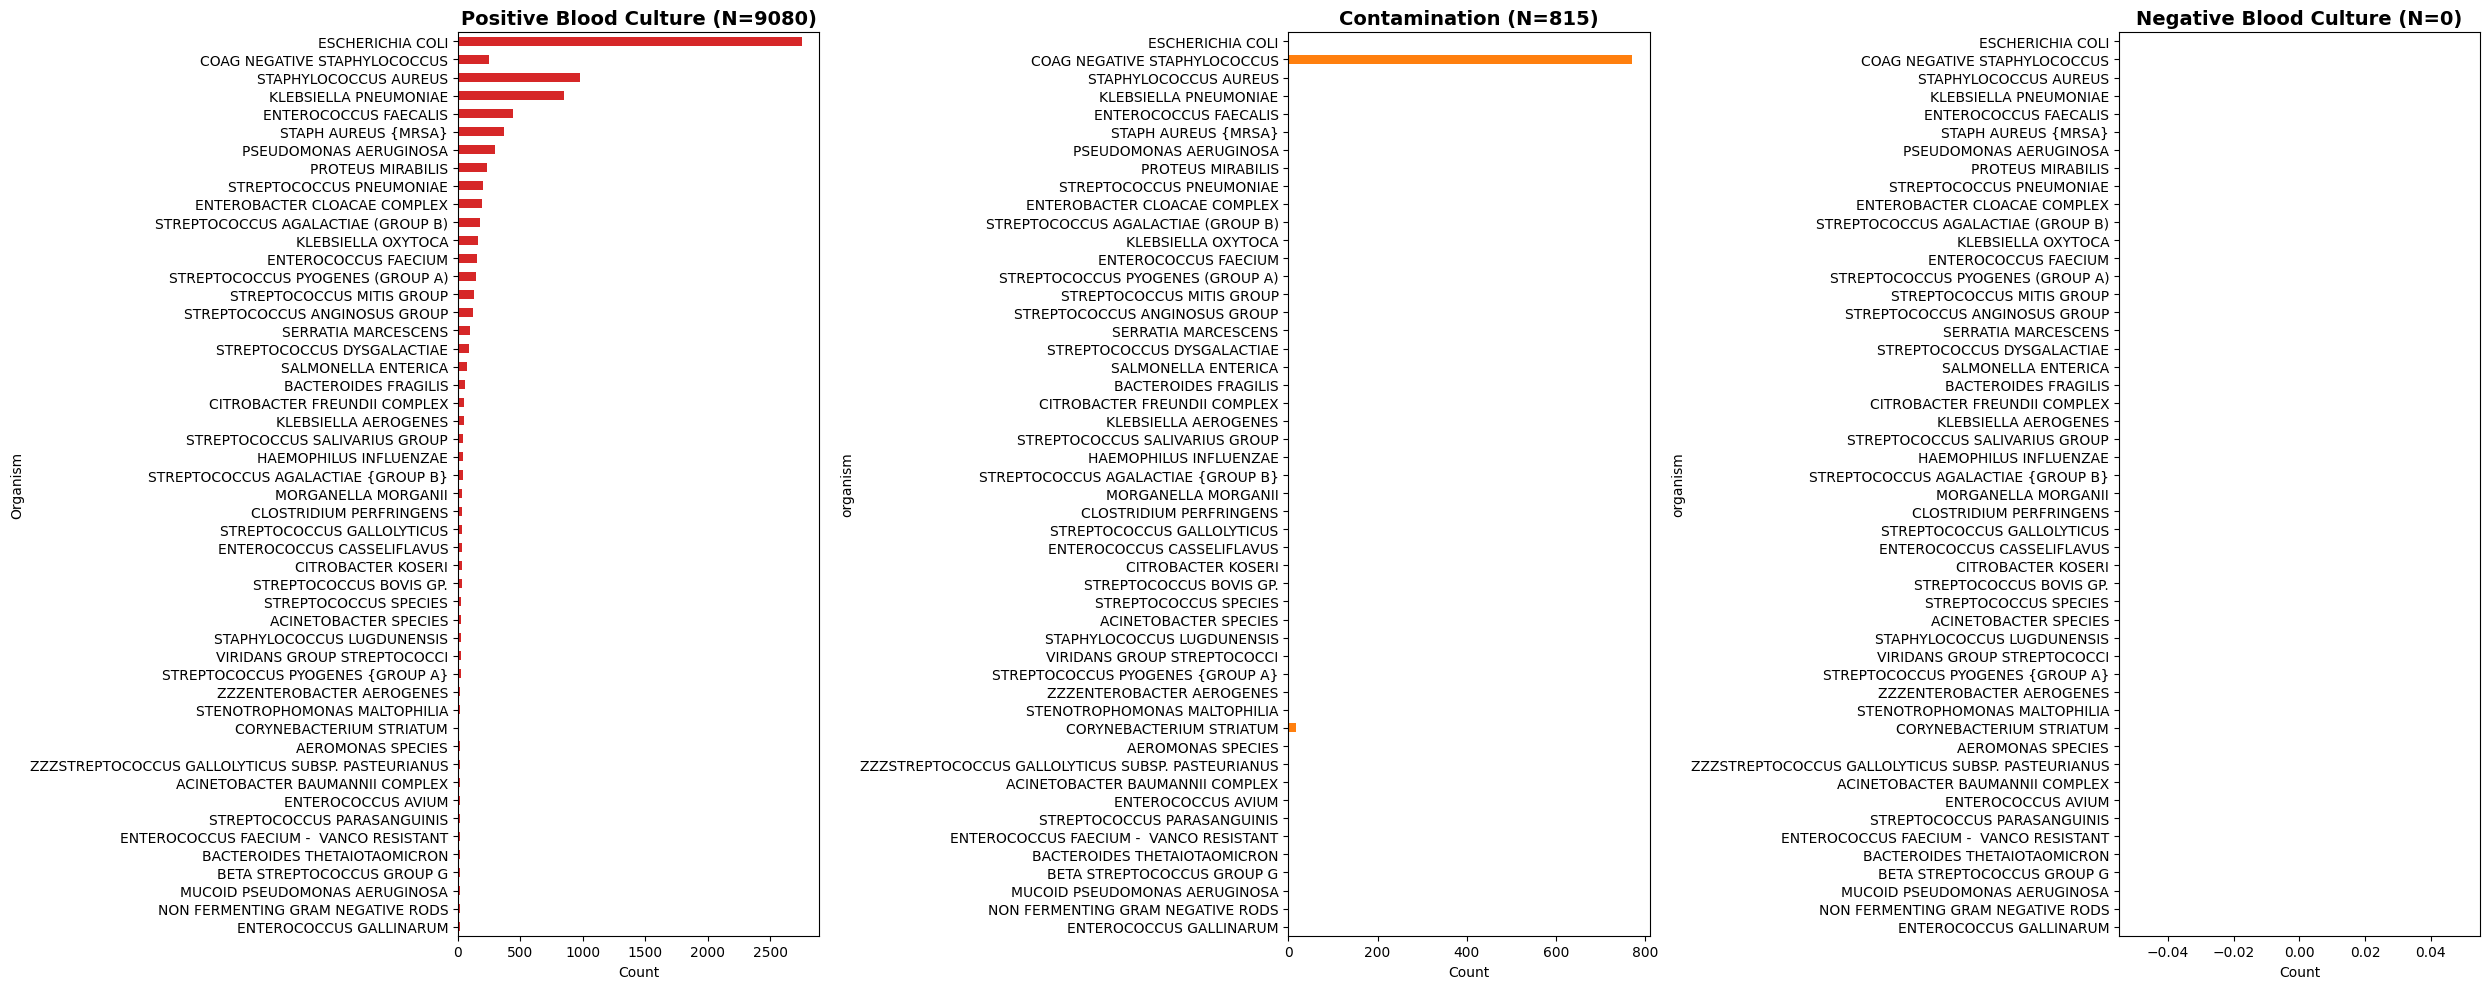

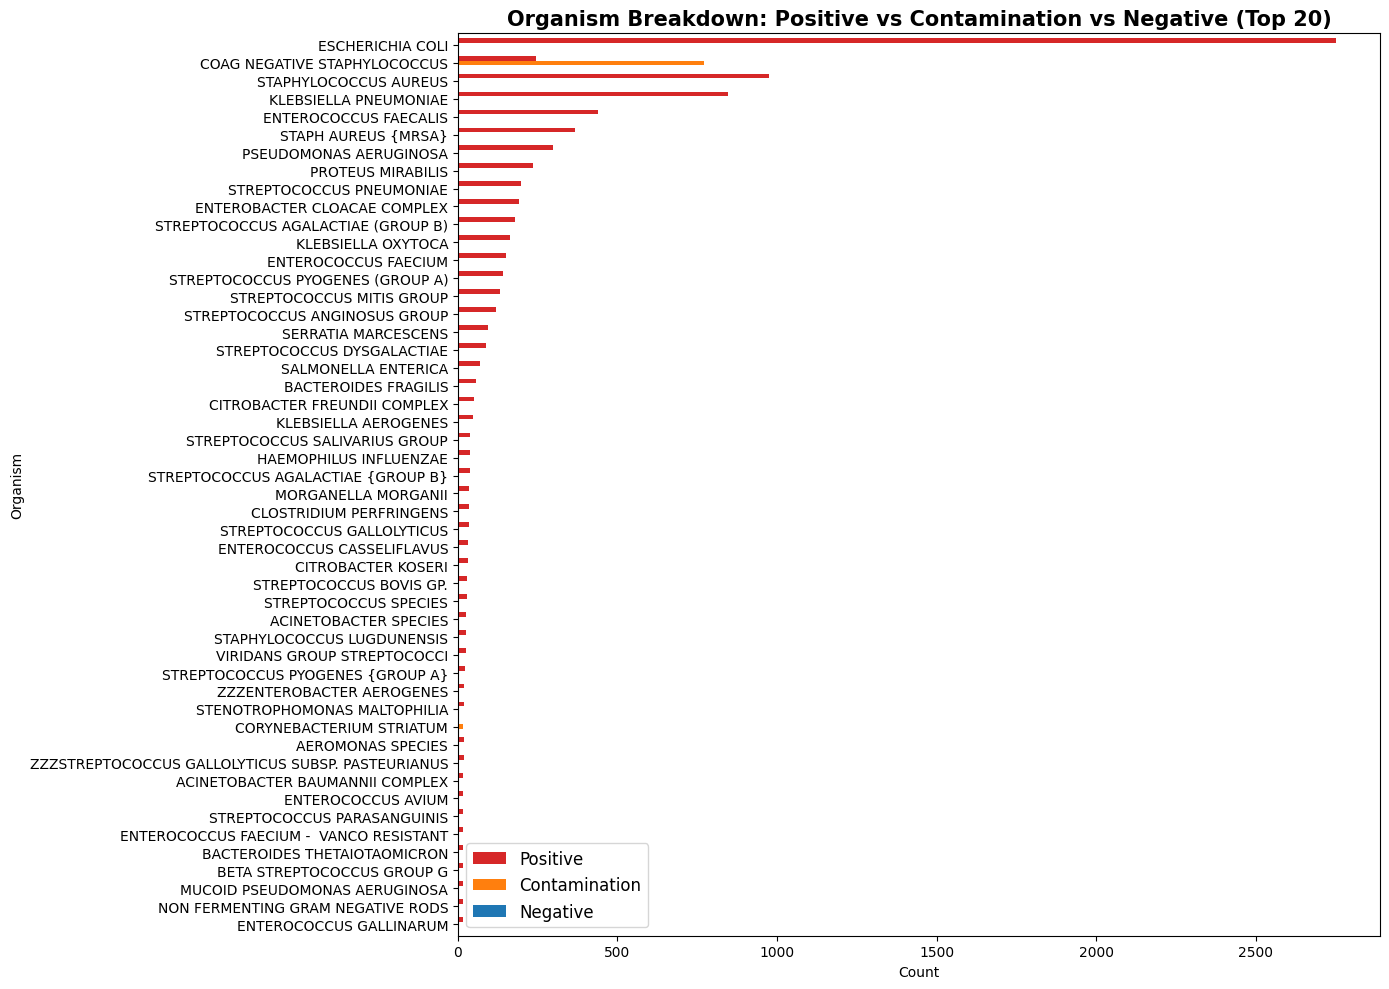


Top 20 Organisms by Culture Label:

                                                   Positive  Contamination  Negative  Total  % Positive  % Contamination  % Negative
organism                                                                                                                            
ESCHERICHIA COLI                                       2752              0         0   2752      100.00             0.00         0.0
COAG NEGATIVE STAPHYLOCOCCUS                            246            771         0   1017       24.19            75.81         0.0
STAPHYLOCOCCUS AUREUS                                   975              0         0    975      100.00             0.00         0.0
KLEBSIELLA PNEUMONIAE                                   845              0         0    845      100.00             0.00         0.0
ENTEROCOCCUS FAECALIS                                   439              0         0    439      100.00             0.00         0.0
STAPH AUREUS {MRSA}             

,Positive,Contamination,Negative,Total,% Positive,% Contamination,% Negative
organism,,,,,,,
ESCHERICHIA COLI,2752,0,0,2752,100.00,0.00,0.0
COAG NEGATIVE STAPHYLOCOCCUS,246,771,0,1017,24.19,75.81,0.0
STAPHYLOCOCCUS AUREUS,975,0,0,975,100.00,0.00,0.0
KLEBSIELLA PNEUMONIAE,845,0,0,845,100.00,0.00,0.0
ENTEROCOCCUS FAECALIS,439,0,0,439,100.00,0.00,0.0
STAPH AUREUS {MRSA},367,0,0,367,100.00,0.00,0.0
PSEUDOMONAS AERUGINOSA,298,0,0,298,100.00,0.00,0.0
PROTEUS MIRABILIS,236,0,0,236,100.00,0.00,0.0
STREPTOCOCCUS PNEUMONIAE,199,0,0,199,100.00,0.00,0.0


In [24]:
#  -------------------------------------------------
# 1. Split into the 3 groups
# -------------------------------------------------
pos_orgs  = organism_prevalence[organism_prevalence['final_label'] == "positive"]['organism'].value_counts()
cont_orgs = organism_prevalence[organism_prevalence['final_label'] == 'contamination']['organism'].value_counts()
neg_orgs  = organism_prevalence[organism_prevalence['final_label'] == 'negative']['organism'].value_counts()

# -------------------------------------------------
# 2. Get top 20 organisms overall
# -------------------------------------------------
all_organisms = organism_prevalence['organism'].value_counts()
top_organisms = all_organisms.head(50).index.tolist()

# reindex
pos_counts  = pos_orgs.reindex(top_organisms, fill_value=0)
cont_counts = cont_orgs.reindex(top_organisms, fill_value=0)
neg_counts  = neg_orgs.reindex(top_organisms, fill_value=0)

# -------------------------------------------------
# 3. Three-panel subplot: Positive | Contamination | Negative
# -------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# positive plot
pos_counts.plot(kind='barh', ax=axs[0], color='#d62728')
axs[0].set_title(f'Positive Blood Culture (N={pos_orgs.sum()})', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Organism')
axs[0].invert_yaxis()

# contamination plot
cont_counts.plot(kind='barh', ax=axs[1], color='#ff7f0e')
axs[1].set_title(f'Contamination (N={cont_orgs.sum()})', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Count')
axs[1].invert_yaxis()

# negative plot
neg_counts.plot(kind='barh', ax=axs[2], color='#1f77b4')
axs[2].set_title(f'Negative Blood Culture (N={neg_orgs.sum()})', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Count')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4. Grouped bar chart (all 3 classes side-by-side)
# -------------------------------------------------

comparison_df = pd.DataFrame({
    'Positive': pos_counts,
    'Contamination': cont_counts,
    'Negative': neg_counts
})

fig, ax = plt.subplots(figsize=(14, 10))

comparison_df.plot(kind='barh', ax=ax, color=['#d62728', '#ff7f0e', '#1f77b4'], width=0.8)
ax.set_title('Organism Breakdown: Positive vs Contamination vs Negative (Top 20)', fontsize=15, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Organism')
ax.invert_yaxis()
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 5. Pretty table summary
# -------------------------------------------------

print("\nTop 20 Organisms by Culture Label:\n")

summary_df = comparison_df.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['% Positive'] = (summary_df['Positive'] / summary_df['Total'] * 100).round(2)
summary_df['% Contamination'] = (summary_df['Contamination'] / summary_df['Total'] * 100).round(2)
summary_df['% Negative'] = (summary_df['Negative'] / summary_df['Total'] * 100).round(2)

summary_df = summary_df.sort_values('Total', ascending=False)

print(summary_df.to_string())
summary_df


In [11]:
# Upload refactor_base_cohort to BigQuery as a temporary table
table_id_cohort_with_labels_temp = f"{project_id}.blood_culture_stewardship_sandy_2024.ED_orders_cohort_strict_with_label_peds_and_adults"

# Upload the DataFrame to BigQuery
enriched_label.to_gbq(
    destination_table=table_id_cohort_with_labels_temp,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded enriched_label to {table_id_cohort_with_labels_temp}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_4204/944754780.py:5: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  enriched_label.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]

Uploaded enriched_label to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.ED_orders_cohort_strict_with_label_peds_and_adults


In [12]:
import pandas as pd
from datetime import timedelta

# 0) Make sure the encounter time column is datetime
enriched_label["blood_culture_order_datetime_utc"] = pd.to_datetime(
    enriched_label["blood_culture_order_datetime_utc"]
)

# 1) Collapse to one row per encounter (anon_id + encounter), with:
#    - encounter-level label
#    - index_time = earliest culture time in that encounter
encounters = (
    enriched_label
    .groupby(["anon_id", "pat_enc_csn_id_coded"], as_index=False)
    .agg(
        encounter_label=("final_label", "first"),
        index_time=("blood_culture_order_datetime_utc", "min"),
    )
)

# 2) For each patient, flag encounters that occur within 14 days AFTER
#    any positive encounter for that same patient
def mark_within_14d_of_positive(group: pd.DataFrame) -> pd.DataFrame:
    group = group.sort_values("index_time")
    positive_times = group.loc[group["encounter_label"] == "positive", "index_time"].tolist()

    if not positive_times:
        group["within_14d_of_positive"] = False
        return group

    flags = []
    for t in group["index_time"]:
        # strictly after a positive encounter, and within 14 days
        flag = any((t > pt) and (t <= pt + timedelta(days=14)) for pt in positive_times)
        flags.append(flag)

    group["within_14d_of_positive"] = flags
    return group

encounters = (
    encounters
    .groupby("anon_id", group_keys=False)
    .apply(mark_within_14d_of_positive)
)

# 3) Keep only encounters that are NOT within 14 days of a positive
encounters_keep = encounters.loc[
    ~encounters["within_14d_of_positive"],
    ["anon_id", "pat_enc_csn_id_coded"]
]

# 4) Filter the original enriched_label down to those encounters
enriched_label_filtered = enriched_label.merge(
    encounters_keep,
    on=["anon_id", "pat_enc_csn_id_coded"],
    how="inner",
)

# enriched_label_filtered is now your leakage-cleaned cohort


/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_4204/1277676416.py:41: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  encounters


In [14]:
enriched_label_filtered

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,blood_culture_order_datetime,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn,department_name,ed_arrival_datetime_utc,ord_value,comment,organisms,n_organisms,n_potential_contam_orgs,n_non_potential_orgs,n_cons_organism,total_sets_in_encounter,has_sensitivity,cons_sets_in_encounter,potential_contam_sets_same_org,set_promoted_from_potential_contam,set_level_label,final_label,encounter_promoted_from_potential_contam
0,JC1001180,131014135377,385649535,2011-06-18 19:18:00+00:00,2011-06-18 12:18:00,2011,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-06-18 18:56:00+00:00,BLOOD; 07122011 FINAL; left antecubital,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
1,JC1004648,131014161816,385740218,2011-07-12 09:11:00+00:00,2011-07-12 02:11:00,2011,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-07-12 05:36:00+00:00,07132011 FINAL; BLOOD; RIGHT antecubital,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
2,JC1005800,131016817550,394404691,2011-12-10 06:36:00+00:00,2011-12-09 22:36:00,2011,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-12-10 05:21:00+00:00,LEFT WRIST; BLOOD; 01122012 FINAL,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
3,JC1006510,131016708856,394025496,2011-11-26 00:47:00+00:00,2011-11-25 16:47:00,2011,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-11-25 23:05:00+00:00,BLOOD; 01022012 FINAL; left hand,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
4,JC1007982,131013210149,381908206,2011-03-22 01:32:00+00:00,2011-03-21 18:32:00,2011,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2011-03-22 00:17:00+00:00,right arm; 04222011 FINAL; BLOOD,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214275,JC969912,131396960030,1028397073,2025-01-29 18:56:00+00:00,2025-01-29 10:56:00,2025,Inpatient,120201020,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,None,EMERGENCY DEPARTMENT PLEASANTON,2025-01-29 18:38:00+00:00,No growth at 5 days.,None,None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,negative,0
214276,JC981409,131395249436,1019628261,2025-01-20 01:32:00+00:00,2025-01-19 17:32:00,2025,Inpatient,120201020,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,None,EMERGENCY DEPARTMENT PLEASANTON,2025-01-20 00:35:00+00:00,No growth at 5 days.,None,None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,negative,0
214277,JC981409,131395249436,1019628262,2025-01-20 01:32:00+00:00,2025-01-19 17:32:00,2025,Inpatient,120201020,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,None,EMERGENCY DEPARTMENT PLEASANTON,2025-01-20 00:35:00+00:00,No growth at 5 days.,None,None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,negative,0
214278,JC989191,131394251271,1016218741,2025-01-04 19:22:00+00:00,2025-01-04 11:22:00,2025,Inpatient,120201020,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLE),Completed,Final result,None,EMERGENCY DEPARTMENT PLEASANTON,2025-01-04 18:36:00+00:00,No growth at 5 days.,None,None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,negative,0


In [15]:
enriched_label_filtered.drop_duplicates(subset=["anon_id", "pat_enc_csn_id_coded", "order_proc_id_coded"])["final_label"].value_counts(normalize=True)

final_label
negative         0.918364
positive         0.075341
contamination    0.006296
Name: proportion, dtype: float64

In [16]:

table_id_base_cohort_with_labels_exlucsion = f"{project_id}.blood_culture_stewardship_sandy_2024.enriched_label_filtered"

# Upload the DataFrame to BigQuery
enriched_label_filtered.to_gbq(
    destination_table=table_id_base_cohort_with_labels_exlucsion,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded enriched_label_filtered to {table_id_base_cohort_with_labels_exlucsion}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_4204/2117784939.py:4: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  enriched_label_filtered.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]

Uploaded enriched_label_filtered to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.enriched_label_filtered


In [105]:
print(f"total valid enriched_label = len(enriched_label) = {len(enriched_label)} orders")
print(f"total valid enriched_label_filtered = len(enriched_label_filtered) = {len(enriched_label_filtered)} orders")
print(f"the filtering percentage is {100 * round(len(enriched_label_filtered)/len(enriched_label),4)}")
print("--------------------------------")
print(f"Those enriched_label_filtered orders from valid encounters n = {len(enriched_label_filtered.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded']))} encounters")
print("--------------------------------")
print(f"Those encounters from valid patients n = {len(enriched_label_filtered.drop_duplicates(subset=['anon_id']))} patients")
print("--------------------------------")

total valid enriched_label = len(enriched_label) = 215471 orders
total valid enriched_label_filtered = len(enriched_label_filtered) = 214280 orders
the filtering percentage is 99.45
--------------------------------
Those enriched_label_filtered orders from valid encounters n = 116988 encounters
--------------------------------
Those encounters from valid patients n = 73183 patients
--------------------------------


In [24]:

table_id_base_cohort_with_labels_exlucsion = f"{project_id}.blood_culture_stewardship_sandy_2024.enriched_label_filtered"

# demo

In [30]:
query = f"""
WITH demos AS (
    SELECT 
        c.*,
        demo.gender,

        -- BMI capping logic (replace 10 and 80 with your preferred thresholds)
        CASE 
            WHEN demo.bmi IS NULL THEN NULL
            WHEN demo.bmi < 0 THEN NULL          -- too low → set null
            WHEN demo.bmi > 200 THEN NULL          -- too high → set null
            ELSE demo.bmi                         -- keep valid BMI
        END AS bmi,

        CASE 
            WHEN demo.birth_date_jittered_utc IS NOT NULL 
            THEN DATE_DIFF(
                    CAST(c.blood_culture_order_datetime_utc AS DATE), 
                    CAST(demo.birth_date_jittered_utc AS DATE), 
                    YEAR
                 )
            ELSE NULL
        END AS age

    FROM `{table_id_base_cohort_with_labels_exlucsion}` c
    LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.demographic` demo
    ON c.anon_id = demo.anon_id
)

SELECT *
FROM demos
WHERE age > 18
"""

Adult_ED_BCx_order_cohort_strict_bmi_age_gender= client.query(query).to_dataframe()

In [31]:
Adult_ED_BCx_order_cohort_strict_bmi_age_gender[["age", "bmi", "gender"]].describe()

,age,bmi
count,197798.0,191230.000000
mean,63.082433,26.590740
std,19.602401,7.336743
min,19.0,0.310000
25%,49.0,21.800000
50%,65.0,25.360000
75%,78.0,29.920000
max,124.0,184.540000


In [106]:
print(f"the number of adult ED BCx orders is {len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender)}")
print(f"the percentage of adult ED BCx orders is {100 * round(len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender)/len(enriched_label_filtered),4)}")
print("--------------------------------")
print(f"the number of adult ED BCx encounters is {len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded']))}")
print(f"the percentage of adult ED BCx encounters is {100 * round(len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded']))/len(enriched_label_filtered.drop_duplicates(subset=['anon_id', 'pat_enc_csn_id_coded'])),4)}")
print("--------------------------------")
print(f"the number of adult ED BCx patients is {len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender.drop_duplicates(subset=['anon_id']))}")
print(f"the percentage of adult ED BCx patients is {100 * round(len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender.drop_duplicates(subset=['anon_id']))/len(enriched_label_filtered.drop_duplicates(subset=['anon_id'])),4)}")
print("--------------------------------")


the number of adult ED BCx orders is 197798
the percentage of adult ED BCx orders is 92.31
--------------------------------
the number of adult ED BCx encounters is 101812
the percentage of adult ED BCx encounters is 87.03
--------------------------------
the number of adult ED BCx patients is 62919
the percentage of adult ED BCx patients is 85.97
--------------------------------


In [125]:
print("this is enriched label for adult only and prevalence at set level")
Adult_ED_BCx_order_cohort_strict_bmi_age_gender["set_level_label"].value_counts(normalize=True)

# print("this is enriched label for adult only and prevalence at encounter level")

# Adult_ED_BCx_order_cohort_strict_bmi_age_gender.drop_duplicates(subset=["anon_id", "pat_enc_csn_id_coded"])["final_label"].value_counts(normalize=True)

this is enriched label for adult only and prevalence at set level


set_level_label
negative         0.955389
positive         0.040996
contamination    0.003615
Name: proportion, dtype: float64

In [35]:
df_sorted = Adult_ED_BCx_order_cohort_strict_bmi_age_gender.sort_values(
    ['anon_id', 'pat_enc_csn_id_coded', 'blood_culture_order_datetime_utc']
)

Adult_ED_BCx_order_cohort_strict_bmi_age_gender_latest = (
    df_sorted
    .groupby(['anon_id', 'pat_enc_csn_id_coded'], as_index=False)
    .tail(1)
    .reset_index(drop=True)
)


In [36]:

table_id_analyse_cohort_withfinal_label_adult = f"{project_id}.blood_culture_stewardship_sandy_2024.enriched_label_filtered_adult_only_analysis_cohort"

# Upload the DataFrame to BigQuery
Adult_ED_BCx_order_cohort_strict_bmi_age_gender_latest.to_gbq(
    destination_table=table_id_analyse_cohort_withfinal_label_adult,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded Adult_ED_BCx_order_cohort_strict_bmi_age_gender to {table_id_analyse_cohort_withfinal_label_adult}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/4025689471.py:4: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  Adult_ED_BCx_order_cohort_strict_bmi_age_gender_latest.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

Uploaded Adult_ED_BCx_order_cohort_strict_bmi_age_gender to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.enriched_label_filtered_adult_only_analysis_cohort


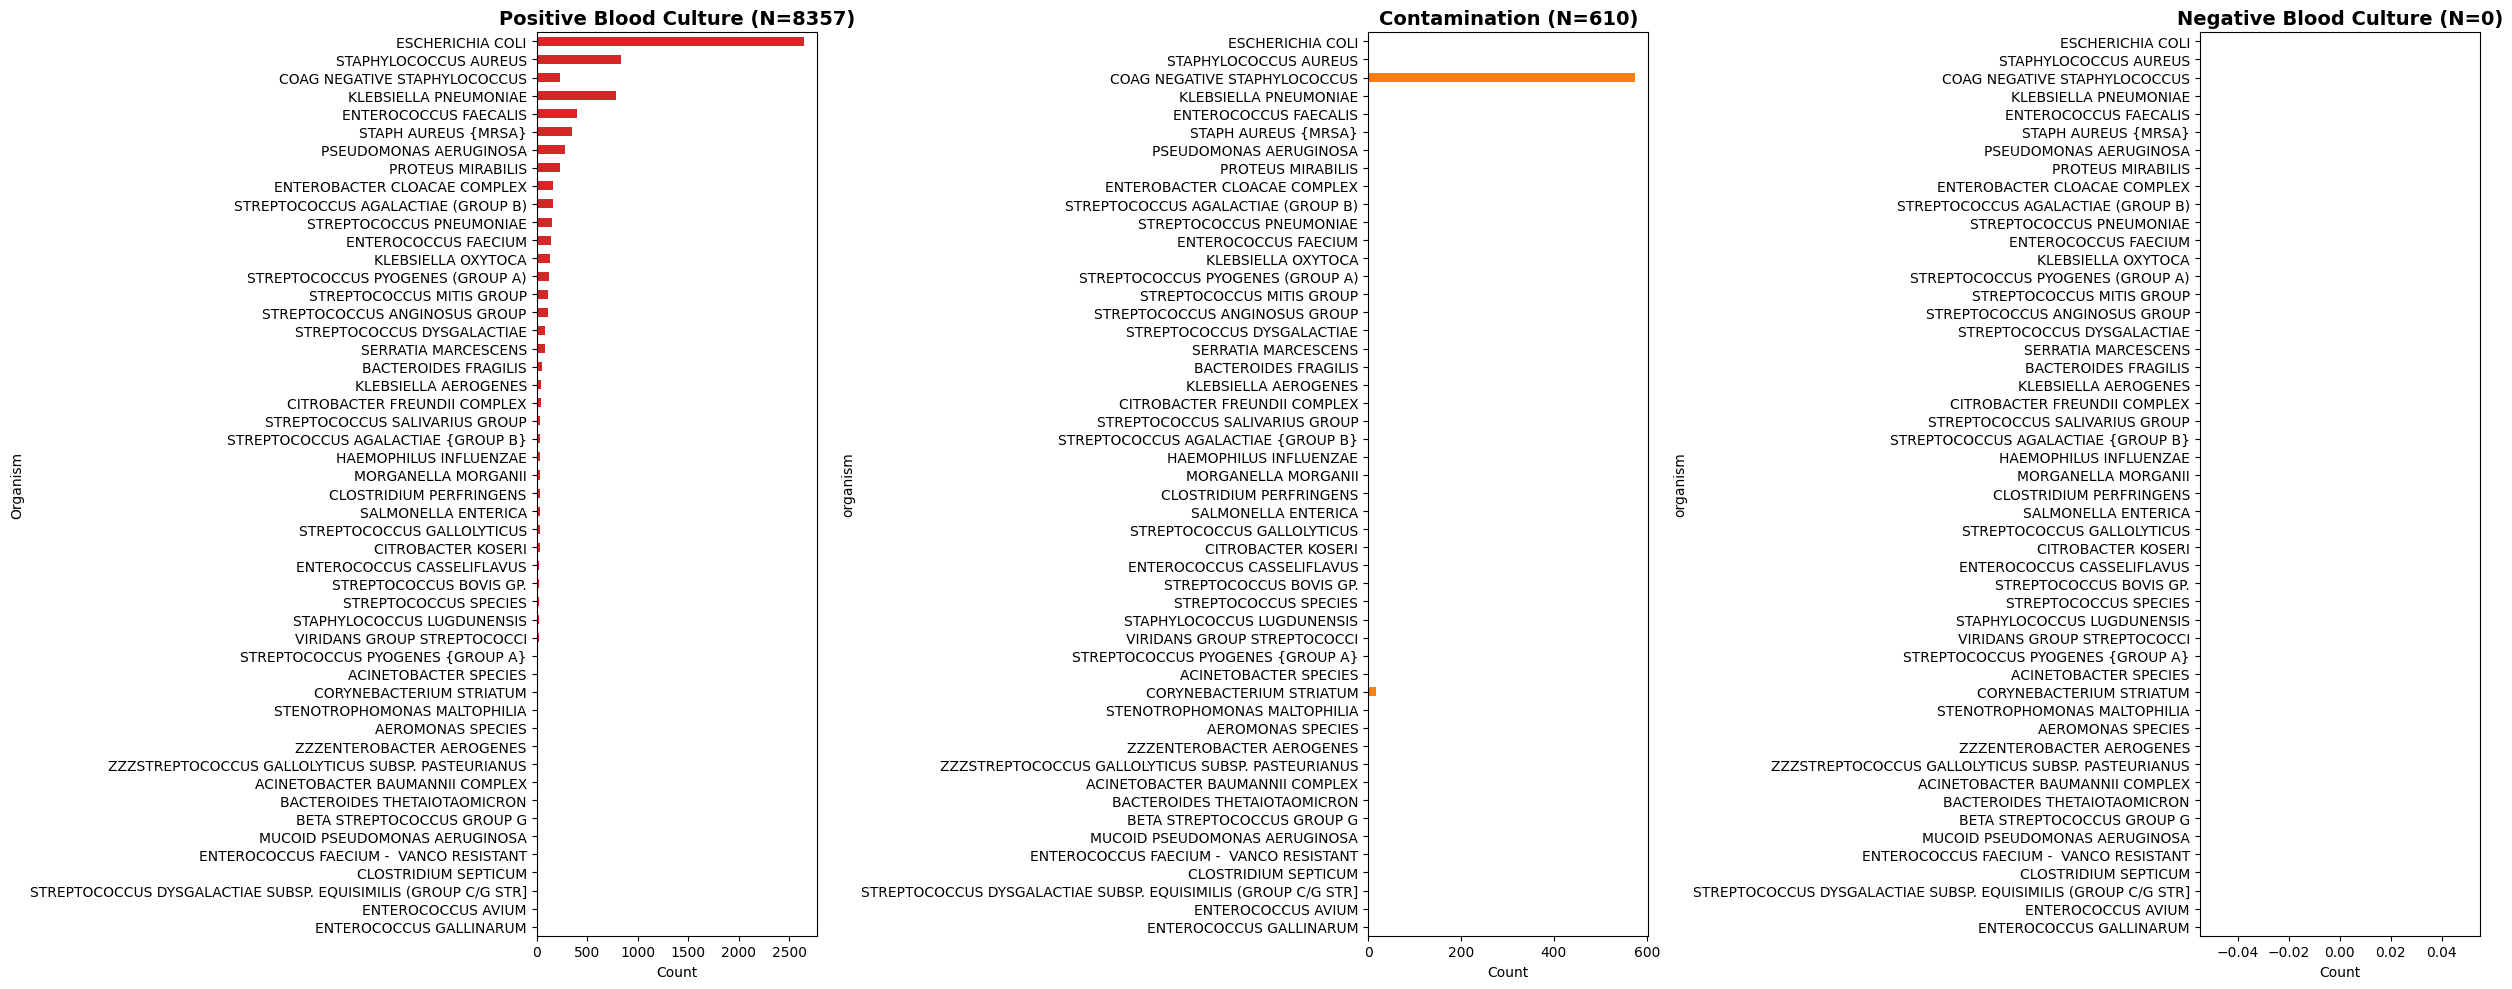

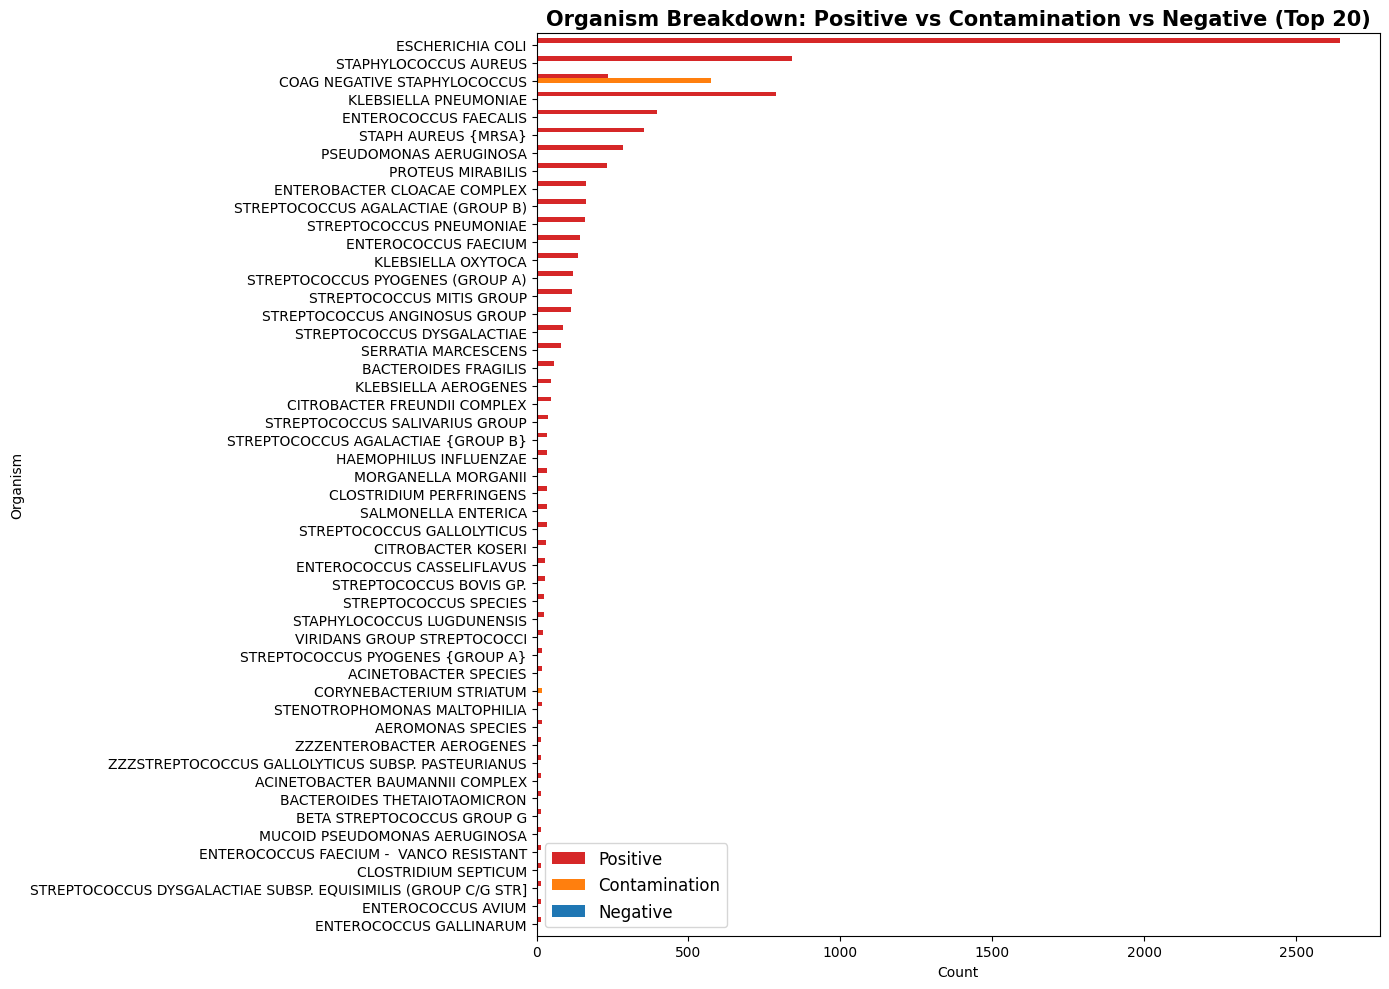


Top 20 Organisms by Culture Label:

                                                               Positive  Contamination  Negative  Total  % Positive  % Contamination  % Negative
organism                                                                                                                                        
ESCHERICHIA COLI                                                   2643              0         0   2643      100.00             0.00         0.0
STAPHYLOCOCCUS AUREUS                                               840              0         0    840      100.00             0.00         0.0
COAG NEGATIVE STAPHYLOCOCCUS                                        234            575         0    809       28.92            71.08         0.0
KLEBSIELLA PNEUMONIAE                                               789              0         0    789      100.00             0.00         0.0
ENTEROCOCCUS FAECALIS                                               396              0       

,Positive,Contamination,Negative,Total,% Positive,% Contamination,% Negative
organism,,,,,,,
ESCHERICHIA COLI,2643,0,0,2643,100.00,0.00,0.0
STAPHYLOCOCCUS AUREUS,840,0,0,840,100.00,0.00,0.0
COAG NEGATIVE STAPHYLOCOCCUS,234,575,0,809,28.92,71.08,0.0
KLEBSIELLA PNEUMONIAE,789,0,0,789,100.00,0.00,0.0
ENTEROCOCCUS FAECALIS,396,0,0,396,100.00,0.00,0.0
STAPH AUREUS {MRSA},353,0,0,353,100.00,0.00,0.0
PSEUDOMONAS AERUGINOSA,283,0,0,283,100.00,0.00,0.0
PROTEUS MIRABILIS,232,0,0,232,100.00,0.00,0.0
ENTEROBACTER CLOACAE COMPLEX,163,0,0,163,100.00,0.00,0.0


In [46]:
# Only keep the columns we need from labeled_df
label_cols = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded', 'final_label', "set_level_label"]

labels_unique =Adult_ED_BCx_order_cohort_strict_bmi_age_gender[label_cols]

# Merge
merged = labels_unique.merge(
    culture_sens_df.drop_duplicates(subset=['anon_id', 'order_proc_id_coded', "organism"]),
    on=['anon_id', 'order_proc_id_coded'],
    how='inner'
)
import pandas as pd

# -------------------------------------------------
# 0. Work at encounter level, avoid double-counting
# -------------------------------------------------
encounter_cols = ['anon_id', 'pat_enc_csn_id_coded']

# one row per encounter-organism-final_label
merged_unique = merged.drop_duplicates(
    subset=encounter_cols + ['organism', 'final_label']
).copy()

# -------------------------------------------------
# 1. Define CoNS and mark it
# -------------------------------------------------
def is_cons_org(name):
    if pd.isna(name):
        return False
    # normalize to uppercase and strip spaces just in case
    n = str(name).strip().upper()
    return n == "COAG NEGATIVE STAPHYLOCOCCUS"

merged_unique['is_cons'] = merged_unique['organism'].apply(is_cons_org)

# -------------------------------------------------
# 2. For each encounter, check if any non-CoNS grew
# -------------------------------------------------
grp = merged_unique.groupby(encounter_cols)

# True if encounter has at least one non-CoNS organism
merged_unique['enc_has_non_cons'] = grp['is_cons'].transform(lambda s: (~s).any())

# (optional) True if encounter has only CoNS
merged_unique['enc_has_only_cons'] = grp['is_cons'].transform(lambda s: s.all())

# -------------------------------------------------
# 3. Drop CoNS rows in mixed positive encounters
#    (positive + multiple orgs where CoNS is just one)
# -------------------------------------------------
mask_drop_cons_in_mixed_positive = (
    (merged_unique['final_label'] == 'positive') &
    (merged_unique['is_cons']) &
    (merged_unique['enc_has_non_cons'])
)

organism_prevalence = merged_unique.loc[~mask_drop_cons_in_mixed_positive].copy()
#  -------------------------------------------------
# 1. Split into the 3 groups
# -------------------------------------------------
pos_orgs  = organism_prevalence[organism_prevalence['final_label'] == "positive"]['organism'].value_counts()
cont_orgs = organism_prevalence[organism_prevalence['final_label'] == 'contamination']['organism'].value_counts()
neg_orgs  = organism_prevalence[organism_prevalence['final_label'] == 'negative']['organism'].value_counts()

# -------------------------------------------------
# 2. Get top 20 organisms overall
# -------------------------------------------------
all_organisms = organism_prevalence['organism'].value_counts()
top_organisms = all_organisms.head(50).index.tolist()

# reindex
pos_counts  = pos_orgs.reindex(top_organisms, fill_value=0)
cont_counts = cont_orgs.reindex(top_organisms, fill_value=0)
neg_counts  = neg_orgs.reindex(top_organisms, fill_value=0)

# -------------------------------------------------
# 3. Three-panel subplot: Positive | Contamination | Negative
# -------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# positive plot
pos_counts.plot(kind='barh', ax=axs[0], color='#d62728')
axs[0].set_title(f'Positive Blood Culture (N={pos_orgs.sum()})', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Organism')
axs[0].invert_yaxis()

# contamination plot
cont_counts.plot(kind='barh', ax=axs[1], color='#ff7f0e')
axs[1].set_title(f'Contamination (N={cont_orgs.sum()})', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Count')
axs[1].invert_yaxis()

# negative plot
neg_counts.plot(kind='barh', ax=axs[2], color='#1f77b4')
axs[2].set_title(f'Negative Blood Culture (N={neg_orgs.sum()})', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Count')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4. Grouped bar chart (all 3 classes side-by-side)
# -------------------------------------------------

comparison_df = pd.DataFrame({
    'Positive': pos_counts,
    'Contamination': cont_counts,
    'Negative': neg_counts
})

fig, ax = plt.subplots(figsize=(14, 10))

comparison_df.plot(kind='barh', ax=ax, color=['#d62728', '#ff7f0e', '#1f77b4'], width=0.8)
ax.set_title('Organism Breakdown: Positive vs Contamination vs Negative (Top 20)', fontsize=15, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Organism')
ax.invert_yaxis()
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 5. Pretty table summary
# -------------------------------------------------

print("\nTop 20 Organisms by Culture Label:\n")

summary_df = comparison_df.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['% Positive'] = (summary_df['Positive'] / summary_df['Total'] * 100).round(2)
summary_df['% Contamination'] = (summary_df['Contamination'] / summary_df['Total'] * 100).round(2)
summary_df['% Negative'] = (summary_df['Negative'] / summary_df['Total'] * 100).round(2)

summary_df = summary_df.sort_values('Total', ascending=False)

print(summary_df.to_string())
summary_df



In [118]:
import pandas as pd

# Read the Excel file without using the first row as header
MasterOrganismList = pd.read_excel("/Users/sandychen/Downloads/MasterOrganismList.xlsx", header=None)

# Rename columns by index
MasterOrganismList = MasterOrganismList.rename(columns={
    0: "organism",
    1: "organism_new_name",
    2: "comment",
    3: "cnt"
})

# Drop row 0
MasterOrganismList = MasterOrganismList.drop(index=0).reset_index(drop=True)

In [120]:
MasterOrganismList

,organism,organism_new_name,comment,cnt
0,organism,organism_new_name,NaN,cnt
1,ABIOTROPHIA SPECIES (OR GRANULICATELLA SPECIES),Abiotrophia spp./Granulicatella spp.,NaN,10
2,ACHROMOBACTER XYLOSOXIDANS,Achromobacter xylosoxidans,NaN,14
3,ACINETOBACTER BAUMANNII,Acinetobacter baumannii,NaN,14
4,ACINETOBACTER BAUMANNII COMPLEX,Acinetobacter baumannii complex,NaN,35
...,...,...,...,...
220,ZZZMYCOBACTERIUM MUCOGENICUM,Mycobacterium mucogenicum group,NaN,8
221,ZZZPROTEUS PENNERI,Proteus penneri,NaN,2
222,ZZZPROTEUS VULGARIS,Proteus vulgaris group,NaN,5
223,ZZZSTREPTOCOCCUS GALLOLYTICUS SUBSP. GALLOLYTICUS,Streptococcus bovis group,NaN,1


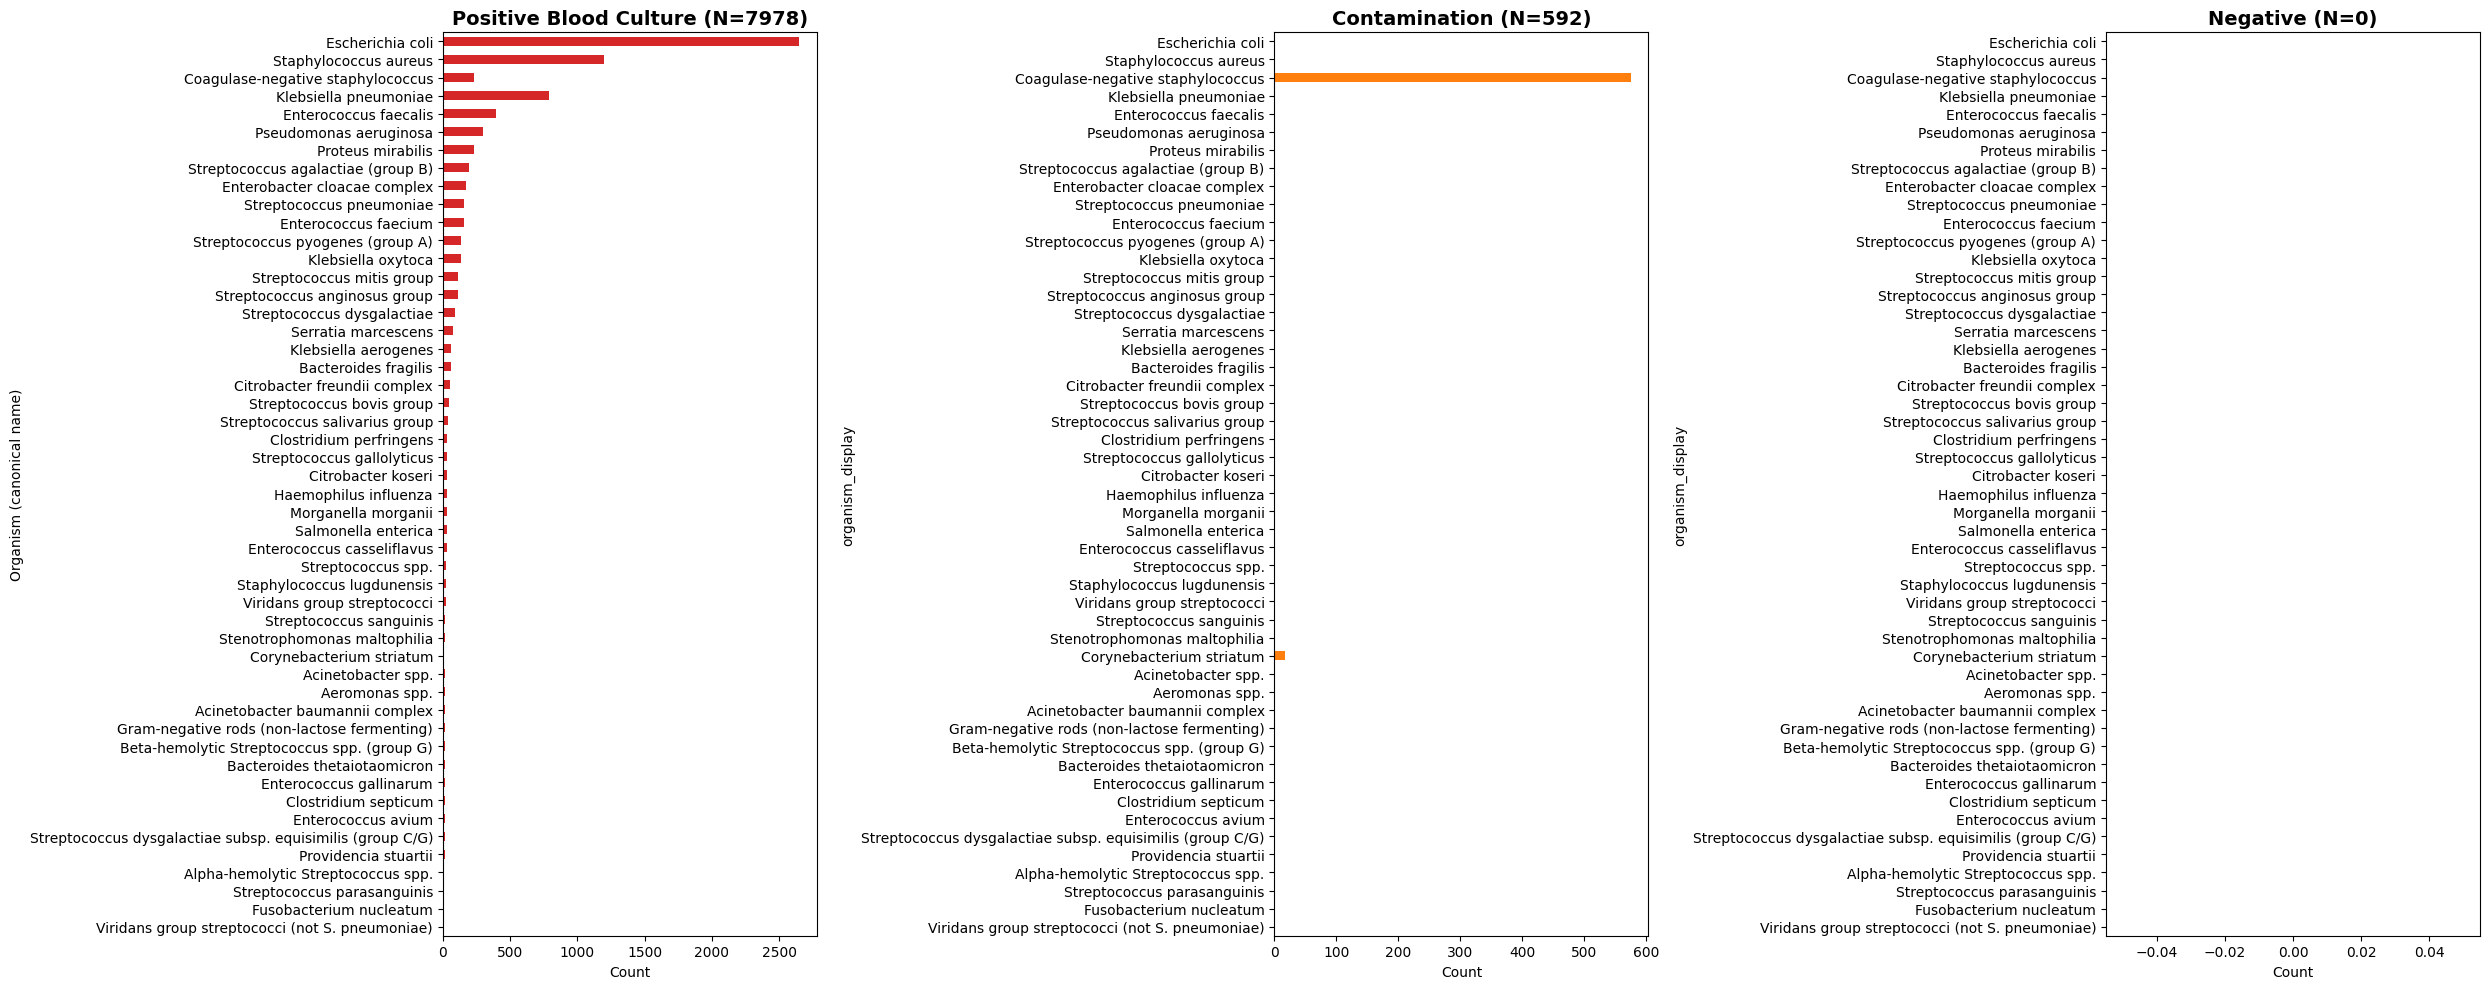

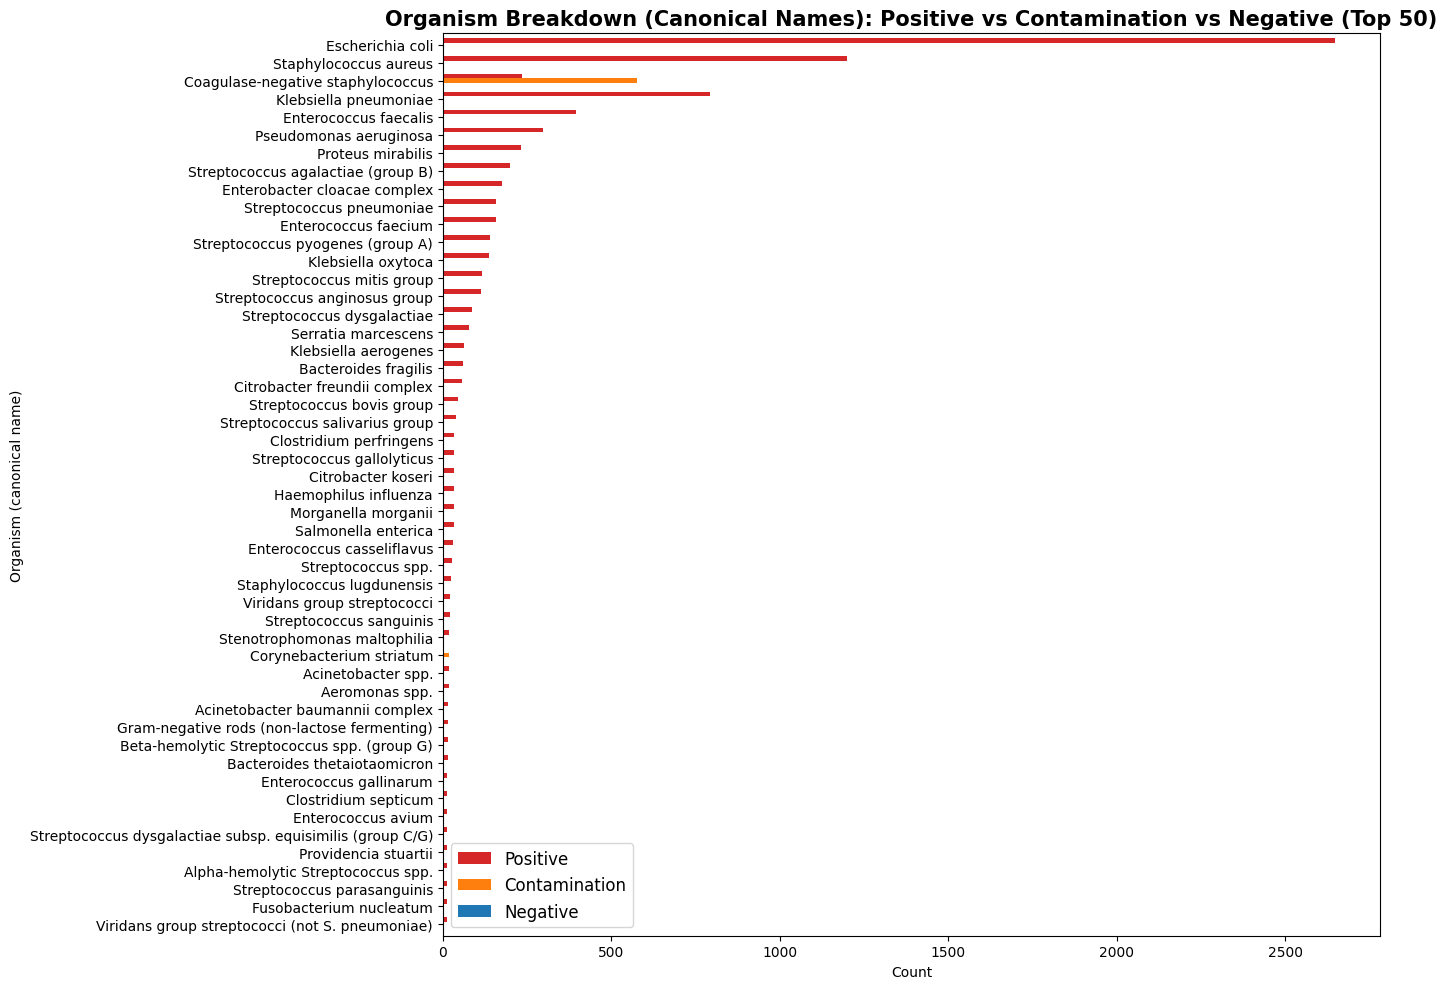


Top 50 Organisms (Canonical Names) by Culture Label:

final_label                                                Positive  Contamination  Negative  Total  % Positive  % Contamination  % Negative
organism_display                                                                                                                            
Escherichia coli                                               2648              0         0   2648      100.00             0.00         0.0
Staphylococcus aureus                                          1198              0         0   1198      100.00             0.00         0.0
Coagulase-negative staphylococcus                               234            575         0    809       28.92            71.08         0.0
Klebsiella pneumoniae                                           793              0         0    793      100.00             0.00         0.0
Enterococcus faecalis                                           396              0         0    396

final_label,Positive,Contamination,Negative,Total,% Positive,% Contamination,% Negative
organism_display,,,,,,,
Escherichia coli,2648,0,0,2648,100.00,0.00,0.0
Staphylococcus aureus,1198,0,0,1198,100.00,0.00,0.0
Coagulase-negative staphylococcus,234,575,0,809,28.92,71.08,0.0
Klebsiella pneumoniae,793,0,0,793,100.00,0.00,0.0
Enterococcus faecalis,396,0,0,396,100.00,0.00,0.0
Pseudomonas aeruginosa,298,0,0,298,100.00,0.00,0.0
Proteus mirabilis,232,0,0,232,100.00,0.00,0.0
Streptococcus agalactiae (group B),198,0,0,198,100.00,0.00,0.0
Enterobacter cloacae complex,175,0,0,175,100.00,0.00,0.0


In [124]:
# adult organism break down with name mapping:
import pandas as pd
import matplotlib.pyplot as plt

# Only keep the columns we need from labeled_df
label_cols = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded', 'final_label', "set_level_label"]

labels_unique =Adult_ED_BCx_order_cohort_strict_bmi_age_gender[label_cols]

# Merge
merged = labels_unique.merge(
    culture_sens_df.drop_duplicates(subset=['anon_id', 'order_proc_id_coded', "organism"]),
    on=['anon_id', 'order_proc_id_coded'],
    how='inner'
)
# -------------------------------------------------
# 0. Work at encounter level, avoid double-counting
# -------------------------------------------------
encounter_cols = ['anon_id', 'pat_enc_csn_id_coded']

merged_unique = merged.drop_duplicates(
    subset=encounter_cols + ['organism', 'final_label']
).copy()

# -------------------------------------------------
# 1. CoNS logic stays on the RAW organism name
# -------------------------------------------------
def is_cons_org(name):
    if pd.isna(name):
        return False
    n = str(name).strip().upper()
    return n == "COAG NEGATIVE STAPHYLOCOCCUS"

merged_unique['is_cons'] = merged_unique['organism'].apply(is_cons_org)

grp_enc = merged_unique.groupby(encounter_cols)
merged_unique['enc_has_non_cons']  = grp_enc['is_cons'].transform(lambda s: (~s).any())
merged_unique['enc_has_only_cons'] = grp_enc['is_cons'].transform(lambda s: s.all())

mask_drop_cons_in_mixed_positive = (
    (merged_unique['final_label'] == 'positive') &
    (merged_unique['is_cons']) &
    (merged_unique['enc_has_non_cons'])
)

organism_prevalence = merged_unique.loc[~mask_drop_cons_in_mixed_positive].copy()

# -------------------------------------------------
# 2. Merge in the canonical name (organism_new_name)
#    and choose what to display
# -------------------------------------------------
name_map = MasterOrganismList[['organism', 'organism_new_name']].copy()
name_map['organism'] = name_map['organism'].str.strip()

organism_prevalence['organism'] = organism_prevalence['organism'].astype(str).str.strip()

organism_prevalence = organism_prevalence.merge(
    name_map,
    on='organism',
    how='left'
)

# Use new name when available, otherwise fall back to raw name
organism_prevalence['organism_display'] = organism_prevalence['organism_new_name'].fillna(
    organism_prevalence['organism']
)

# -------------------------------------------------
# 3. Build a single summary table (counts by label)
# -------------------------------------------------
# -------------------------------------------------
# 3. Build a single summary table (counts by label)
# -------------------------------------------------

# normalize labels just in case
organism_prevalence['final_label'] = organism_prevalence['final_label'].str.lower().str.strip()

summary = (
    organism_prevalence
    .groupby(['organism_display', 'final_label'])
    .size()
    .unstack(fill_value=0)  # columns: some subset of {positive, contamination, negative}
)

# Ensure all three expected columns exist (if some label is absent, its col will be created with 0)
for col in ['positive', 'contamination', 'negative']:
    if col not in summary.columns:
        summary[col] = 0

# Reorder columns in a consistent way
summary = summary[['positive', 'contamination', 'negative']]

# Rename columns to nicer names
summary = summary.rename(columns={
    'positive': 'Positive',
    'contamination': 'Contamination',
    'negative': 'Negative',
})

# Total + percentages
summary['Total'] = summary[['Positive', 'Contamination', 'Negative']].sum(axis=1)
summary['% Positive'] = (summary['Positive'] / summary['Total'] * 100).round(2)
summary['% Contamination'] = (summary['Contamination'] / summary['Total'] * 100).round(2)
summary['% Negative'] = (summary['Negative'] / summary['Total'] * 100).round(2)

# Sort and keep top 50 by total count
summary = summary.sort_values('Total', ascending=False)
top_summary = summary.head(50)


# -------------------------------------------------
# 4. Three-panel subplot: Positive | Contamination | Negative
# -------------------------------------------------
pos_counts  = top_summary['Positive']
cont_counts = top_summary['Contamination']
neg_counts  = top_summary['Negative']

fig, axs = plt.subplots(1, 3, figsize=(25, 10))

pos_counts.plot(kind='barh', ax=axs[0], color='#d62728')
axs[0].set_title(f'Positive Blood Culture (N={pos_counts.sum()})', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Organism (canonical name)')
axs[0].invert_yaxis()

cont_counts.plot(kind='barh', ax=axs[1], color='#ff7f0e')
axs[1].set_title(f'Contamination (N={cont_counts.sum()})', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Count')
axs[1].invert_yaxis()

neg_counts.plot(kind='barh', ax=axs[2], color='#1f77b4')
axs[2].set_title(f'Negative (N={neg_counts.sum()})', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Count')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 5. Grouped bar chart with canonical names
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 10))
top_summary[['Positive', 'Contamination', 'Negative']].plot(
    kind='barh', ax=ax, color=['#d62728', '#ff7f0e', '#1f77b4'], width=0.8
)
ax.set_title('Organism Breakdown (Canonical Names): Positive vs Contamination vs Negative (Top 50)',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Organism (canonical name)')
ax.invert_yaxis()
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 50 Organisms (Canonical Names) by Culture Label:\n")
print(top_summary.to_string())
top_summary


Original enriched_label_filtered: 214280 rows
Rows in Adult_ED_BCx_order_cohort_strict_bmi_age_gender: 197798 rows
Rows NOT in latest (kept): 16482 rows


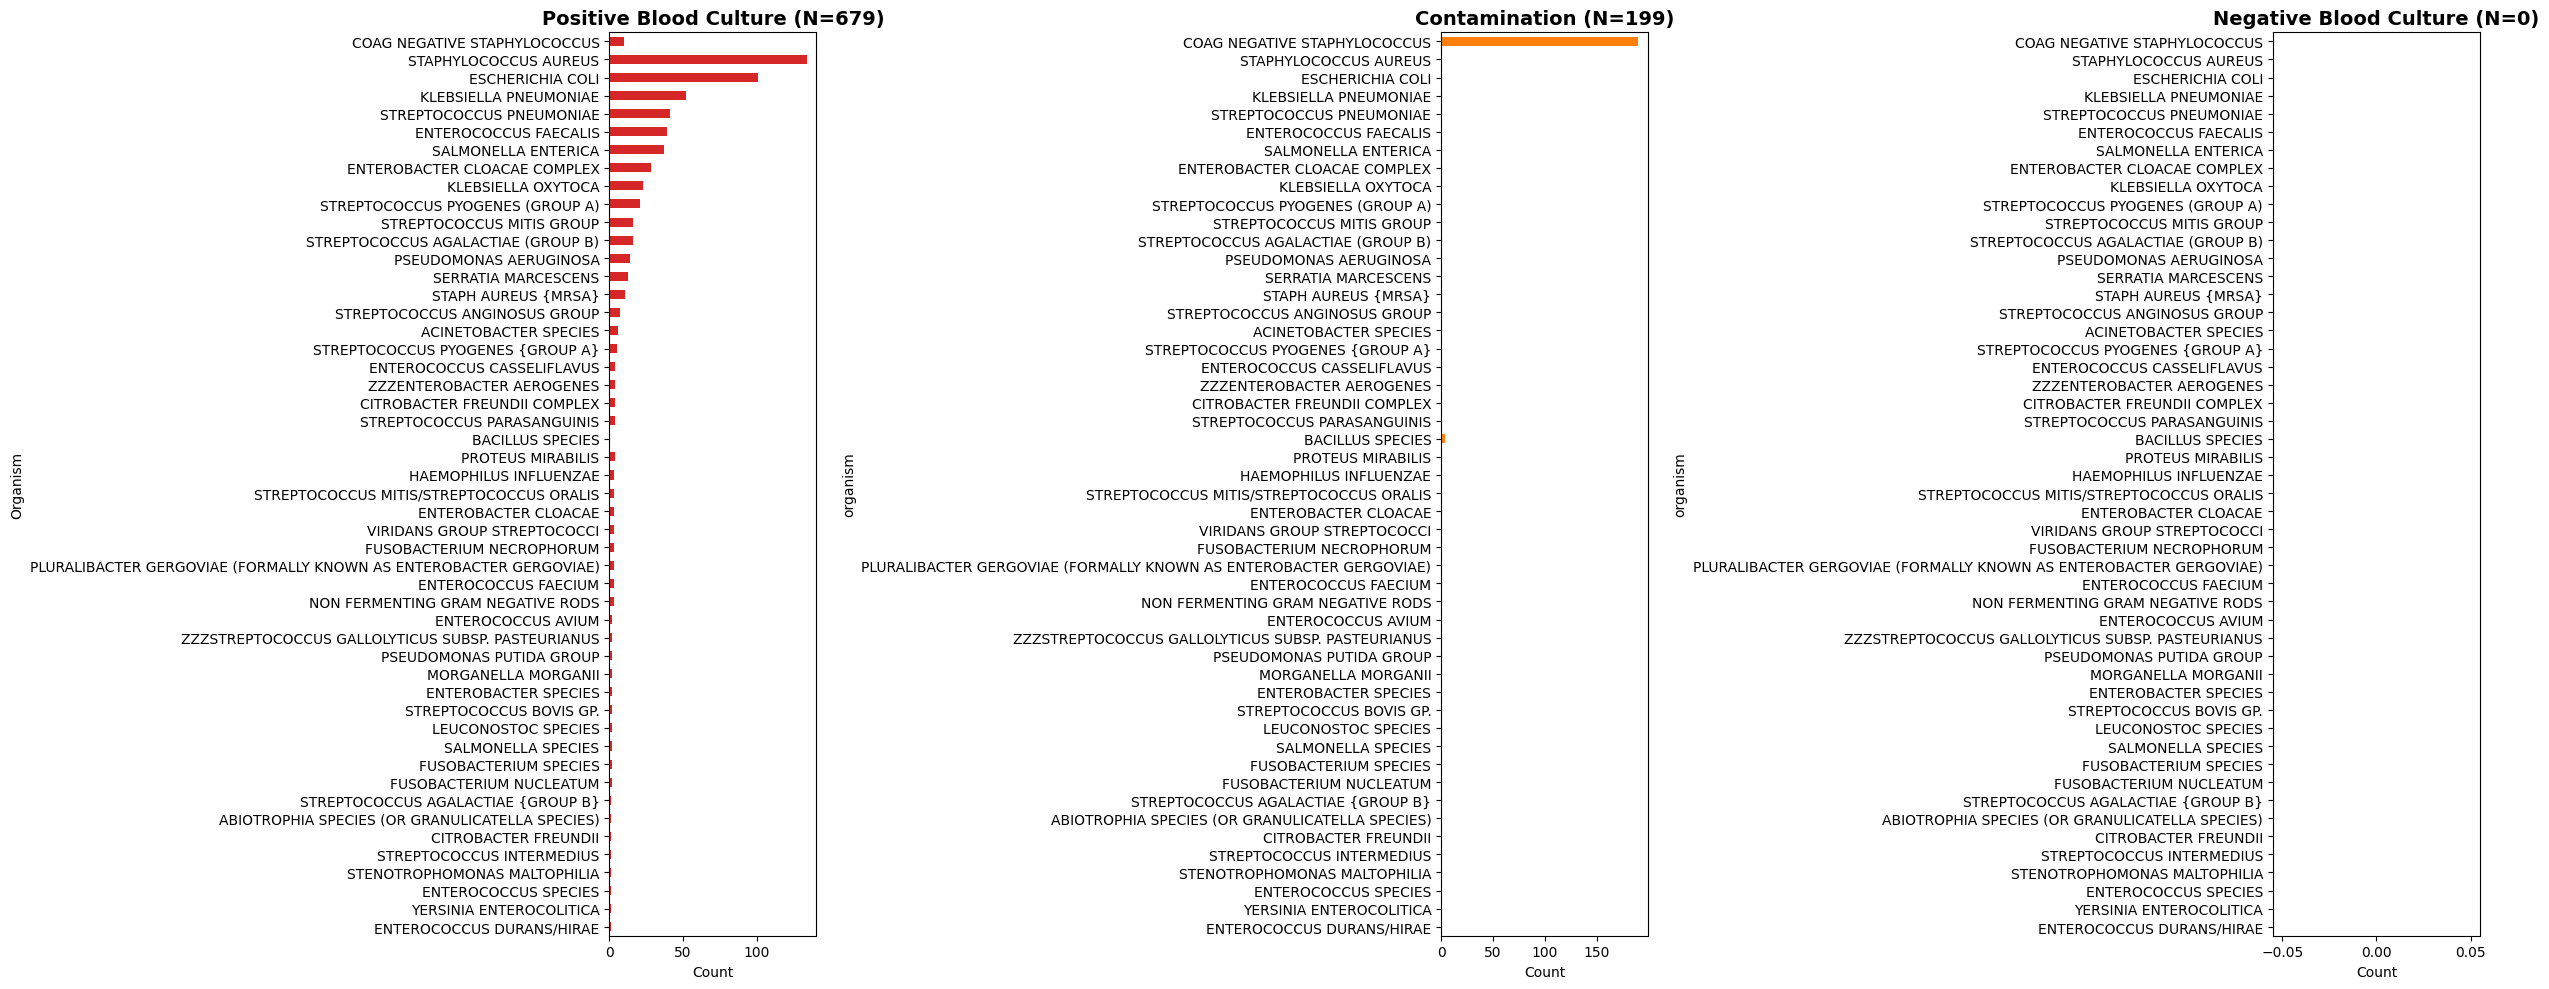

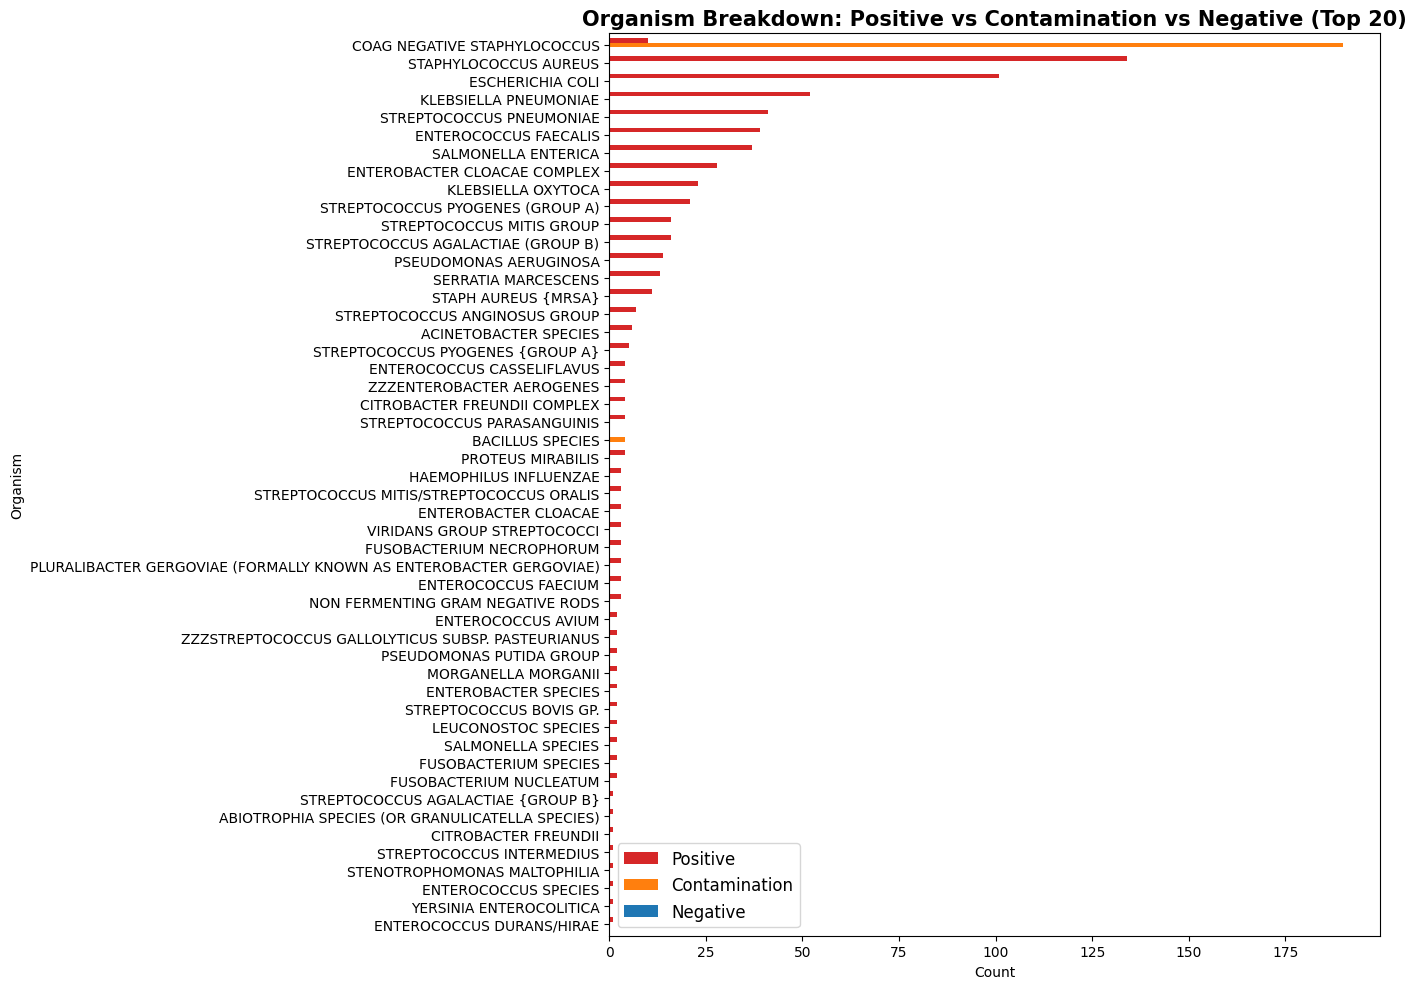


Top 20 Organisms by Culture Label:

                                                                    Positive  Contamination  Negative  Total  % Positive  % Contamination  % Negative
organism                                                                                                                                             
COAG NEGATIVE STAPHYLOCOCCUS                                              10            190         0    200         5.0             95.0         0.0
STAPHYLOCOCCUS AUREUS                                                    134              0         0    134       100.0              0.0         0.0
ESCHERICHIA COLI                                                         101              0         0    101       100.0              0.0         0.0
KLEBSIELLA PNEUMONIAE                                                     52              0         0     52       100.0              0.0         0.0
STREPTOCOCCUS PNEUMONIAE                                       

,Positive,Contamination,Negative,Total,% Positive,% Contamination,% Negative
organism,,,,,,,
COAG NEGATIVE STAPHYLOCOCCUS,10,190,0,200,5.0,95.0,0.0
STAPHYLOCOCCUS AUREUS,134,0,0,134,100.0,0.0,0.0
ESCHERICHIA COLI,101,0,0,101,100.0,0.0,0.0
KLEBSIELLA PNEUMONIAE,52,0,0,52,100.0,0.0,0.0
STREPTOCOCCUS PNEUMONIAE,41,0,0,41,100.0,0.0,0.0
ENTEROCOCCUS FAECALIS,39,0,0,39,100.0,0.0,0.0
SALMONELLA ENTERICA,37,0,0,37,100.0,0.0,0.0
ENTEROBACTER CLOACAE COMPLEX,28,0,0,28,100.0,0.0,0.0
KLEBSIELLA OXYTOCA,23,0,0,23,100.0,0.0,0.0


In [47]:
# peds organism break down

# Only keep the columns we need from labeled_df
label_cols = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded', 'final_label', "set_level_label"]
# Define the key columns
keys = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded']

# Perform anti-join using merge with indicator
result = enriched_label_filtered.merge(
    Adult_ED_BCx_order_cohort_strict_bmi_age_gender[keys],
    on=keys,
    how='left',
    indicator=True
)

# Keep only rows that exist in ED_orders_cohort_strict but NOT in the other df
peds_cohort= result[result['_merge'] == 'left_only'].drop(columns=['_merge'])

print(f"Original enriched_label_filtered: {len(enriched_label_filtered)} rows")
print(f"Rows in Adult_ED_BCx_order_cohort_strict_bmi_age_gender: {len(Adult_ED_BCx_order_cohort_strict_bmi_age_gender)} rows")
print(f"Rows NOT in latest (kept): {len(peds_cohort)} rows")

labels_unique =peds_cohort[label_cols]

# Merge
merged = labels_unique.merge(
    culture_sens_df.drop_duplicates(subset=['anon_id', 'order_proc_id_coded', "organism"]),
    on=['anon_id', 'order_proc_id_coded'],
    how='inner'
)
import pandas as pd

# -------------------------------------------------
# 0. Work at encounter level, avoid double-counting
# -------------------------------------------------
encounter_cols = ['anon_id', 'pat_enc_csn_id_coded']

# one row per encounter-organism-final_label
merged_unique = merged.drop_duplicates(
    subset=encounter_cols + ['organism', 'final_label']
).copy()

# -------------------------------------------------
# 1. Define CoNS and mark it
# -------------------------------------------------
def is_cons_org(name):
    if pd.isna(name):
        return False
    # normalize to uppercase and strip spaces just in case
    n = str(name).strip().upper()
    return n == "COAG NEGATIVE STAPHYLOCOCCUS"

merged_unique['is_cons'] = merged_unique['organism'].apply(is_cons_org)

# -------------------------------------------------
# 2. For each encounter, check if any non-CoNS grew
# -------------------------------------------------
grp = merged_unique.groupby(encounter_cols)

# True if encounter has at least one non-CoNS organism
merged_unique['enc_has_non_cons'] = grp['is_cons'].transform(lambda s: (~s).any())

# (optional) True if encounter has only CoNS
merged_unique['enc_has_only_cons'] = grp['is_cons'].transform(lambda s: s.all())

# -------------------------------------------------
# 3. Drop CoNS rows in mixed positive encounters
#    (positive + multiple orgs where CoNS is just one)
# -------------------------------------------------
mask_drop_cons_in_mixed_positive = (
    (merged_unique['final_label'] == 'positive') &
    (merged_unique['is_cons']) &
    (merged_unique['enc_has_non_cons'])
)

organism_prevalence = merged_unique.loc[~mask_drop_cons_in_mixed_positive].copy()
#  -------------------------------------------------
# 1. Split into the 3 groups
# -------------------------------------------------
pos_orgs  = organism_prevalence[organism_prevalence['final_label'] == "positive"]['organism'].value_counts()
cont_orgs = organism_prevalence[organism_prevalence['final_label'] == 'contamination']['organism'].value_counts()
neg_orgs  = organism_prevalence[organism_prevalence['final_label'] == 'negative']['organism'].value_counts()

# -------------------------------------------------
# 2. Get top 20 organisms overall
# -------------------------------------------------
all_organisms = organism_prevalence['organism'].value_counts()
top_organisms = all_organisms.head(50).index.tolist()

# reindex
pos_counts  = pos_orgs.reindex(top_organisms, fill_value=0)
cont_counts = cont_orgs.reindex(top_organisms, fill_value=0)
neg_counts  = neg_orgs.reindex(top_organisms, fill_value=0)

# -------------------------------------------------
# 3. Three-panel subplot: Positive | Contamination | Negative
# -------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# positive plot
pos_counts.plot(kind='barh', ax=axs[0], color='#d62728')
axs[0].set_title(f'Positive Blood Culture (N={pos_orgs.sum()})', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Organism')
axs[0].invert_yaxis()

# contamination plot
cont_counts.plot(kind='barh', ax=axs[1], color='#ff7f0e')
axs[1].set_title(f'Contamination (N={cont_orgs.sum()})', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Count')
axs[1].invert_yaxis()

# negative plot
neg_counts.plot(kind='barh', ax=axs[2], color='#1f77b4')
axs[2].set_title(f'Negative Blood Culture (N={neg_orgs.sum()})', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Count')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4. Grouped bar chart (all 3 classes side-by-side)
# -------------------------------------------------

comparison_df = pd.DataFrame({
    'Positive': pos_counts,
    'Contamination': cont_counts,
    'Negative': neg_counts
})

fig, ax = plt.subplots(figsize=(14, 10))

comparison_df.plot(kind='barh', ax=ax, color=['#d62728', '#ff7f0e', '#1f77b4'], width=0.8)
ax.set_title('Organism Breakdown: Positive vs Contamination vs Negative (Top 20)', fontsize=15, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Organism')
ax.invert_yaxis()
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 5. Pretty table summary
# -------------------------------------------------

print("\nTop 20 Organisms by Culture Label:\n")

summary_df = comparison_df.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['% Positive'] = (summary_df['Positive'] / summary_df['Total'] * 100).round(2)
summary_df['% Contamination'] = (summary_df['Contamination'] / summary_df['Total'] * 100).round(2)
summary_df['% Negative'] = (summary_df['Negative'] / summary_df['Total'] * 100).round(2)

summary_df = summary_df.sort_values('Total', ascending=False)

print(summary_df.to_string())
summary_df



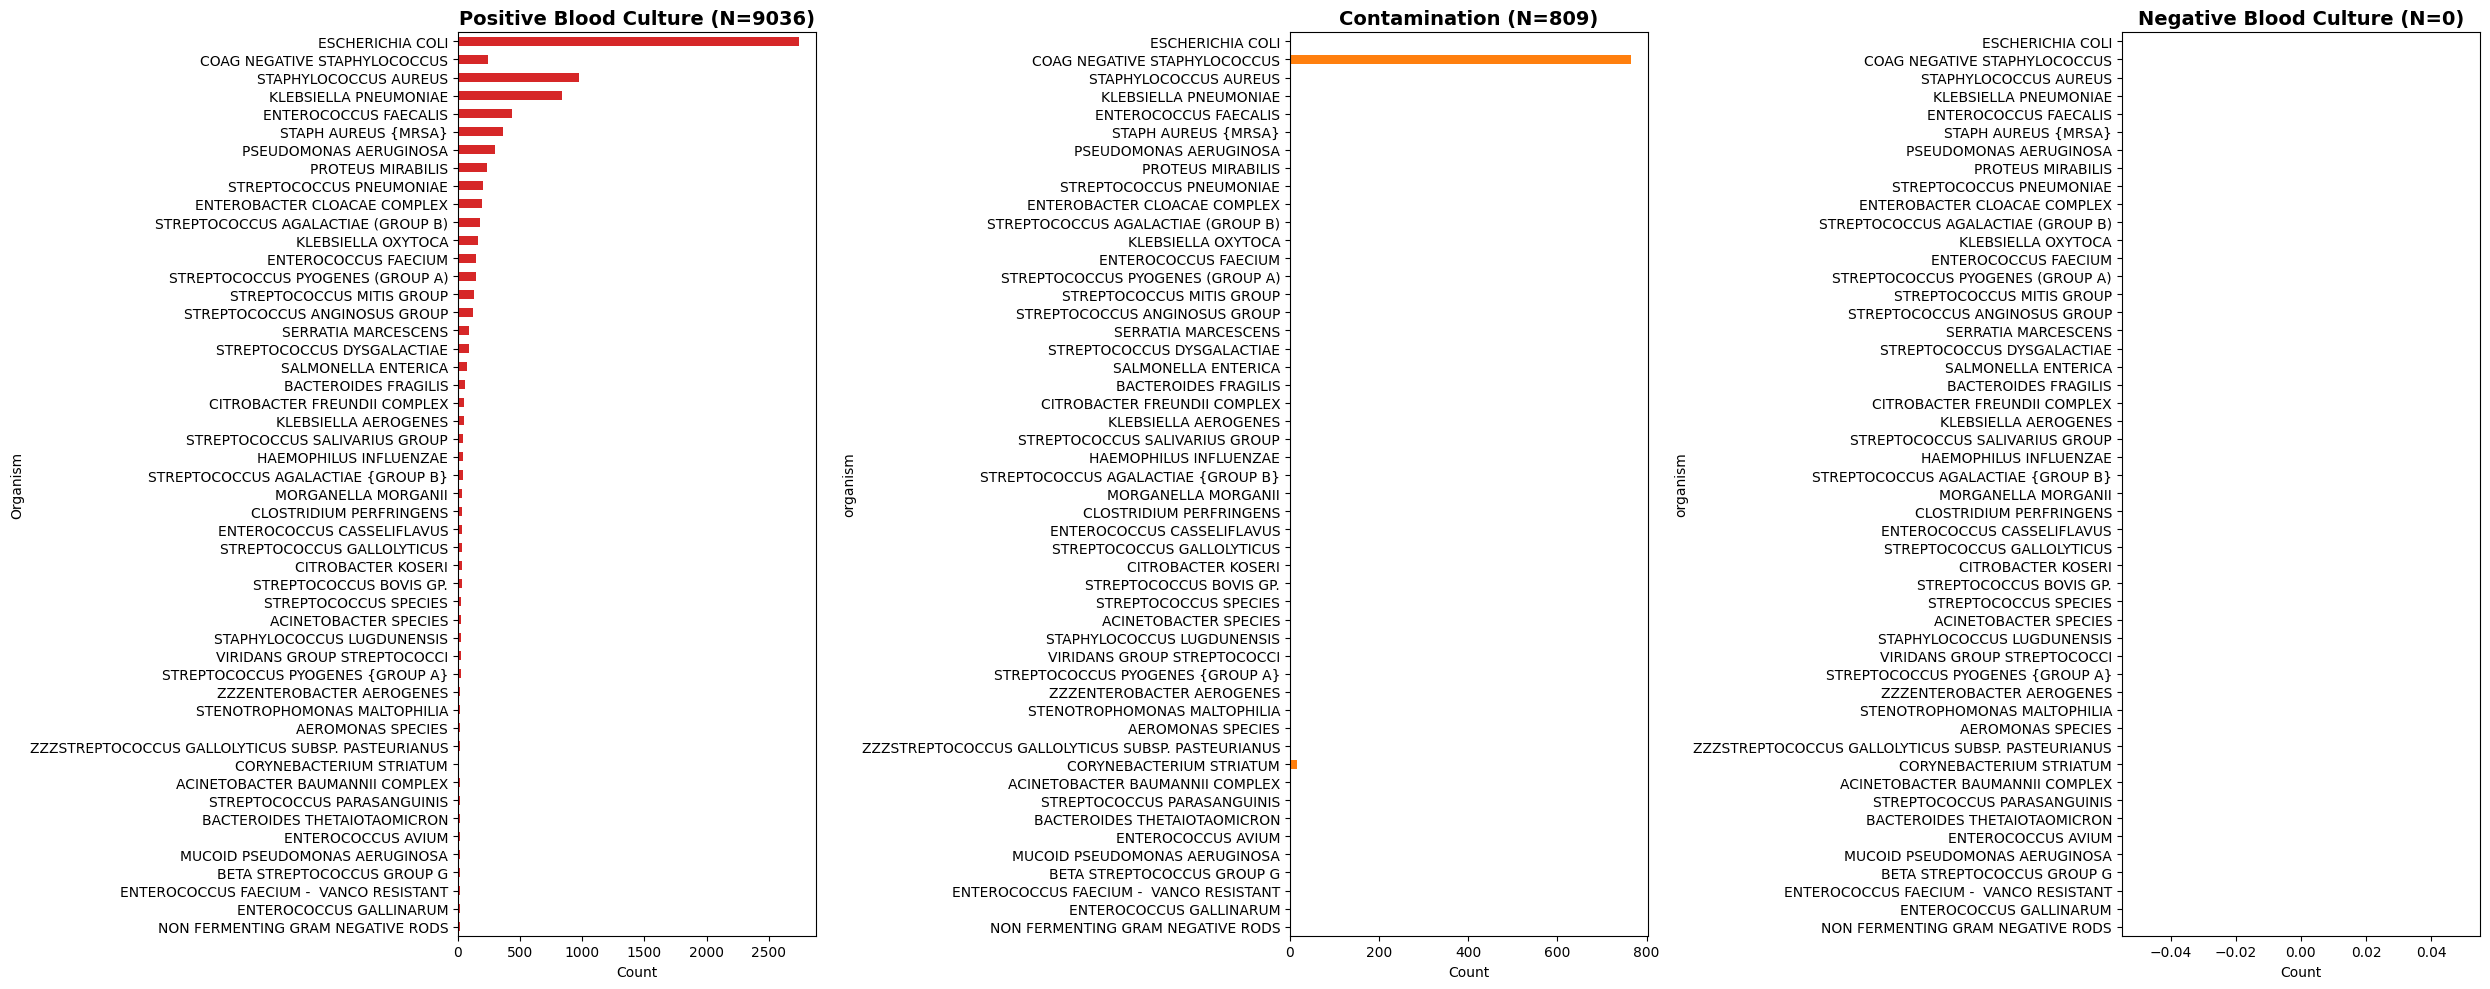

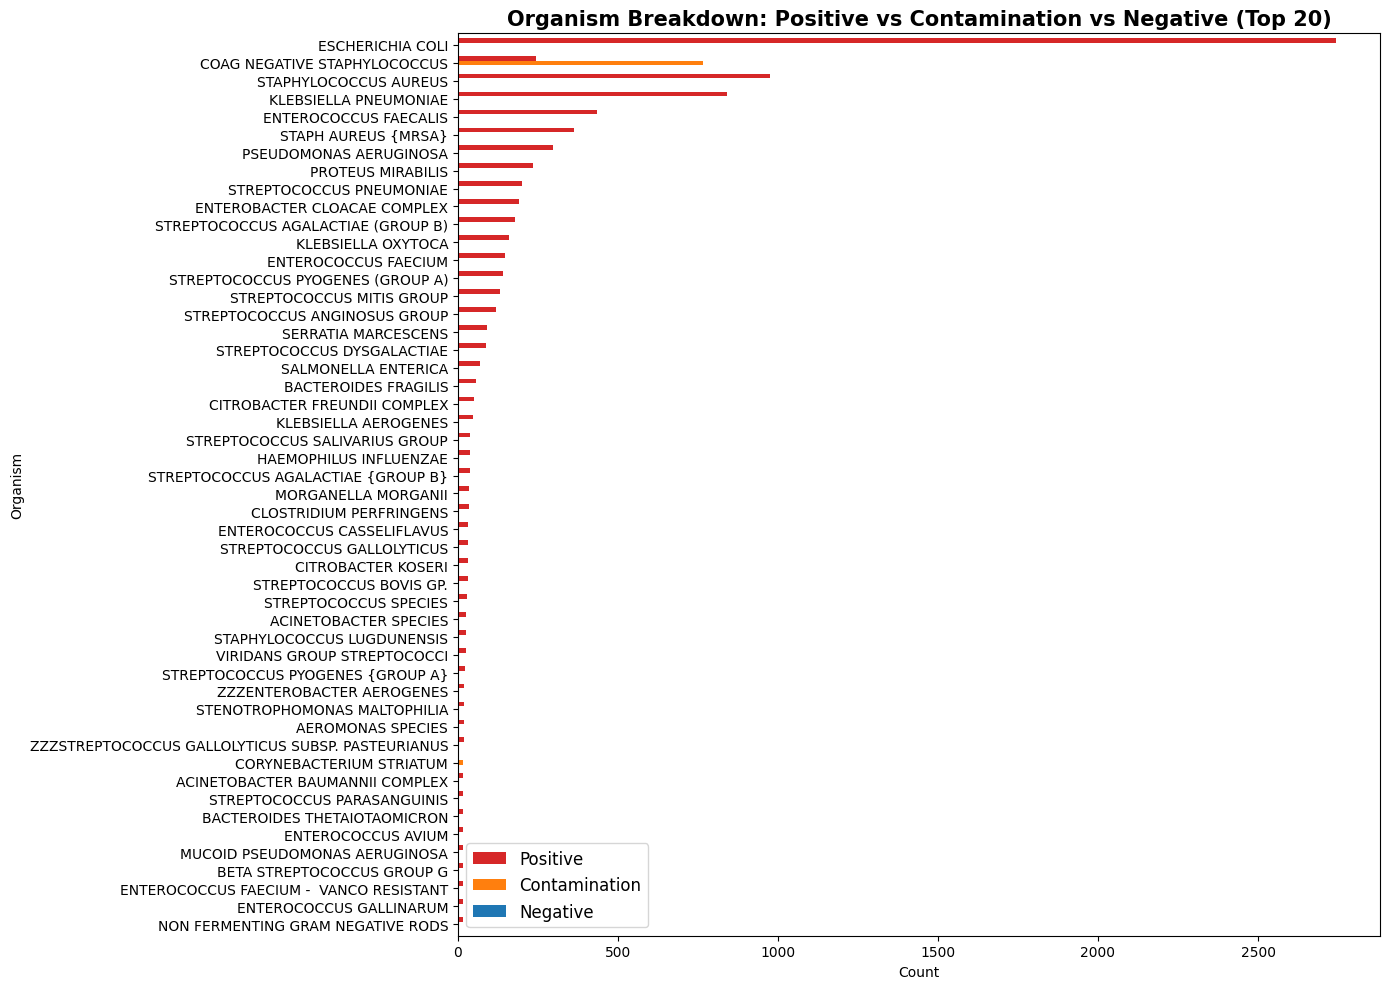


Top 20 Organisms by Culture Label:

                                                   Positive  Contamination  Negative  Total  % Positive  % Contamination  % Negative
organism                                                                                                                            
ESCHERICHIA COLI                                       2744              0         0   2744      100.00             0.00         0.0
COAG NEGATIVE STAPHYLOCOCCUS                            244            765         0   1009       24.18            75.82         0.0
STAPHYLOCOCCUS AUREUS                                   974              0         0    974      100.00             0.00         0.0
KLEBSIELLA PNEUMONIAE                                   841              0         0    841      100.00             0.00         0.0
ENTEROCOCCUS FAECALIS                                   435              0         0    435      100.00             0.00         0.0
STAPH AUREUS {MRSA}             

,Positive,Contamination,Negative,Total,% Positive,% Contamination,% Negative
organism,,,,,,,
ESCHERICHIA COLI,2744,0,0,2744,100.00,0.00,0.0
COAG NEGATIVE STAPHYLOCOCCUS,244,765,0,1009,24.18,75.82,0.0
STAPHYLOCOCCUS AUREUS,974,0,0,974,100.00,0.00,0.0
KLEBSIELLA PNEUMONIAE,841,0,0,841,100.00,0.00,0.0
ENTEROCOCCUS FAECALIS,435,0,0,435,100.00,0.00,0.0
STAPH AUREUS {MRSA},364,0,0,364,100.00,0.00,0.0
PSEUDOMONAS AERUGINOSA,297,0,0,297,100.00,0.00,0.0
PROTEUS MIRABILIS,236,0,0,236,100.00,0.00,0.0
STREPTOCOCCUS PNEUMONIAE,199,0,0,199,100.00,0.00,0.0


In [49]:
# full cohort after exclusion organism break down

# Only keep the columns we need from labeled_df
label_cols = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded', 'final_label', "set_level_label"]
# Define the key columns
keys = ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded']

labels_unique =enriched_label_filtered[label_cols]

# Merge
merged = labels_unique.merge(
    culture_sens_df.drop_duplicates(subset=['anon_id', 'order_proc_id_coded', "organism"]),
    on=['anon_id', 'order_proc_id_coded'],
    how='inner'
)
import pandas as pd

# -------------------------------------------------
# 0. Work at encounter level, avoid double-counting
# -------------------------------------------------
encounter_cols = ['anon_id', 'pat_enc_csn_id_coded']

# one row per encounter-organism-final_label
merged_unique = merged.drop_duplicates(
    subset=encounter_cols + ['organism', 'final_label']
).copy()

# -------------------------------------------------
# 1. Define CoNS and mark it
# -------------------------------------------------
def is_cons_org(name):
    if pd.isna(name):
        return False
    # normalize to uppercase and strip spaces just in case
    n = str(name).strip().upper()
    return n == "COAG NEGATIVE STAPHYLOCOCCUS"

merged_unique['is_cons'] = merged_unique['organism'].apply(is_cons_org)

# -------------------------------------------------
# 2. For each encounter, check if any non-CoNS grew
# -------------------------------------------------
grp = merged_unique.groupby(encounter_cols)

# True if encounter has at least one non-CoNS organism
merged_unique['enc_has_non_cons'] = grp['is_cons'].transform(lambda s: (~s).any())

# (optional) True if encounter has only CoNS
merged_unique['enc_has_only_cons'] = grp['is_cons'].transform(lambda s: s.all())

# -------------------------------------------------
# 3. Drop CoNS rows in mixed positive encounters
#    (positive + multiple orgs where CoNS is just one)
# -------------------------------------------------
mask_drop_cons_in_mixed_positive = (
    (merged_unique['final_label'] == 'positive') &
    (merged_unique['is_cons']) &
    (merged_unique['enc_has_non_cons'])
)

organism_prevalence = merged_unique.loc[~mask_drop_cons_in_mixed_positive].copy()
#  -------------------------------------------------
# 1. Split into the 3 groups
# -------------------------------------------------
pos_orgs  = organism_prevalence[organism_prevalence['final_label'] == "positive"]['organism'].value_counts()
cont_orgs = organism_prevalence[organism_prevalence['final_label'] == 'contamination']['organism'].value_counts()
neg_orgs  = organism_prevalence[organism_prevalence['final_label'] == 'negative']['organism'].value_counts()

# -------------------------------------------------
# 2. Get top 20 organisms overall
# -------------------------------------------------
all_organisms = organism_prevalence['organism'].value_counts()
top_organisms = all_organisms.head(50).index.tolist()

# reindex
pos_counts  = pos_orgs.reindex(top_organisms, fill_value=0)
cont_counts = cont_orgs.reindex(top_organisms, fill_value=0)
neg_counts  = neg_orgs.reindex(top_organisms, fill_value=0)

# -------------------------------------------------
# 3. Three-panel subplot: Positive | Contamination | Negative
# -------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# positive plot
pos_counts.plot(kind='barh', ax=axs[0], color='#d62728')
axs[0].set_title(f'Positive Blood Culture (N={pos_orgs.sum()})', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Organism')
axs[0].invert_yaxis()

# contamination plot
cont_counts.plot(kind='barh', ax=axs[1], color='#ff7f0e')
axs[1].set_title(f'Contamination (N={cont_orgs.sum()})', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Count')
axs[1].invert_yaxis()

# negative plot
neg_counts.plot(kind='barh', ax=axs[2], color='#1f77b4')
axs[2].set_title(f'Negative Blood Culture (N={neg_orgs.sum()})', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Count')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4. Grouped bar chart (all 3 classes side-by-side)
# -------------------------------------------------

comparison_df = pd.DataFrame({
    'Positive': pos_counts,
    'Contamination': cont_counts,
    'Negative': neg_counts
})

fig, ax = plt.subplots(figsize=(14, 10))

comparison_df.plot(kind='barh', ax=ax, color=['#d62728', '#ff7f0e', '#1f77b4'], width=0.8)
ax.set_title('Organism Breakdown: Positive vs Contamination vs Negative (Top 20)', fontsize=15, fontweight='bold')
ax.set_xlabel('Count')
ax.set_ylabel('Organism')
ax.invert_yaxis()
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 5. Pretty table summary
# -------------------------------------------------

print("\nTop 20 Organisms by Culture Label:\n")

summary_df = comparison_df.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['% Positive'] = (summary_df['Positive'] / summary_df['Total'] * 100).round(2)
summary_df['% Contamination'] = (summary_df['Contamination'] / summary_df['Total'] * 100).round(2)
summary_df['% Negative'] = (summary_df['Negative'] / summary_df['Total'] * 100).round(2)

summary_df = summary_df.sort_values('Total', ascending=False)

print(summary_df.to_string())
summary_df



# Vitals
## temp, resp, heart rate,  blood pressure, SPO2
### temp: 26.5 - 45 degree C
### resp ranges 0-90(peds), adult: 0-60 
### hr: 250 max
### bp: 250 (sys) /150(dia)
### O2: N/A

#### Temperature

In [50]:
# Read the CSV directly
csv_url = "/Users/sandychen/Downloads/_Temp_ and _Temp (in Celsius)_updated.csv"
df = pd.read_csv(csv_url)
df.rename(columns={'Unnamed: 1': 'label'}, inplace=True)
valid_template = df[df["label"] == "Yes"]

In [ ]:
# # Conservative physiologic range (°C). Adjust if needed.
# TEMP_C_MIN = 26.7
# TEMP_C_MAX = 45.0

# tmpl_list = valid_template["template"].tolist()
# if tmpl_list:
#     template_where = "AND f.template IN (" + ", ".join([f"'{t}'" for t in tmpl_list]) + ")"
# else:
#     template_where = ""  # no filter if list is empty

# query = f"""
# -- Temperature (°C) statistics per blood culture order in [-48h, 0h]
# -- Keeps all base rows; imputes out-of-range temps to 37°C prior to aggregation
# WITH flowsheet_window AS (
#   SELECT
#     c.anon_id,
#     c.pat_enc_csn_id_coded,
#     c.order_proc_id_coded,
#     c.blood_culture_order_datetime_utc,
#     f.recorded_time_jittered_utc AS ts,
#     TRIM(f.row_disp_name) AS row_name,
#     CAST(f.meas_value AS STRING) AS meas_value_str,
#     f.units AS units,
#     f.template
#   FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS c
#   LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.flowsheet` AS f
#     ON c.anon_id = f.anon_id
#    AND TIMESTAMP_DIFF(
#          f.recorded_time_jittered_utc,
#          CAST(c.blood_culture_order_datetime_utc AS TIMESTAMP),
#          HOUR
#        ) BETWEEN -48 AND 0
#     {template_where}
# ),

# labeled AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     ts, row_name, meas_value_str, units, template,
#     CASE
#       WHEN row_name IN (
#         'ECMO Venous Blood Temperature', 'Rectal Temperature', 'Patient Core Temperature',
#         'ECMO Arterial Blood Temperature', 'Temperature', 'Temperature (C)',
#         'Temperature (Blood - PA line)', 'Temp', 'Temp (in Celsius)'
#       ) THEN 'temp'
#       ELSE NULL
#     END AS vital
#   FROM flowsheet_window
#   WHERE row_name IS NOT NULL
# ),

# parsed AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     ts, vital, row_name, meas_value_str, units, template,
#     COALESCE(
#       SAFE_CAST(meas_value_str AS FLOAT64),
#       SAFE_CAST(REGEXP_EXTRACT(meas_value_str, r'-?\\d+(?:\\.\\d+)?') AS FLOAT64)
#     ) AS value_num,
#     CASE
#       WHEN REGEXP_CONTAINS(LOWER(units), r'(?:°|deg|fahrenheit|\\bf\\b)') THEN 'F'
#       WHEN REGEXP_CONTAINS(LOWER(units), r'(?:°|deg|celsius|\\bc\\b)') THEN 'C'
#       ELSE NULL
#     END AS unit_hint
#   FROM labeled
#   WHERE vital = 'temp'
# ),

# -- Canonicalize to °C (raw converted value = temp_c)
# canon AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     ts, template,
#     CASE
#       WHEN COALESCE(
#              unit_hint,
#              CASE WHEN value_num BETWEEN 80 AND 113 THEN 'F'
#                   WHEN value_num BETWEEN 26.7 AND 45 THEN 'C' END
#            ) = 'F' THEN (value_num - 32) * 5/9
#       ELSE value_num
#     END AS temp_c
#   FROM parsed
# ),

# -- Impute out-of-range temps to 37°C; keep diagnostics
# canon_imputed AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     ts, template,
#     temp_c,
#     CASE
#       WHEN temp_c IS NULL THEN NULL
#       WHEN temp_c < {TEMP_C_MIN} OR temp_c > {TEMP_C_MAX} THEN NULL
#       ELSE temp_c
#     END AS temp_c_imp,
#     -- diagnostics
#     CASE
#       WHEN temp_c IS NULL THEN FALSE
#       WHEN temp_c < {TEMP_C_MIN} OR temp_c > {TEMP_C_MAX} THEN TRUE
#       ELSE FALSE
#     END AS was_imputed
#   FROM canon
# ),

# -- Aggregate per order using the imputed value
# temp_agg AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     ARRAY_AGG(DISTINCT template IGNORE NULLS) AS template_list,
#     COUNT(*) AS temp_obs_n,
#     COUNTIF(temp_c IS NOT NULL) AS temp_raw_nonnull_n,
#     COUNTIF(was_imputed) AS temp_imputed_n,
#     MIN(temp_c_imp) AS temp_min_c,
#     AVG(temp_c_imp) AS temp_avg_c,
#     MAX(temp_c_imp) AS temp_max_c,
#     APPROX_QUANTILES(temp_c_imp, 100)[OFFSET(50)] AS temp_median_c
#   FROM canon_imputed
#   GROUP BY 1,2,3,4
# ),

# -- Mode (0.1°C bins) using imputed values
# temp_hist AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     CAST(ROUND(temp_c_imp, 1) AS FLOAT64) AS val, COUNT(*) AS cnt
#   FROM canon_imputed
#   WHERE temp_c_imp IS NOT NULL
#   GROUP BY 1,2,3,4,5
# ),

# temp_mode AS (
#   SELECT
#     anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
#     val AS temp_mode_c
#   FROM (
#     SELECT t.*,
#            ROW_NUMBER() OVER (
#              PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
#              ORDER BY cnt DESC, val ASC
#            ) AS rn
#     FROM temp_hist t
#   )
#   WHERE rn = 1
# )

# SELECT
#   b.anon_id,
#   b.pat_enc_csn_id_coded,
#   b.order_proc_id_coded,
#   b.blood_culture_order_datetime_utc,
#   a.template_list,
#   a.temp_obs_n,
#   a.temp_raw_nonnull_n,
#   a.temp_imputed_n,
#   a.temp_min_c,
#   a.temp_avg_c,
#   a.temp_max_c,
#   a.temp_median_c,
#   m.temp_mode_c
# FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS b
# LEFT JOIN temp_agg a
#   USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
# LEFT JOIN temp_mode m
#   USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
# ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
# """
# final_base_temp_only = client.query(query).to_dataframe()


In [ ]:
# Conservative physiologic range (°C). Adjust if needed.
TEMP_C_MIN = 26.7
TEMP_C_MAX = 45.0

tmpl_list = valid_template["template"].tolist()
if tmpl_list:
    template_where = "AND f.template IN (" + ", ".join([f"'{t}'" for t in tmpl_list]) + ")"
else:
    template_where = ""  # no filter if list is empty

query_temp_with_delta = f"""
-- Temperature (°C) statistics per blood culture order in [-48h, 0h]
-- Adds 6h change features: temp_delta_6h and temp_slope_6h_c_per_hr
WITH flowsheet_window AS (
  SELECT
    c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
    c.blood_culture_order_datetime_utc,
    f.recorded_time_jittered_utc AS ts,
    TRIM(f.row_disp_name) AS row_name,
    CAST(f.meas_value AS STRING) AS meas_value_str,
    f.units AS units,
    f.template
  FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS c
  LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.flowsheet` AS f
    ON c.anon_id = f.anon_id
   AND TIMESTAMP_DIFF(
         f.recorded_time_jittered_utc,
         CAST(c.blood_culture_order_datetime_utc AS TIMESTAMP),
         HOUR
       ) BETWEEN -48 AND 0
    {template_where}
),

labeled AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, row_name, meas_value_str, units, template,
    CASE
      WHEN row_name IN (
        'ECMO Venous Blood Temperature', 'Rectal Temperature', 'Patient Core Temperature',
        'ECMO Arterial Blood Temperature', 'Temperature', 'Temperature (C)',
        'Temperature (Blood - PA line)', 'Temp', 'Temp (in Celsius)'
      ) THEN 'temp'
      ELSE NULL
    END AS vital
  FROM flowsheet_window
  WHERE row_name IS NOT NULL
),

parsed AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, vital, row_name, meas_value_str, units, template,
    COALESCE(
      SAFE_CAST(meas_value_str AS FLOAT64),
      SAFE_CAST(REGEXP_EXTRACT(meas_value_str, r'-?\\d+(?:\\.\\d+)?') AS FLOAT64)
    ) AS value_num,
    CASE
      WHEN REGEXP_CONTAINS(LOWER(units), r'(?:°|deg|fahrenheit|\\bf\\b)') THEN 'F'
      WHEN REGEXP_CONTAINS(LOWER(units), r'(?:°|deg|celsius|\\bc\\b)') THEN 'C'
      ELSE NULL
    END AS unit_hint
  FROM labeled
  WHERE vital = 'temp'
),

-- Canonicalize to °C (raw converted value = temp_c)
canon AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, template,
    CASE
      WHEN COALESCE(
             unit_hint,
             CASE WHEN value_num BETWEEN 80 AND 113 THEN 'F'
                  WHEN value_num BETWEEN 26.7 AND 45 THEN 'C' END
           ) = 'F' THEN (value_num - 32) * 5/9
      ELSE value_num
    END AS temp_c
  FROM parsed
),

-- Keep only physiologic range; null out-of-range
canon_imputed AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, template,
    temp_c,
    CASE
      WHEN temp_c IS NULL THEN NULL
      WHEN temp_c < {TEMP_C_MIN} OR temp_c > {TEMP_C_MAX} THEN NULL
      ELSE temp_c
    END AS temp_c_imp,
    CASE
      WHEN temp_c IS NULL THEN FALSE
      WHEN temp_c < {TEMP_C_MIN} OR temp_c > {TEMP_C_MAX} THEN TRUE
      ELSE FALSE
    END AS was_imputed
  FROM canon
),

-- Aggregate per order over [-48h,0h]
temp_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ARRAY_AGG(DISTINCT template IGNORE NULLS) AS template_list,
    COUNT(*) AS temp_obs_n,
    COUNTIF(temp_c IS NOT NULL) AS temp_raw_nonnull_n,
    COUNTIF(was_imputed) AS temp_imputed_n,
    MIN(temp_c_imp) AS temp_min_c,
    AVG(temp_c_imp) AS temp_avg_c,
    MAX(temp_c_imp) AS temp_max_c,
    APPROX_QUANTILES(temp_c_imp, 100)[OFFSET(50)] AS temp_median_c
  FROM canon_imputed
  GROUP BY 1,2,3,4
),

-- Mode (0.1°C bins) over [-48h,0h]
temp_hist AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    CAST(ROUND(temp_c_imp, 1) AS FLOAT64) AS val, COUNT(*) AS cnt
  FROM canon_imputed
  WHERE temp_c_imp IS NOT NULL
  GROUP BY 1,2,3,4,5
),

temp_mode AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    val AS temp_mode_c
  FROM (
    SELECT t.*,
           ROW_NUMBER() OVER (
             PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
             ORDER BY cnt DESC, val ASC
           ) AS rn
    FROM temp_hist t
  )
  WHERE rn = 1
),

-- 6-hour window [-6h,0h] features from valid temps  (FIXED ARRAY_AGG syntax)
temp_last6 AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    -- earliest and latest temps (and their timestamps) within last 6h
    ARRAY_AGG(temp_c_imp IGNORE NULLS ORDER BY ts ASC)[OFFSET(0)]  AS temp_6h_first,
    ARRAY_AGG(temp_c_imp IGNORE NULLS ORDER BY ts DESC)[OFFSET(0)] AS temp_6h_last,
    ARRAY_AGG(ts         IGNORE NULLS ORDER BY ts ASC)[OFFSET(0)]  AS ts_6h_first,
    ARRAY_AGG(ts         IGNORE NULLS ORDER BY ts DESC)[OFFSET(0)] AS ts_6h_last
  FROM canon_imputed
  WHERE temp_c_imp IS NOT NULL
    AND TIMESTAMP_DIFF(
          ts, CAST(blood_culture_order_datetime_utc AS TIMESTAMP), HOUR
        ) BETWEEN -6 AND 0
  GROUP BY 1,2,3,4
),

temp_change AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    temp_6h_first,
    temp_6h_last,
    -- minutes span, then hours
    TIMESTAMP_DIFF(ts_6h_last, ts_6h_first, MINUTE) AS minutes_span_6h,
    SAFE_DIVIDE(TIMESTAMP_DIFF(ts_6h_last, ts_6h_first, MINUTE), 60.0) AS hours_span_6h,
    -- delta and slope (°C/hr)
    (temp_6h_last - temp_6h_first) AS temp_delta_6h,
    SAFE_DIVIDE(
      (temp_6h_last - temp_6h_first),
      SAFE_DIVIDE(TIMESTAMP_DIFF(ts_6h_last, ts_6h_first, MINUTE), 60.0)
    ) AS temp_slope_6h_c_per_hr
  FROM temp_last6
)


SELECT
  b.anon_id,
  b.pat_enc_csn_id_coded,
  b.order_proc_id_coded,
  b.blood_culture_order_datetime_utc,
  a.template_list,
  a.temp_obs_n,
  a.temp_raw_nonnull_n,
  a.temp_imputed_n,
  a.temp_min_c,
  a.temp_avg_c,
  a.temp_max_c,
  a.temp_median_c,
  m.temp_mode_c,
  -- NEW:
  c.temp_6h_first,
  c.temp_6h_last,
  c.minutes_span_6h,
  c.hours_span_6h,
  c.temp_delta_6h,
  c.temp_slope_6h_c_per_hr
FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS b
LEFT JOIN temp_agg  a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN temp_mode m USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN temp_change c USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_temp_with_delta = client.query(query_temp_with_delta).to_dataframe()


In [102]:
final_base_temp_with_delta

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,template_list,temp_obs_n,temp_raw_nonnull_n,temp_imputed_n,temp_min_c,temp_avg_c,temp_max_c,temp_median_c,temp_mode_c,temp_6h_first,temp_6h_last,minutes_span_6h,hours_span_6h,temp_delta_6h,temp_slope_6h_c_per_hr
0,JC1000129,131354606122,876959986,2023-04-23 22:44:00+00:00,[ED Tech Vitals],1,1,0,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,0,0.000000,0.000000,NaN
1,JC1000159,131233687107,528085198,2017-06-25 16:42:00+00:00,[Vitals],2,2,0,37.500000,38.055556,38.611111,37.500000,37.5,37.500000,38.611111,61,1.016667,1.111111,1.092896
2,JC1000413,131018846539,401262600,2012-04-20 05:09:00+00:00,[Vitals],1,1,0,36.444444,36.444444,36.444444,36.444444,36.4,36.444444,36.444444,0,0.000000,0.000000,NaN
3,JC1000492,131356383252,883656152,2023-07-11 00:58:00+00:00,"[IIC VS, ED Tech Vitals]",2,2,0,36.333333,36.555556,36.777778,36.333333,36.3,36.777778,36.333333,244,4.066667,-0.444444,-0.109290
4,JC1000588,131374847678,949836082,2024-03-02 02:18:00+00:00,[Vitals],2,2,0,37.111111,37.222222,37.333333,37.111111,37.1,37.111111,37.333333,210,3.500000,0.222222,0.063492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101807,JC999537,131375456231,951976563,2024-05-06 05:42:00+00:00,[ED Tech Vitals],1,1,0,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,0,0.000000,0.000000,NaN
101808,JC999590,131022787414,414242626,2013-02-03 23:49:00+00:00,[Vitals],4,4,0,37.388889,38.763889,39.388889,38.888889,39.4,37.388889,38.888889,137,2.283333,1.500000,0.656934
101809,JC999636,131263269943,592485132,2019-02-24 07:31:00+00:00,[Vitals],2,2,0,36.888889,37.055556,37.222222,36.888889,36.9,37.222222,36.888889,39,0.650000,-0.333333,-0.512821
101810,JC999695,131029726519,434470925,2014-01-27 18:45:00+00:00,[Vitals],1,1,0,37.500000,37.500000,37.500000,37.500000,37.5,37.500000,37.500000,0,0.000000,0.000000,NaN


#### resp

In [52]:
RESP_MIN = 0
RESP_MAX = 90

query_resp = f"""
WITH flowsheet_window AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    f.recorded_time_jittered_utc AS ts,
    TRIM(f.row_disp_name) AS row_name,
    CAST(f.meas_value AS STRING) AS meas_value_str,
    f.units AS units
  FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS c
  LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.flowsheet` AS f
    ON c.anon_id = f.anon_id
   AND TIMESTAMP_DIFF(f.recorded_time_jittered_utc, CAST(c.blood_culture_order_datetime_utc AS TIMESTAMP), HOUR)
       BETWEEN -48 AND 0
),

labeled AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, row_name, meas_value_str, units,
    CASE
      WHEN UPPER(TRIM(row_name)) IN ('RESP', 'RESP RATE')
      or TRIM(row_name) = '(Retired) Resp Rate Total'
      THEN 'resp' ELSE NULL
    END AS vital
  FROM flowsheet_window
  WHERE row_name IS NOT NULL
),

parsed AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts,
    COALESCE(
      SAFE_CAST(meas_value_str AS FLOAT64),
      SAFE_CAST(REGEXP_EXTRACT(meas_value_str, r'-?\\d+(?:\\.\\d+)?') AS FLOAT64)
    ) AS resp_val
  FROM labeled
  WHERE vital = 'resp'
),

canon AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts,
    CASE
      WHEN resp_val IS NULL THEN NULL
      WHEN resp_val < {RESP_MIN} OR resp_val > {RESP_MAX} THEN NULL
      ELSE resp_val
    END AS resp_ok
  FROM parsed
),

resp_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    COUNT(*) AS resp_obs_n,
    COUNTIF(resp_ok IS NOT NULL) AS resp_nonnull_n,
    MIN(resp_ok) AS resp_min,
    AVG(resp_ok) AS resp_avg,
    MAX(resp_ok) AS resp_max,
    APPROX_QUANTILES(resp_ok, 100)[OFFSET(50)] AS resp_median
  FROM canon
  GROUP BY 1,2,3,4
),

resp_hist AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    CAST(ROUND(resp_ok, 0) AS FLOAT64) AS val, COUNT(*) AS cnt
  FROM canon
  WHERE resp_ok IS NOT NULL
  GROUP BY 1,2,3,4,5
),

resp_mode AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, val AS resp_mode
  FROM (
    SELECT t.*,
           ROW_NUMBER() OVER (
             PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
             ORDER BY cnt DESC, val ASC
           ) rn
    FROM resp_hist t
  ) WHERE rn = 1
)

SELECT
  b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
  a.resp_obs_n, a.resp_nonnull_n,
  a.resp_min, a.resp_avg, a.resp_max, a.resp_median,
  m.resp_mode
FROM `{table_id_analyse_cohort_withfinal_label_adult}` b
LEFT JOIN resp_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN resp_mode m USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_resp_only = client.query(query_resp).to_dataframe()


#### heart rate

In [53]:
# --- Heart Rate extraction/aggregation in [-48h, 0h] w.r.t. blood culture order ---

# Conservative HR bounds (bpm). Tweak as needed (e.g., peds vs adults).
HR_MIN = 0
HR_MAX = 250

# Optional: match your temperature query’s template filter
# tmpl_list = valid_template["template"].tolist() if "valid_template" in globals() else []

# if tmpl_list:
#     template_where_hr = "AND f.template IN (" + ", ".join([f"'{t}'" for t in tmpl_list]) + ")"
# else:
#     template_where_hr = ""  # no filter if list is empty or unavailable

template_where_hr = ""
query_hr = f"""
WITH flowsheet_window AS (
  SELECT
    c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
    c.blood_culture_order_datetime_utc,
    f.recorded_time_jittered_utc AS ts,
    TRIM(f.row_disp_name) AS row_name,
    CAST(f.meas_value AS STRING) AS meas_value_str,
    f.units AS units,
    f.template
  FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS c
  LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.flowsheet` AS f
    ON c.anon_id = f.anon_id
   AND TIMESTAMP_DIFF(
         f.recorded_time_jittered_utc,
         CAST(c.blood_culture_order_datetime_utc AS TIMESTAMP),
         HOUR
       ) BETWEEN -48 AND 0
    {template_where_hr}
),

labeled AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, row_name, meas_value_str, units, template,
    CASE
      -- Common HR labels (feel free to expand)
      WHEN UPPER(TRIM(row_name)) IN ('HEART RATE','PULSE')
      THEN 'heart_rate'
      ELSE NULL
    END AS vital
  FROM flowsheet_window
  WHERE row_name IS NOT NULL
),

parsed AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts, template,
    COALESCE(
      SAFE_CAST(meas_value_str AS FLOAT64),
      SAFE_CAST(REGEXP_EXTRACT(meas_value_str, r'-?\\d+(?:\\.\\d+)?') AS FLOAT64)
    ) AS hr_val
  FROM labeled
  WHERE vital = 'heart_rate'
),

canon AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts, template,
    CASE
      WHEN hr_val IS NULL THEN NULL
      WHEN hr_val < {HR_MIN} OR hr_val > {HR_MAX} THEN NULL
      ELSE hr_val
    END AS hr_ok
  FROM parsed
),

hr_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ARRAY_AGG(DISTINCT template IGNORE NULLS) AS template_list,
    COUNT(*) AS hr_obs_n,
    COUNTIF(hr_ok IS NOT NULL) AS hr_nonnull_n,
    MIN(hr_ok) AS hr_min,
    AVG(hr_ok) AS hr_avg,
    MAX(hr_ok) AS hr_max,
    APPROX_QUANTILES(hr_ok, 100)[OFFSET(50)] AS hr_median
  FROM canon
  GROUP BY 1,2,3,4
),

hr_hist AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    CAST(ROUND(hr_ok, 0) AS FLOAT64) AS val, COUNT(*) AS cnt
  FROM canon
  WHERE hr_ok IS NOT NULL
  GROUP BY 1,2,3,4,5
),

hr_mode AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    val AS hr_mode
  FROM (
    SELECT t.*,
           ROW_NUMBER() OVER (
             PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
             ORDER BY cnt DESC, val ASC
           ) AS rn
    FROM hr_hist t
  )
  WHERE rn = 1
)

SELECT
  b.anon_id,
  b.pat_enc_csn_id_coded,
  b.order_proc_id_coded,
  b.blood_culture_order_datetime_utc,
  a.template_list,
  a.hr_obs_n,
  a.hr_nonnull_n,
  a.hr_min,
  a.hr_avg,
  a.hr_max,
  a.hr_median,
  m.hr_mode
FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS b
LEFT JOIN hr_agg a
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN hr_mode m
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""

final_base_hr_only = client.query(query_hr).to_dataframe()


#### bp

In [54]:
# --- Blood Pressure extraction/aggregation in [-48h, 0h] w.r.t. blood culture order ---

BP_SYS_MAX = 250
BP_DIA_MAX = 150

# # Optional template filter (match your temp query behavior)
# tmpl_list = valid_template["template"].tolist() if "valid_template" in globals() else []
# if tmpl_list:
#     template_where_bp = "AND f.template IN (" + ", ".join([f"'{t}'" for t in tmpl_list]) + ")"
# else:
#     template_where_bp = ""  # no filter if list is empty or unavailable

template_where_bp = ""
query_bp = f"""
WITH flowsheet_window AS (
  SELECT
    c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
    c.blood_culture_order_datetime_utc,
    f.recorded_time_jittered_utc AS ts,
    TRIM(f.row_disp_name) AS row_name,
    CAST(f.meas_value AS STRING) AS meas_value_str,
    f.units AS units,
    f.template
  FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS c
  LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.flowsheet` AS f
    ON c.anon_id = f.anon_id
   AND TIMESTAMP_DIFF(
         f.recorded_time_jittered_utc,
         CAST(c.blood_culture_order_datetime_utc AS TIMESTAMP),
         HOUR
       ) BETWEEN -48 AND 0
    {template_where_bp}
),

labeled AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, row_name, meas_value_str, units, template,
    CASE
      WHEN UPPER(TRIM(row_name)) IN ('BP','NIBP') THEN 'blood_pressure'
      ELSE NULL
    END AS vital
  FROM flowsheet_window
  WHERE row_name IS NOT NULL
),

-- Parse systolic/diastolic from strings like "120/70"; strip noise first
parsed AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts, template,
    SAFE_CAST(SPLIT(REGEXP_REPLACE(meas_value_str, r'[^0-9/]', ''), '/')[SAFE_OFFSET(0)] AS FLOAT64) AS sys_val,
    SAFE_CAST(SPLIT(REGEXP_REPLACE(meas_value_str, r'[^0-9/]', ''), '/')[SAFE_OFFSET(1)] AS FLOAT64) AS dia_val
  FROM labeled
  WHERE vital = 'blood_pressure'
),

-- Apply upper cutoffs only (per your spec). Values above cutoff become NULL.
canon AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts, template,
    CASE
      WHEN sys_val IS NULL THEN NULL
      WHEN sys_val <= {BP_SYS_MAX} THEN sys_val
      ELSE NULL
    END AS bp_sys_ok,
    CASE
      WHEN dia_val IS NULL THEN NULL
      WHEN dia_val <= {BP_DIA_MAX} THEN dia_val
      ELSE NULL
    END AS bp_dia_ok
  FROM parsed
),

bp_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ARRAY_AGG(DISTINCT template IGNORE NULLS) AS template_list,
    COUNT(*) AS bp_obs_n,
    COUNTIF(bp_sys_ok IS NOT NULL) AS sys_nonnull_n,
    COUNTIF(bp_dia_ok IS NOT NULL) AS dia_nonnull_n,
    MIN(bp_sys_ok) AS sysbp_min,
    AVG(bp_sys_ok) AS sysbp_avg,
    MAX(bp_sys_ok) AS sysbp_max,
    APPROX_QUANTILES(bp_sys_ok, 100)[OFFSET(50)] AS sysbp_median,
    MIN(bp_dia_ok) AS diabp_min,
    AVG(bp_dia_ok) AS diabp_avg,
    MAX(bp_dia_ok) AS diabp_max,
    APPROX_QUANTILES(bp_dia_ok, 100)[OFFSET(50)] AS diabp_median
  FROM canon
  GROUP BY 1,2,3,4
),

-- Modes (integer bins)
bp_sys_hist AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    CAST(ROUND(bp_sys_ok, 0) AS FLOAT64) AS val, COUNT(*) AS cnt
  FROM canon
  WHERE bp_sys_ok IS NOT NULL
  GROUP BY 1,2,3,4,5
),
bp_dia_hist AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    CAST(ROUND(bp_dia_ok, 0) AS FLOAT64) AS val, COUNT(*) AS cnt
  FROM canon
  WHERE bp_dia_ok IS NOT NULL
  GROUP BY 1,2,3,4,5
),
bp_sys_mode AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    val AS sysbp_mode
  FROM (
    SELECT t.*,
           ROW_NUMBER() OVER (
             PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
             ORDER BY cnt DESC, val ASC
           ) AS rn
    FROM bp_sys_hist t
  )
  WHERE rn = 1
),
bp_dia_mode AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    val AS diabp_mode
  FROM (
    SELECT t.*,
           ROW_NUMBER() OVER (
             PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
             ORDER BY cnt DESC, val ASC
           ) AS rn
    FROM bp_dia_hist t
  )
  WHERE rn = 1
)

SELECT
  b.anon_id,
  b.pat_enc_csn_id_coded,
  b.order_proc_id_coded,
  b.blood_culture_order_datetime_utc,
  a.template_list,
  a.bp_obs_n,
  a.sys_nonnull_n, a.dia_nonnull_n,
  a.sysbp_min, a.sysbp_avg, a.sysbp_max, a.sysbp_median,
  sm.sysbp_mode,
  a.diabp_min, a.diabp_avg, a.diabp_max, a.diabp_median,
  dm.diabp_mode
FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS b
LEFT JOIN bp_agg a
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN bp_sys_mode sm
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN bp_dia_mode dm
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""

final_base_bp_only = client.query(query_bp).to_dataframe()


#### spo2

In [55]:
# --- SpO2 extraction/aggregation in [-48h, 0h] w.r.t. blood culture order ---

SPO2_MIN = 0     # percent
SPO2_MAX = 100   # percent

# # Optional: match your temperature query’s template filter
# tmpl_list = valid_template["template"].tolist() if "valid_template" in globals() else []
# if tmpl_list:
#     template_where_spo2 = "AND f.template IN (" + ", ".join([f"'{t}'" for t in tmpl_list]) + ")"
# else:
#     template_where_spo2 = ""  # no filter if list is empty or unavailable
template_where_spo2 = ""

query_spo2 = f"""
WITH flowsheet_window AS (
  SELECT
    c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
    c.blood_culture_order_datetime_utc,
    f.recorded_time_jittered_utc AS ts,
    TRIM(f.row_disp_name) AS row_name,
    CAST(f.meas_value AS STRING) AS meas_value_str,
    f.units AS units,
    f.template
  FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS c
  LEFT JOIN `som-nero-phi-jonc101.shc_core_2024.flowsheet` AS f
    ON c.anon_id = f.anon_id
   AND TIMESTAMP_DIFF(
         f.recorded_time_jittered_utc,
         CAST(c.blood_culture_order_datetime_utc AS TIMESTAMP),
         HOUR
       ) BETWEEN -48 AND 0
    {template_where_spo2}
),

labeled AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ts, row_name, meas_value_str, units, template,
    CASE
      -- Common SpO2 aliases; exclude common non-SpO2 oxygen rows
      WHEN (
        UPPER(TRIM(row_name)) in ('SPO2', 'O2', 'O2 SAT')
      )
      THEN 'spo2'
      ELSE NULL
    END AS vital
  FROM flowsheet_window
  WHERE row_name IS NOT NULL
),

parsed AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts, template,
    -- extract numeric (e.g., "98 %", "96", etc.)
    COALESCE(
      SAFE_CAST(meas_value_str AS FLOAT64),
      SAFE_CAST(REGEXP_EXTRACT(meas_value_str, r'-?\\d+(?:\\.\\d+)?') AS FLOAT64)
    ) AS spo2_val
  FROM labeled
  WHERE vital = 'spo2'
),

canon AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc, ts, template,
    CASE
      WHEN spo2_val IS NULL THEN NULL
      WHEN spo2_val < {SPO2_MIN} OR spo2_val > {SPO2_MAX} THEN NULL
      ELSE spo2_val
    END AS spo2_ok
  FROM parsed
),

spo2_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ARRAY_AGG(DISTINCT template IGNORE NULLS) AS template_list,
    COUNT(*) AS spo2_obs_n,
    COUNTIF(spo2_ok IS NOT NULL) AS spo2_nonnull_n,
    MIN(spo2_ok) AS spo2_min,
    AVG(spo2_ok) AS spo2_avg,
    MAX(spo2_ok) AS spo2_max,
    APPROX_QUANTILES(spo2_ok, 100)[OFFSET(50)] AS spo2_median
  FROM canon
  GROUP BY 1,2,3,4
),

spo2_hist AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    CAST(ROUND(spo2_ok, 0) AS FLOAT64) AS val, COUNT(*) AS cnt
  FROM canon
  WHERE spo2_ok IS NOT NULL
  GROUP BY 1,2,3,4,5
),

spo2_mode AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    val AS spo2_mode
  FROM (
    SELECT t.*,
           ROW_NUMBER() OVER (
             PARTITION BY anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc
             ORDER BY cnt DESC, val ASC
           ) AS rn
    FROM spo2_hist t
  )
  WHERE rn = 1
)

SELECT
  b.anon_id,
  b.pat_enc_csn_id_coded,
  b.order_proc_id_coded,
  b.blood_culture_order_datetime_utc,
  a.template_list,
  a.spo2_obs_n,
  a.spo2_nonnull_n,
  a.spo2_min,
  a.spo2_avg,
  a.spo2_max,
  a.spo2_median,
  m.spo2_mode
FROM `{table_id_analyse_cohort_withfinal_label_adult}` AS b
LEFT JOIN spo2_agg a
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
LEFT JOIN spo2_mode m
  USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""

final_base_spo2_only = client.query(query_spo2).to_dataframe()


### vital concat

In [96]:
final_base_temp_with_delta

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,template_list,temp_obs_n,temp_raw_nonnull_n,temp_imputed_n,temp_min_c,temp_avg_c,temp_max_c,temp_median_c,temp_mode_c,temp_6h_first,temp_6h_last,minutes_span_6h,hours_span_6h,temp_delta_6h,temp_slope_6h_c_per_hr
0,JC1000129,131354606122,876959986,2023-04-23 22:44:00+00:00,[ED Tech Vitals],1,1,0,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,0,0.000000,0.000000,NaN
1,JC1000159,131233687107,528085198,2017-06-25 16:42:00+00:00,[Vitals],2,2,0,37.500000,38.055556,38.611111,37.500000,37.5,37.500000,38.611111,61,1.016667,1.111111,1.092896
2,JC1000413,131018846539,401262600,2012-04-20 05:09:00+00:00,[Vitals],1,1,0,36.444444,36.444444,36.444444,36.444444,36.4,36.444444,36.444444,0,0.000000,0.000000,NaN
3,JC1000492,131356383252,883656152,2023-07-11 00:58:00+00:00,"[IIC VS, ED Tech Vitals]",2,2,0,36.333333,36.555556,36.777778,36.333333,36.3,36.777778,36.333333,244,4.066667,-0.444444,-0.109290
4,JC1000588,131374847678,949836082,2024-03-02 02:18:00+00:00,[Vitals],2,2,0,37.111111,37.222222,37.333333,37.111111,37.1,37.111111,37.333333,210,3.500000,0.222222,0.063492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101807,JC999537,131375456231,951976563,2024-05-06 05:42:00+00:00,[ED Tech Vitals],1,1,0,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,0,0.000000,0.000000,NaN
101808,JC999590,131022787414,414242626,2013-02-03 23:49:00+00:00,[Vitals],4,4,0,37.388889,38.763889,39.388889,38.888889,39.4,37.388889,38.888889,137,2.283333,1.500000,0.656934
101809,JC999636,131263269943,592485132,2019-02-24 07:31:00+00:00,[Vitals],2,2,0,36.888889,37.055556,37.222222,36.888889,36.9,37.222222,36.888889,39,0.650000,-0.333333,-0.512821
101810,JC999695,131029726519,434470925,2014-01-27 18:45:00+00:00,[Vitals],1,1,0,37.500000,37.500000,37.500000,37.500000,37.5,37.500000,37.500000,0,0.000000,0.000000,NaN


In [97]:
import pandas as pd
from functools import reduce

# List of all per-vital DataFrames
dfs = [final_base_temp_with_delta,final_base_resp_only, final_base_hr_only, final_base_bp_only, final_base_spo2_only]

# Merge keys
merge_keys = ["anon_id", "pat_enc_csn_id_coded", "order_proc_id_coded", "blood_culture_order_datetime_utc"]

# Keep only key columns + aggregate metrics (min, max, median, mode)
dfs_clean = [
    df.loc[:, df.columns.str.contains("|".join(merge_keys)) | df.columns.str.contains("(min|max|median|mode|avg|6h)", case=False)]
    for df in dfs
]

# Merge all DataFrames on the same keys
final_base_vitals = reduce(lambda left, right: pd.merge(left, right, on=merge_keys, how="outer"), dfs_clean)


/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/4097540603.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[:, df.columns.str.contains("|".join(merge_keys)) | df.columns.str.contains("(min|max|median|mode|avg|6h)", case=False)]


In [98]:
final_base_vitals

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,temp_min_c,temp_avg_c,temp_max_c,temp_median_c,temp_mode_c,temp_6h_first,temp_6h_last,minutes_span_6h,hours_span_6h,temp_delta_6h,temp_slope_6h_c_per_hr,resp_min,resp_avg,resp_max,resp_median,resp_mode,hr_min,hr_avg,hr_max,hr_median,hr_mode,sysbp_min,sysbp_avg,sysbp_max,sysbp_median,sysbp_mode,diabp_min,diabp_avg,diabp_max,diabp_median,diabp_mode,spo2_min,spo2_avg,spo2_max,spo2_median,spo2_mode
0,JC1000129,131354606122,876959986,2023-04-23 22:44:00+00:00,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,0,0.000000,0.000000,NaN,22.0,26.000000,28.0,28.0,28.0,70.0,74.250000,77.0,74.0,70.0,85.0,106.000000,117.0,116.0,85.0,43.0,50.666667,58.0,51.0,43.0,97.0,98.333333,100.0,98.0,97.0
1,JC1000159,131233687107,528085198,2017-06-25 16:42:00+00:00,37.500000,38.055556,38.611111,37.500000,37.5,37.500000,38.611111,61,1.016667,1.111111,1.092896,24.0,26.000000,28.0,24.0,24.0,95.0,95.000000,95.0,95.0,95.0,161.0,162.000000,163.0,161.0,161.0,66.0,70.500000,75.0,66.0,66.0,92.0,94.000000,96.0,92.0,92.0
2,JC1000413,131018846539,401262600,2012-04-20 05:09:00+00:00,36.444444,36.444444,36.444444,36.444444,36.4,36.444444,36.444444,0,0.000000,0.000000,NaN,18.0,20.000000,22.0,18.0,18.0,91.0,96.500000,102.0,91.0,91.0,128.0,128.000000,128.0,128.0,128.0,70.0,70.000000,70.0,70.0,70.0,97.0,98.000000,99.0,97.0,97.0
3,JC1000492,131356383252,883656152,2023-07-11 00:58:00+00:00,36.333333,36.555556,36.777778,36.333333,36.3,36.777778,36.333333,244,4.066667,-0.444444,-0.109290,17.0,17.666667,18.0,18.0,18.0,58.0,76.857143,112.0,67.0,67.0,120.0,133.500000,148.0,131.0,120.0,49.0,56.500000,69.0,51.0,49.0,98.0,99.000000,100.0,99.0,98.0
4,JC1000588,131374847678,949836082,2024-03-02 02:18:00+00:00,37.111111,37.222222,37.333333,37.111111,37.1,37.111111,37.333333,210,3.500000,0.222222,0.063492,18.0,18.000000,18.0,18.0,18.0,94.0,99.500000,105.0,94.0,94.0,152.0,164.500000,177.0,152.0,152.0,63.0,76.000000,89.0,63.0,63.0,98.0,98.000000,98.0,98.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101807,JC999537,131375456231,951976563,2024-05-06 05:42:00+00:00,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,0,0.000000,0.000000,NaN,11.0,15.400000,18.0,16.0,16.0,59.0,61.733333,66.0,61.0,60.0,124.0,148.916667,164.0,150.0,150.0,70.0,81.583333,107.0,75.0,75.0,97.0,98.733333,100.0,99.0,98.0
101808,JC999590,131022787414,414242626,2013-02-03 23:49:00+00:00,37.388889,38.763889,39.388889,38.888889,39.4,37.388889,38.888889,137,2.283333,1.500000,0.656934,16.0,22.400000,30.0,22.0,16.0,89.0,92.400000,97.0,90.0,90.0,109.0,133.000000,148.0,139.0,109.0,53.0,62.000000,72.0,61.0,53.0,85.0,95.000000,100.0,95.0,95.0
101809,JC999636,131263269943,592485132,2019-02-24 07:31:00+00:00,36.888889,37.055556,37.222222,36.888889,36.9,37.222222,36.888889,39,0.650000,-0.333333,-0.512821,17.0,17.500000,18.0,17.0,17.0,69.0,77.000000,81.0,81.0,81.0,156.0,172.000000,188.0,156.0,156.0,72.0,76.500000,81.0,72.0,72.0,94.0,95.500000,97.0,94.0,94.0
101810,JC999695,131029726519,434470925,2014-01-27 18:45:00+00:00,37.500000,37.500000,37.500000,37.500000,37.5,37.500000,37.500000,0,0.000000,0.000000,NaN,17.0,18.000000,20.0,17.0,17.0,89.0,93.666667,103.0,89.0,89.0,108.0,112.500000,117.0,108.0,108.0,70.0,72.000000,74.0,70.0,70.0,98.0,99.000000,100.0,99.0,98.0


In [99]:
# Upload refactor_base_cohort to BigQuery as a temporary table
table_id_final_base_vitals = f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_vitals_adult_encounter_level"

# Upload the DataFrame to BigQuery
final_base_vitals.to_gbq(
    destination_table=table_id_final_base_vitals,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded final_base_vitals to {table_id_final_base_vitals}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/1450515392.py:5: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  final_base_vitals.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 1817.29it/s]

Uploaded final_base_vitals to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.final_base_vitals_adult_encounter_level


# Complete blood count with differntial CBCd
### WBC, HgB, PLT, ANC, ALC, % Neutrophils, %Lymphocytes, glucose, lactate

#### WBC

In [65]:
query_wbc = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
wbc_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(lr.base_name) = 'wbc' AND LOWER(lr.reference_unit) IN ('thousand/ul','k/ul','10x3/ul','10*3/ul','x10e3/ul')
        THEN SAFE_CAST(lr.ord_value AS FLOAT64)
      WHEN LOWER(lr.base_name) = 'wbc' AND LOWER(lr.reference_unit) IN ('/ul','ul')
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) / 1000
    END AS wbc
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc) , HOUR) BETWEEN -48 AND 0
),
wbc_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(wbc),2) AS min_wbc,
    ROUND(MAX(wbc),2) AS max_wbc,
    ROUND(AVG(wbc),2) AS avg_wbc,
    ROUND(APPROX_QUANTILES(wbc,100)[OFFSET(50)],2) AS median_wbc
  FROM wbc_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_wbc, a.max_wbc, a.avg_wbc, a.median_wbc
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN wbc_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_wbc_only = client.query(query_wbc).to_dataframe()


#### Neutrophils (%)

In [66]:

query_neut = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),

neut_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(TRIM(lr.lab_name)) IN ('neutrophil %')
      THEN SAFE_CAST(lr.ord_value AS FLOAT64)
    END AS neutrophils
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
neut_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(neutrophils),2) AS min_neutrophils,
    ROUND(MAX(neutrophils),2) AS max_neutrophils,
    ROUND(AVG(neutrophils),2) AS avg_neutrophils,
    ROUND(APPROX_QUANTILES(neutrophils,100)[OFFSET(50)],2) AS median_neutrophils
  FROM neut_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_neutrophils, a.max_neutrophils, a.avg_neutrophils, a.median_neutrophils
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN neut_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_neutrophils_only = client.query(query_neut).to_dataframe()


#### ANC

In [67]:
# unit is K/uL
query_anc = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),

neut_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE 
      WHEN trim(lr.base_name) = 'NEUTAB'
      THEN SAFE_CAST(lr.ord_value AS FLOAT64)
    END AS neutrophils
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
neut_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(neutrophils),2) AS min_anc,
    ROUND(MAX(neutrophils),2) AS max_anc,
    ROUND(AVG(neutrophils),2) AS avg_anc,
    ROUND(APPROX_QUANTILES(neutrophils,100)[OFFSET(50)],2) AS median_anc
  FROM neut_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_anc, a.max_anc, a.avg_anc, a.median_anc
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN neut_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_anc_only = client.query(query_anc).to_dataframe()


#### lymphocytes (%)

In [68]:

query_lymph = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
lymph_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN trim(lr.base_name) in ('LYM')
      THEN SAFE_CAST(lr.ord_value AS FLOAT64)
    END AS lymphocytes
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
lymph_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(lymphocytes),2) AS min_lymphocytes,
    ROUND(MAX(lymphocytes),2) AS max_lymphocytes,
    ROUND(AVG(lymphocytes),2) AS avg_lymphocytes,
    ROUND(APPROX_QUANTILES(lymphocytes,100)[OFFSET(50)],2) AS median_lymphocytes
  FROM lymph_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_lymphocytes, a.max_lymphocytes, a.avg_lymphocytes, a.median_lymphocytes
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN lymph_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_lymphocytes_only = client.query(query_lymph).to_dataframe()


#### ALC

In [69]:
# convert unit to k/ul
query_alc = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
lymph_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN trim(lr.base_name) in ('LYMAB') AND  LOWER(trim(lr.reference_unit)) = 'k/ul' THEN SAFE_CAST(lr.ord_value AS FLOAT64)
      WHEN trim(lr.base_name) in ('LYMAB') AND  LOWER(trim(lr.reference_unit)) = 'ul' THEN SAFE_CAST(lr.ord_value AS FLOAT64) / 1000
      WHEN trim(lr.base_name) in ('LYMAB') AND  LOWER(trim(lr.reference_unit)) = 'cells/uL' THEN SAFE_CAST(lr.ord_value AS FLOAT64) / 1000
      WHEN trim(lr.base_name) in ('LYMAB') AND  LOWER(trim(lr.reference_unit)) is null THEN SAFE_CAST(lr.ord_value AS FLOAT64) / 1000
      ELSE NULL
    END AS lymphocytes
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
lymph_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(lymphocytes),2) AS min_alc,
    ROUND(MAX(lymphocytes),2) AS max_alc,
    ROUND(AVG(lymphocytes),2) AS avg_alc,
    ROUND(APPROX_QUANTILES(lymphocytes,100)[OFFSET(50)],2) AS median_alc
  FROM lymph_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_alc, a.max_alc, a.avg_alc, a.median_alc
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN lymph_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_alc_only = client.query(query_alc).to_dataframe()


#### hgb

In [70]:
query_hgb = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
hgb_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(lr.base_name) = 'hgb' AND LOWER(TRIM(lr.reference_unit)) = 'mg/dl' 
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) /1000
      WHEN LOWER(lr.base_name) = 'hgb' AND (LOWER(TRIM(lr.reference_unit)) LIKE '%g/dl%' OR LOWER(TRIM(lr.reference_unit)) LIKE '%gm/dl%')
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) 
    END AS hgb_mgdl
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered,  DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
hgb_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(hgb_mgdl),2) AS min_hgb,
    ROUND(MAX(hgb_mgdl),2) AS max_hgb,
    ROUND(AVG(hgb_mgdl),2) AS avg_hgb,
    ROUND(APPROX_QUANTILES(hgb_mgdl,100)[OFFSET(50)],2) AS median_hgb
  FROM hgb_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_hgb, a.max_hgb, a.avg_hgb, a.median_hgb
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN hgb_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_hgb_only = client.query(query_hgb).to_dataframe()


#### platelets


In [71]:
# unit is k/ul
query_plt = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
plt_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(lr.base_name) = 'plt' AND LOWER(lr.reference_unit) IN ('x10e3/ul','10x3/ul','10*3/ul','k/ul','thousand/ul')
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) 
      WHEN LOWER(lr.base_name) = 'plt' AND LOWER(lr.reference_unit) IN ('/ul','ul')
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) / 1000
    END AS plt_kul
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
plt_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(plt_kul),2) AS min_plt,
    ROUND(MAX(plt_kul),2) AS max_plt,
    ROUND(AVG(plt_kul),2) AS avg_plt,
    ROUND(APPROX_QUANTILES(plt_kul,100)[OFFSET(50)],2) AS median_plt
  FROM plt_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_plt, a.max_plt, a.avg_plt, a.median_plt
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN plt_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_plt_only = client.query(query_plt).to_dataframe()


#### glucose

In [72]:
# unit is mg/dl
query_glucose = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
glu_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE WHEN LOWER(lr.base_name) = 'glu' THEN SAFE_CAST(lr.ord_value AS FLOAT64) END AS glucose
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
glu_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(glucose),2) AS min_glucose,
    ROUND(MAX(glucose),2) AS max_glucose,
    ROUND(AVG(glucose),2) AS avg_glucose,
    ROUND(APPROX_QUANTILES(glucose,100)[OFFSET(50)],2) AS median_glucose
  FROM glu_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_glucose, a.max_glucose, a.avg_glucose, a.median_glucose
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN glu_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_glucose_only = client.query(query_glucose).to_dataframe()


#### lactate


In [73]:
# unit is mmol/l
query_lactate = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
lac_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(lr.base_name) in ('lac', 'lacpoc', 'lacwbl') AND (LOWER(lr.reference_unit) IN ('mmol/l','mmole/l','mmoll') 
        or lr.reference_unit is null)
        THEN SAFE_CAST(lr.ord_value AS FLOAT64)
      WHEN LOWER(lr.base_name) in ('lac', 'lacpoc', 'lacwbl') AND LOWER(lr.reference_unit) IN ('mg/dl')
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) /9.008
    END AS lactate
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
lac_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(lactate),2) AS min_lactate,
    ROUND(MAX(lactate),2) AS max_lactate,
    ROUND(AVG(lactate),2) AS avg_lactate,
    ROUND(APPROX_QUANTILES(lactate,100)[OFFSET(50)],2) AS median_lactate
  FROM lac_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_lactate, a.max_lactate, a.avg_lactate, a.median_lactate
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN lac_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_lactate_only = client.query(query_lactate).to_dataframe()


#### crp

In [76]:
query_crp = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
crp_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(lr.base_name) LIKE '%crp%' AND NOT LOWER(lr.base_name) LIKE '%h%'
           AND LOWER(lr.reference_unit) = 'mg/dl'
        THEN SAFE_CAST(lr.ord_value AS FLOAT64)
      WHEN LOWER(lr.base_name) LIKE '%crp%' AND NOT LOWER(lr.base_name) LIKE '%h%'
           AND LOWER(lr.reference_unit) = 'mg/l'
        THEN SAFE_CAST(lr.ord_value AS FLOAT64) / 10
    END AS crp_mgdl
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
crp_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(crp_mgdl),2) AS min_crp,
    ROUND(MAX(crp_mgdl),2) AS max_crp,
    ROUND(AVG(crp_mgdl),2) AS avg_crp,
    ROUND(APPROX_QUANTILES(crp_mgdl,100)[OFFSET(50)],2) AS median_crp
  FROM crp_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_crp, a.max_crp, a.avg_crp, a.median_crp
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN crp_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_crp_only = client.query(query_crp).to_dataframe()


### concat all the labs

In [79]:
import pandas as pd
from functools import reduce

# List of all per-vital DataFrames
labs_df = [final_base_wbc_only, final_base_neutrophils_only,final_base_anc_only, final_base_lymphocytes_only, final_base_alc_only, final_base_hgb_only, final_base_plt_only, final_base_glucose_only, final_base_lactate_only, final_base_crp_only]

# Merge keys
merge_keys = ["anon_id", "pat_enc_csn_id_coded", "order_proc_id_coded", "blood_culture_order_datetime_utc"]

# Keep only key columns + aggregate metrics (min, max, median, mode)
dfs_clean = [
    df.loc[:, df.columns.str.contains("|".join(merge_keys)) | df.columns.str.contains("(min|max|median|mode|avg)", case=False)]
    for df in labs_df
]

# Merge all DataFrames on the same keys
final_base_labs_without_cpr_or_pct = reduce(lambda left, right: pd.merge(left, right, on=merge_keys, how="outer"), dfs_clean)


/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/543290004.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[:, df.columns.str.contains("|".join(merge_keys)) | df.columns.str.contains("(min|max|median|mode|avg)", case=False)]


In [80]:
final_base_labs_without_cpr_or_pct.describe()

,pat_enc_csn_id_coded,order_proc_id_coded,min_wbc,max_wbc,avg_wbc,median_wbc,min_neutrophils,max_neutrophils,avg_neutrophils,median_neutrophils,min_anc,max_anc,avg_anc,median_anc,min_lymphocytes,max_lymphocytes,avg_lymphocytes,median_lymphocytes,min_alc,max_alc,avg_alc,median_alc,min_hgb,max_hgb,avg_hgb,median_hgb,min_plt,max_plt,avg_plt,median_plt,min_glucose,max_glucose,avg_glucose,median_glucose,min_lactate,max_lactate,avg_lactate,median_lactate,min_crp,max_crp,avg_crp,median_crp
count,101812.0,101812.0,100954.000000,100954.000000,100954.000000,100954.000000,72991.000000,72991.000000,72991.000000,72991.000000,90589.000000,90589.000000,90589.000000,90589.000000,98429.000000,98429.000000,98429.000000,98429.000000,98291.000000,98291.000000,98291.000000,98291.000000,101032.000000,101032.000000,101032.000000,101032.000000,100860.000000,100860.000000,100860.000000,100860.000000,100989.000000,100989.000000,100989.000000,100989.000000,78836.000000,78836.000000,78836.000000,78836.000000,13617.000000,13617.000000,13617.000000,13617.000000
mean,131261467698.371155,692372033.650395,10.852678,11.781034,11.313728,10.938702,75.254894,75.856948,75.558203,75.286964,8.521959,8.821533,8.671350,8.538795,14.141073,14.839536,14.486451,14.174648,1.439347,1.518123,1.478121,1.442798,11.411766,11.930672,11.666451,11.487700,236.932124,250.215834,243.407161,237.874390,124.619602,154.401222,138.608872,132.430275,1.483339,2.028592,1.739749,1.610231,8.715747,8.788992,8.752155,8.717143
std,117165416.932711,191313161.872256,11.532245,12.535263,11.955154,11.653563,12.559990,12.473273,12.437046,12.550484,5.633315,5.843299,5.704507,5.645940,11.911017,12.190578,11.961136,11.919563,6.399744,6.675646,6.523543,6.404444,2.418732,2.344203,2.330091,2.376323,126.784537,132.250283,128.657977,126.953199,50.983502,91.091572,63.092867,61.063832,1.071919,1.902164,1.363219,1.275486,9.076670,9.134203,9.100023,9.077942
min,131012566723.0,380223864.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,31.000000,31.000000,13.000000,0.200000,0.300000,0.300000,0.200000,0.100000,0.100000,0.100000,0.100000
25%,131222571278.0,520561384.0,6.400000,7.000000,6.750000,6.500000,68.200000,68.900000,68.600000,68.200000,4.740000,4.900000,4.840000,4.750000,6.100000,6.600000,6.400000,6.100000,0.620000,0.660000,0.650000,0.620000,9.700000,10.200000,10.000000,9.800000,158.000000,168.000000,163.000000,158.000000,96.000000,106.000000,102.500000,98.000000,0.900000,1.000000,0.980000,0.920000,1.800000,1.800000,1.800000,1.800000
50%,131294856008.0,682928127.5,9.300000,10.000000,9.700000,9.300000,77.400000,78.000000,77.700000,77.400000,7.330000,7.580000,7.470000,7.340000,11.000000,11.700000,11.400000,11.100000,1.040000,1.100000,1.070000,1.050000,11.500000,12.000000,11.795000,11.600000,219.000000,231.000000,225.000000,220.000000,111.000000,126.000000,119.500000,114.000000,1.300000,1.490000,1.420000,1.320000,5.500000,5.600000,5.500000,5.500000
75%,131351484419.0,865089360.25,13.200000,14.300000,13.750000,13.300000,84.600000,85.100000,84.800000,84.600000,11.030000,11.410000,11.210000,11.050000,18.700000,19.600000,19.100000,18.700000,1.630000,1.700000,1.670000,1.630000,13.100000,13.600000,13.300000,13.200000,295.000000,310.000000,302.000000,296.000000,136.000000,167.000000,150.000000,143.000000,1.770000,2.320000,2.000000,1.860000,12.700000,12.900000,12.800000,12.760000
max,131398322480.0,1033262602.0,834.400000,903.000000,868.700000,834.400000,99.300000,99.400000,99.350000,99.300000,199.000000,219.300000,209.150000,199.000000,100.000000,100.000000,100.000000,100.000000,823.340000,823.340000,823.340000,823.340000,25.000000,25.000000,25.000000,25.000000,3466.000000,3466.000000,3466.000000,3466.000000,1136.000000,2146.000000,1214.430000,1188.000000,20.400000,28.200000,21.400000,20.400000,62.870000,62.87

In [81]:

table_id_final_base_labs_without_cpr_or_pct = f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_labs_without_cpr_or_pct_encounter_level_adult"

# Upload the DataFrame to BigQuery
final_base_labs_without_cpr_or_pct.to_gbq(
    destination_table=table_id_final_base_labs_without_cpr_or_pct,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded final_base_labs_without_cpr_or_pct to {table_id_final_base_labs_without_cpr_or_pct}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/4140289666.py:4: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  final_base_labs_without_cpr_or_pct.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 1887.63it/s]

Uploaded final_base_labs_without_cpr_or_pct to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.final_base_labs_without_cpr_or_pct_encounter_level_adult


### LDA

In [82]:
query = f"""
WITH all_LDA AS (
  SELECT anon_id,
         pat_enc_csn_id_coded,
         placement_instant_jittered,
         removal_instant_jittered,
         lda.description,
  FROM `som-nero-phi-jonc101.shc_core_2024.lda` lda
  WHERE description like any ('%picc%','%ETT%','%CVC%', '%ECMO%','%EVD%','%ET%Tube%')
    or lower(description) like any ('%icu%line%','%tunnel%catheter%','%surgical%ur%catheter%','%port%','%dialysis%catheter%')                           
    AND anon_id IN (
      SELECT DISTINCT anon_id
      FROM  {table_id_analyse_cohort_withfinal_label_adult}
    )
    ), 
LDA_pres as (
    select c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
     CASE 
      WHEN l.description LIKE '%EVD%' THEN 'EVD'
      WHEN l.description LIKE '%ET%Tube%' THEN 'ET_Tube'
      WHEN LOWER(l.description) LIKE '%surgical%ur%catheter%' THEN 'Surgical_Urin_Catheter'
      ELSE 'otherline'
    END AS `Line_Presense`
    from all_LDA l 
    inner join  {table_id_analyse_cohort_withfinal_label_adult} c using (anon_id,pat_enc_csn_id_coded)
    WHERE TIMESTAMP_DIFF(l.removal_instant_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) >0
    and TIMESTAMP_DIFF(l.placement_instant_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) < 0
)

SELECT c.anon_id,
    c.pat_enc_csn_id_coded,
    c.order_proc_id_coded,
    c.blood_culture_order_datetime_utc,
    # c.positive_blood_culture,
    IF(COUNT(lda.Line_Presense) > 0, 1, 0) as has_any_line
FROM {table_id_analyse_cohort_withfinal_label_adult} c 
LEFT JOIN LDA_pres lda USING(anon_id, pat_enc_csn_id_coded, order_proc_id_coded)
GROUP BY ALL
"""

final_base_lda = client.query(query).to_dataframe()


## merge labs and lda

In [83]:
# Merge all three tables: labs, UA, and LDA
# All tables share the same merge keys
merge_keys = ["anon_id", "pat_enc_csn_id_coded", "order_proc_id_coded", "blood_culture_order_datetime_utc"]



# Then merge the result with LDA
final_labs_lda = pd.merge(
    final_base_labs_without_cpr_or_pct, 
    final_base_lda, 
    on=merge_keys, 
    how='outer'
)

print(f"Final merged table shape: {final_labs_lda.shape}")
print(f"Columns: {list(final_labs_lda.columns)}")


Final merged table shape: (101812, 45)
Columns: ['anon_id', 'pat_enc_csn_id_coded', 'order_proc_id_coded', 'blood_culture_order_datetime_utc', 'min_wbc', 'max_wbc', 'avg_wbc', 'median_wbc', 'min_neutrophils', 'max_neutrophils', 'avg_neutrophils', 'median_neutrophils', 'min_anc', 'max_anc', 'avg_anc', 'median_anc', 'min_lymphocytes', 'max_lymphocytes', 'avg_lymphocytes', 'median_lymphocytes', 'min_alc', 'max_alc', 'avg_alc', 'median_alc', 'min_hgb', 'max_hgb', 'avg_hgb', 'median_hgb', 'min_plt', 'max_plt', 'avg_plt', 'median_plt', 'min_glucose', 'max_glucose', 'avg_glucose', 'median_glucose', 'min_lactate', 'max_lactate', 'avg_lactate', 'median_lactate', 'min_crp', 'max_crp', 'avg_crp', 'median_crp', 'has_any_line']


In [84]:
table_id_final_labs_ua_lda = f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_labs_without_cpr_or_pct_lda_encouter_level_adult"

# Upload the DataFrame to BigQuery
final_labs_lda.to_gbq(
    destination_table=table_id_final_labs_ua_lda,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded final_labs_lda to {table_id_final_labs_ua_lda}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/2986423509.py:4: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  final_labs_lda.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 3134.76it/s]

Uploaded final_labs_lda to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.final_base_labs_without_cpr_or_pct_lda_encouter_level_adult




#### the final labs_lda table is stored at som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.final_base_labs_withoutfinal_base_labs_without_cpr_or_pct_lda_encouter_level_adult_cpr_or_pct_ua_lda

In [85]:
query_cr = f"""
WITH all_lab_result AS (
  SELECT anon_id, pat_enc_csn_id_coded, lab_name, base_name, ord_value, reference_unit, order_time_jittered
  FROM `som-nero-phi-jonc101.shc_core_2024.lab_result`
  WHERE anon_id IN (SELECT DISTINCT anon_id FROM {table_id_analyse_cohort_withfinal_label_adult})
),
cr_raw AS (
  SELECT
    c.anon_id, c.pat_enc_csn_id_coded, c.order_proc_id_coded, c.blood_culture_order_datetime_utc,
    CASE
      WHEN LOWER(lr.base_name) = 'cr' AND LOWER(lr.reference_unit) = 'mg/dl' THEN SAFE_CAST(lr.ord_value AS FLOAT64)
    END AS cr
  FROM {table_id_analyse_cohort_withfinal_label_adult} c
  LEFT JOIN all_lab_result lr USING (anon_id, pat_enc_csn_id_coded)
  WHERE TIMESTAMP_DIFF(lr.order_time_jittered, DATETIME(c.blood_culture_order_datetime_utc), HOUR) BETWEEN -48 AND 0
),
cr_agg AS (
  SELECT
    anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc,
    ROUND(MIN(cr),2) AS min_cr,
    ROUND(MAX(cr),2) AS max_cr,
    ROUND(AVG(cr),2) AS avg_cr,
    ROUND(APPROX_QUANTILES(cr,100)[OFFSET(50)],2) AS median_cr
  FROM cr_raw
  GROUP BY 1,2,3,4
)
SELECT b.anon_id, b.pat_enc_csn_id_coded, b.order_proc_id_coded, b.blood_culture_order_datetime_utc,
       a.min_cr, a.max_cr, a.avg_cr, a.median_cr
FROM {table_id_analyse_cohort_withfinal_label_adult} b
LEFT JOIN cr_agg a USING (anon_id, pat_enc_csn_id_coded, order_proc_id_coded, blood_culture_order_datetime_utc)
ORDER BY b.anon_id, b.blood_culture_order_datetime_utc
"""
final_base_cr_only = client.query(query_cr).to_dataframe()


In [86]:
# Upload the DataFrame to BigQuery
table_id_final_labs_cr_only = f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_labs_cr_only_encounter_level_adult"
final_base_cr_only.to_gbq(
    destination_table=table_id_final_labs_cr_only,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded final_base_cr_only to {table_id_final_labs_cr_only}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_28611/2602528033.py:3: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  final_base_cr_only.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 11618.57it/s]

Uploaded final_base_cr_only to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.final_base_labs_cr_only_encounter_level_adult
